In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import MNIST
from torchvision.models import AlexNet
import torchvision.models as models

from tqdm import tqdm
import os
from PIL import Image


In [ ]:
class CustomDataset:
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.classes = os.listdir(os.path.join(root_dir, split))

        self.data = self._load_data()

    def _load_data(self):
        data = []
        for class_name in self.classes:
            class_path = os.path.join(self.root_dir, self.split, class_name)
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                data.append((file_path, self.classes.index(class_name)))

        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)

        return img, label

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cpu')

In [ ]:
class CustomMnistDataset(Dataset):
    def __init__(self, root, train=True, download=True, transform=None, classes=[]):
        self.mnist_dataset = MNIST(root=root, train=train, download=download, transform=transform)
        self.classes = classes
        self.indices = [i for i in range(len(self.mnist_dataset)) if self.mnist_dataset.targets[i] in classes]

    def __getitem__(self, index):
        img, target = self.mnist_dataset[self.indices[index]]
        return img, target

    def __len__(self):
        return len(self.indices)

In [ ]:
# Set the seed for reproducibility
torch.manual_seed(42)

In [ ]:
#RESNET18 and 50
class ResNet50(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50, self).__init__()
        self.resnet50 = models.resnet18(pretrained=False)
        self.resnet50.fc = nn.Linear(self.resnet50.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet50(x)

In [ ]:
#RESNET18 and 50
class ResNet18(nn.Module):
    def __init__(self, num_classes):
        super(ResNet18, self).__init__()
        self.resnet18 = models.resnet18(pretrained=False)
        self.resnet18.fc = nn.Linear(self.resnet18.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet18(x)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [ ]:
# Load MNIST dataset for classes 0 and 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_dataset_class_0 = CustomMnistDataset(root='./data', train=True, download=True, transform=transform, classes=[0])
mnist_dataset_class_1 = CustomMnistDataset(root='./data', train=True, download=True, transform=transform, classes=[1])

mnist_dataset_test_class_0 = CustomMnistDataset(root='./data', train=False, download=True, transform=transform, classes=[0])
mnist_dataset_test_class_1 = CustomMnistDataset(root='./data', train=False, download=True, transform=transform, classes=[1])
# Create DataLoader for each class
class_0_loader = DataLoader(mnist_dataset_class_0, batch_size=64, shuffle=True)
class_0_test_loader = DataLoader(mnist_dataset_test_class_0, batch_size=64, shuffle=True)
class_1_loader = DataLoader(mnist_dataset_class_1, batch_size=64, shuffle=True)
class_1_test_loader = DataLoader(mnist_dataset_test_class_1, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 87665678.96it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64059066.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32879895.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1050020.88it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Folder Gen_Variant_Application_Bundler contains 0 images.
Folder Gen_Variant_Application_Kazy contains 0 images.
Folder PotentialRisk_PUA_Multiplug_aoa contains 0 images.
Folder Gen_Variant_Adware_Mplug contains 360 images.
Folder Trojan_Agent_BDMJ contains 0 images.
Folder Trojan_TR_Agent_nmczf contains 0 images.
Folder Gen_Variant_Adware_Graftor contains 500 images.


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset_location = "/content/drive/MyDrive/DB/Malware/BigFolder/FinalDB/M1"
dataset = CustomDataset(root_dir=dataset_location, split='train', transform=transform)
train_dataset = CustomDataset(root_dir=dataset_location, split='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

val_dataset = CustomDataset(root_dir=dataset_location, split='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

#test_dataset = CustomDataset(root_dir=dataset_location, split='test', transform=transform)
#test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
#change
len(train_loader)

1750

In [ ]:
%env CUDA_LAUNCH_BLOCKING=1


env: CUDA_LAUNCH_BLOCKING=1


In [ ]:


# Initialize two instances of the model
#model_class_T1 = AlexNet(num_classes=7).to(device)
model_class_T1 = ResNet18(num_classes=7).to(device)
#model_class_T2 = AlexNet(num_classes=7).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:

# Train the first class
criterion = nn.CrossEntropyLoss()
optimizer_class_T1 = optim.SGD(model_class_T1.parameters(), lr=0.001, momentum=0.9)

for epoch in range(1):  # Adjust the number of epochs as needed
    for inputs, labels in tqdm(train_loader, desc="Training", unit="batch"):
        inputs, labels = inputs.to(device), labels.to(device)
        #inputs, labels = inputs, labels
        print(labels)
        optimizer_class_T1.zero_grad()
        outputs = model_class_T1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_class_T1.step()

Training:   0%|          | 0/1750 [00:00<?, ?batch/s]

tensor([1, 3])


Training:   0%|          | 1/1750 [00:03<1:36:21,  3.31s/batch]

tensor([0, 1])


Training:   0%|          | 2/1750 [00:04<1:08:02,  2.34s/batch]

tensor([5, 4])


Training:   0%|          | 3/1750 [00:06<52:58,  1.82s/batch]  

tensor([2, 3])


Training:   0%|          | 4/1750 [00:07<46:16,  1.59s/batch]

tensor([1, 2])


Training:   0%|          | 5/1750 [00:08<41:51,  1.44s/batch]

tensor([6, 4])


Training:   0%|          | 6/1750 [00:09<39:47,  1.37s/batch]

tensor([1, 1])


Training:   0%|          | 7/1750 [00:11<38:06,  1.31s/batch]

tensor([6, 1])


Training:   0%|          | 8/1750 [00:12<42:56,  1.48s/batch]

tensor([6, 3])


Training:   1%|          | 9/1750 [00:18<1:23:38,  2.88s/batch]

tensor([1, 3])


Training:   1%|          | 10/1750 [00:19<1:05:43,  2.27s/batch]

tensor([3, 2])


Training:   1%|          | 11/1750 [00:20<56:14,  1.94s/batch]  

tensor([6, 1])


Training:   1%|          | 12/1750 [00:21<47:05,  1.63s/batch]

tensor([4, 6])


Training:   1%|          | 13/1750 [00:23<43:51,  1.51s/batch]

tensor([5, 0])


Training:   1%|          | 14/1750 [00:24<40:45,  1.41s/batch]

tensor([0, 6])


Training:   1%|          | 15/1750 [00:25<38:17,  1.32s/batch]

tensor([6, 1])


Training:   1%|          | 16/1750 [00:26<34:31,  1.19s/batch]

tensor([5, 2])


Training:   1%|          | 17/1750 [00:27<34:28,  1.19s/batch]

tensor([0, 1])


Training:   1%|          | 18/1750 [00:28<31:43,  1.10s/batch]

tensor([3, 5])


Training:   1%|          | 19/1750 [00:29<33:59,  1.18s/batch]

tensor([4, 2])


Training:   1%|          | 20/1750 [00:31<37:17,  1.29s/batch]

tensor([6, 0])


Training:   1%|          | 21/1750 [00:32<39:57,  1.39s/batch]

tensor([2, 2])


Training:   1%|▏         | 22/1750 [00:33<37:20,  1.30s/batch]

tensor([5, 1])


Training:   1%|▏         | 23/1750 [00:34<33:36,  1.17s/batch]

tensor([0, 0])


Training:   1%|▏         | 24/1750 [00:35<33:37,  1.17s/batch]

tensor([5, 0])


Training:   1%|▏         | 25/1750 [00:37<33:11,  1.15s/batch]

tensor([5, 5])


Training:   1%|▏         | 26/1750 [00:38<34:02,  1.18s/batch]

tensor([4, 1])


Training:   2%|▏         | 27/1750 [00:39<32:05,  1.12s/batch]

tensor([5, 0])


Training:   2%|▏         | 28/1750 [00:40<33:06,  1.15s/batch]

tensor([5, 3])


Training:   2%|▏         | 29/1750 [00:41<32:48,  1.14s/batch]

tensor([1, 4])


Training:   2%|▏         | 30/1750 [00:42<31:08,  1.09s/batch]

tensor([3, 4])


Training:   2%|▏         | 31/1750 [00:44<35:15,  1.23s/batch]

tensor([0, 1])


Training:   2%|▏         | 32/1750 [00:45<35:09,  1.23s/batch]

tensor([1, 3])


Training:   2%|▏         | 33/1750 [00:46<35:36,  1.24s/batch]

tensor([0, 6])


Training:   2%|▏         | 34/1750 [00:47<34:26,  1.20s/batch]

tensor([6, 1])


Training:   2%|▏         | 35/1750 [00:48<32:24,  1.13s/batch]

tensor([6, 0])


Training:   2%|▏         | 36/1750 [00:49<31:33,  1.10s/batch]

tensor([0, 2])


Training:   2%|▏         | 37/1750 [00:50<31:54,  1.12s/batch]

tensor([2, 4])


Training:   2%|▏         | 38/1750 [00:52<31:58,  1.12s/batch]

tensor([5, 6])


Training:   2%|▏         | 39/1750 [00:53<31:34,  1.11s/batch]

tensor([3, 2])


Training:   2%|▏         | 40/1750 [00:54<32:14,  1.13s/batch]

tensor([5, 4])


Training:   2%|▏         | 41/1750 [00:55<31:48,  1.12s/batch]

tensor([1, 6])


Training:   2%|▏         | 42/1750 [00:56<30:06,  1.06s/batch]

tensor([5, 5])


Training:   2%|▏         | 43/1750 [00:57<33:48,  1.19s/batch]

tensor([2, 3])


Training:   3%|▎         | 44/1750 [00:59<37:14,  1.31s/batch]

tensor([6, 4])


Training:   3%|▎         | 45/1750 [01:00<38:37,  1.36s/batch]

tensor([0, 5])


Training:   3%|▎         | 46/1750 [01:02<37:29,  1.32s/batch]

tensor([2, 2])


Training:   3%|▎         | 47/1750 [01:03<35:48,  1.26s/batch]

tensor([2, 1])


Training:   3%|▎         | 48/1750 [01:04<33:24,  1.18s/batch]

tensor([1, 3])


Training:   3%|▎         | 49/1750 [01:05<31:16,  1.10s/batch]

tensor([6, 0])


Training:   3%|▎         | 50/1750 [01:06<30:55,  1.09s/batch]

tensor([4, 0])


Training:   3%|▎         | 51/1750 [01:07<30:27,  1.08s/batch]

tensor([1, 5])


Training:   3%|▎         | 52/1750 [01:08<29:23,  1.04s/batch]

tensor([5, 2])


Training:   3%|▎         | 53/1750 [01:09<30:52,  1.09s/batch]

tensor([1, 0])


Training:   3%|▎         | 54/1750 [01:10<29:19,  1.04s/batch]

tensor([1, 6])


Training:   3%|▎         | 55/1750 [01:11<30:57,  1.10s/batch]

tensor([6, 6])


Training:   3%|▎         | 56/1750 [01:13<34:50,  1.23s/batch]

tensor([0, 3])


Training:   3%|▎         | 57/1750 [01:14<36:56,  1.31s/batch]

tensor([5, 4])


Training:   3%|▎         | 58/1750 [01:15<35:10,  1.25s/batch]

tensor([4, 4])


Training:   3%|▎         | 59/1750 [01:16<33:48,  1.20s/batch]

tensor([0, 5])


Training:   3%|▎         | 60/1750 [01:18<36:08,  1.28s/batch]

tensor([1, 0])


Training:   3%|▎         | 61/1750 [01:19<35:14,  1.25s/batch]

tensor([2, 5])


Training:   4%|▎         | 62/1750 [01:20<34:37,  1.23s/batch]

tensor([2, 1])


Training:   4%|▎         | 63/1750 [01:21<32:27,  1.15s/batch]

tensor([6, 1])


Training:   4%|▎         | 64/1750 [01:22<30:15,  1.08s/batch]

tensor([4, 6])


Training:   4%|▎         | 65/1750 [01:23<31:12,  1.11s/batch]

tensor([6, 6])


Training:   4%|▍         | 66/1750 [01:24<32:06,  1.14s/batch]

tensor([0, 3])


Training:   4%|▍         | 67/1750 [01:27<47:17,  1.69s/batch]

tensor([6, 6])


Training:   4%|▍         | 68/1750 [01:29<49:47,  1.78s/batch]

tensor([3, 4])


Training:   4%|▍         | 69/1750 [01:31<46:08,  1.65s/batch]

tensor([5, 4])


Training:   4%|▍         | 70/1750 [01:32<40:49,  1.46s/batch]

tensor([6, 6])


Training:   4%|▍         | 71/1750 [01:33<37:43,  1.35s/batch]

tensor([3, 3])


Training:   4%|▍         | 72/1750 [01:34<36:50,  1.32s/batch]

tensor([5, 3])


Training:   4%|▍         | 73/1750 [01:35<35:15,  1.26s/batch]

tensor([6, 2])


Training:   4%|▍         | 74/1750 [01:36<34:51,  1.25s/batch]

tensor([3, 1])


Training:   4%|▍         | 75/1750 [01:37<31:49,  1.14s/batch]

tensor([3, 4])


Training:   4%|▍         | 76/1750 [01:39<33:27,  1.20s/batch]

tensor([5, 6])


Training:   4%|▍         | 77/1750 [01:40<35:30,  1.27s/batch]

tensor([5, 4])


Training:   4%|▍         | 78/1750 [01:42<37:26,  1.34s/batch]

tensor([6, 6])


Training:   5%|▍         | 79/1750 [01:43<36:04,  1.30s/batch]

tensor([3, 3])


Training:   5%|▍         | 80/1750 [01:44<35:03,  1.26s/batch]

tensor([0, 3])


Training:   5%|▍         | 81/1750 [01:45<34:37,  1.24s/batch]

tensor([5, 6])


Training:   5%|▍         | 82/1750 [01:46<33:29,  1.20s/batch]

tensor([5, 5])


Training:   5%|▍         | 83/1750 [01:47<33:04,  1.19s/batch]

tensor([0, 1])


Training:   5%|▍         | 84/1750 [01:48<30:45,  1.11s/batch]

tensor([6, 4])


Training:   5%|▍         | 85/1750 [01:49<30:59,  1.12s/batch]

tensor([6, 2])


Training:   5%|▍         | 86/1750 [01:51<31:25,  1.13s/batch]

tensor([1, 2])


Training:   5%|▍         | 87/1750 [01:52<29:11,  1.05s/batch]

tensor([0, 5])


Training:   5%|▌         | 88/1750 [01:53<32:51,  1.19s/batch]

tensor([2, 4])


Training:   5%|▌         | 89/1750 [01:54<34:35,  1.25s/batch]

tensor([3, 5])


Training:   5%|▌         | 90/1750 [01:56<35:57,  1.30s/batch]

tensor([6, 0])


Training:   5%|▌         | 91/1750 [01:57<34:52,  1.26s/batch]

tensor([0, 1])


Training:   5%|▌         | 92/1750 [01:58<31:53,  1.15s/batch]

tensor([3, 4])


Training:   5%|▌         | 93/1750 [01:59<31:38,  1.15s/batch]

tensor([1, 1])


Training:   5%|▌         | 94/1750 [02:00<27:32,  1.00batch/s]

tensor([6, 0])


Training:   5%|▌         | 95/1750 [02:01<28:32,  1.03s/batch]

tensor([0, 3])


Training:   5%|▌         | 96/1750 [02:02<29:37,  1.07s/batch]

tensor([6, 3])


Training:   6%|▌         | 97/1750 [02:03<29:33,  1.07s/batch]

tensor([2, 3])


Training:   6%|▌         | 98/1750 [02:04<30:05,  1.09s/batch]

tensor([2, 0])


Training:   6%|▌         | 99/1750 [02:05<31:04,  1.13s/batch]

tensor([3, 5])


Training:   6%|▌         | 100/1750 [02:07<33:27,  1.22s/batch]

tensor([2, 6])


Training:   6%|▌         | 101/1750 [02:08<35:46,  1.30s/batch]

tensor([2, 2])


Training:   6%|▌         | 102/1750 [02:10<35:52,  1.31s/batch]

tensor([1, 6])


Training:   6%|▌         | 103/1750 [02:11<32:14,  1.17s/batch]

tensor([2, 4])


Training:   6%|▌         | 104/1750 [02:12<32:28,  1.18s/batch]

tensor([0, 2])


Training:   6%|▌         | 105/1750 [02:13<31:52,  1.16s/batch]

tensor([1, 2])


Training:   6%|▌         | 106/1750 [02:14<30:05,  1.10s/batch]

tensor([0, 3])


Training:   6%|▌         | 107/1750 [02:15<30:33,  1.12s/batch]

tensor([5, 5])


Training:   6%|▌         | 108/1750 [02:16<31:08,  1.14s/batch]

tensor([3, 5])


Training:   6%|▌         | 109/1750 [02:17<31:34,  1.15s/batch]

tensor([4, 2])


Training:   6%|▋         | 110/1750 [02:18<31:39,  1.16s/batch]

tensor([0, 6])


Training:   6%|▋         | 111/1750 [02:20<32:07,  1.18s/batch]

tensor([2, 5])


Training:   6%|▋         | 112/1750 [02:21<35:53,  1.31s/batch]

tensor([3, 0])


Training:   6%|▋         | 113/1750 [02:23<37:17,  1.37s/batch]

tensor([5, 3])


Training:   7%|▋         | 114/1750 [02:24<35:11,  1.29s/batch]

tensor([1, 6])


Training:   7%|▋         | 115/1750 [02:25<32:13,  1.18s/batch]

tensor([2, 1])


Training:   7%|▋         | 116/1750 [02:26<29:32,  1.08s/batch]

tensor([3, 3])


Training:   7%|▋         | 117/1750 [02:27<29:54,  1.10s/batch]

tensor([0, 5])


Training:   7%|▋         | 118/1750 [02:28<29:53,  1.10s/batch]

tensor([1, 6])


Training:   7%|▋         | 119/1750 [02:29<27:46,  1.02s/batch]

tensor([0, 6])


Training:   7%|▋         | 120/1750 [02:30<28:30,  1.05s/batch]

tensor([0, 3])


Training:   7%|▋         | 121/1750 [02:31<28:47,  1.06s/batch]

tensor([1, 5])


Training:   7%|▋         | 122/1750 [02:32<27:21,  1.01s/batch]

tensor([3, 6])


Training:   7%|▋         | 123/1750 [02:33<28:00,  1.03s/batch]

tensor([0, 1])


Training:   7%|▋         | 124/1750 [02:34<30:01,  1.11s/batch]

tensor([4, 5])


Training:   7%|▋         | 125/1750 [02:36<32:53,  1.21s/batch]

tensor([3, 6])


Training:   7%|▋         | 126/1750 [02:37<33:25,  1.23s/batch]

tensor([1, 0])


Training:   7%|▋         | 127/1750 [02:38<30:07,  1.11s/batch]

tensor([0, 2])


Training:   7%|▋         | 128/1750 [02:39<30:18,  1.12s/batch]

tensor([4, 6])


Training:   7%|▋         | 129/1750 [02:40<30:14,  1.12s/batch]

tensor([3, 3])


Training:   7%|▋         | 130/1750 [02:41<30:23,  1.13s/batch]

tensor([0, 4])


Training:   7%|▋         | 131/1750 [02:42<30:14,  1.12s/batch]

tensor([1, 3])


Training:   8%|▊         | 132/1750 [02:43<28:21,  1.05s/batch]

tensor([4, 6])


Training:   8%|▊         | 133/1750 [02:44<28:57,  1.07s/batch]

tensor([1, 4])


Training:   8%|▊         | 134/1750 [02:45<27:17,  1.01s/batch]

tensor([1, 1])


Training:   8%|▊         | 135/1750 [02:46<24:34,  1.10batch/s]

tensor([5, 1])


Training:   8%|▊         | 136/1750 [02:47<25:47,  1.04batch/s]

tensor([1, 3])


Training:   8%|▊         | 137/1750 [02:48<28:56,  1.08s/batch]

tensor([2, 0])


Training:   8%|▊         | 138/1750 [02:50<32:48,  1.22s/batch]

tensor([4, 2])


Training:   8%|▊         | 139/1750 [02:51<31:31,  1.17s/batch]

tensor([4, 4])


Training:   8%|▊         | 140/1750 [02:52<32:01,  1.19s/batch]

tensor([5, 6])


Training:   8%|▊         | 141/1750 [02:53<31:00,  1.16s/batch]

tensor([3, 2])


Training:   8%|▊         | 142/1750 [02:54<31:33,  1.18s/batch]

tensor([6, 0])


Training:   8%|▊         | 143/1750 [02:56<31:05,  1.16s/batch]

tensor([4, 0])


Training:   8%|▊         | 144/1750 [02:57<31:19,  1.17s/batch]

tensor([5, 2])


Training:   8%|▊         | 145/1750 [02:58<30:42,  1.15s/batch]

tensor([4, 4])


Training:   8%|▊         | 146/1750 [02:59<30:14,  1.13s/batch]

tensor([2, 2])


Training:   8%|▊         | 147/1750 [03:00<31:01,  1.16s/batch]

tensor([5, 2])


Training:   8%|▊         | 148/1750 [03:02<33:14,  1.25s/batch]

tensor([3, 1])


Training:   9%|▊         | 149/1750 [03:03<33:29,  1.26s/batch]

tensor([1, 0])


Training:   9%|▊         | 150/1750 [03:04<32:59,  1.24s/batch]

tensor([2, 2])


Training:   9%|▊         | 151/1750 [03:05<33:30,  1.26s/batch]

tensor([4, 5])


Training:   9%|▊         | 152/1750 [03:07<32:55,  1.24s/batch]

tensor([3, 5])


Training:   9%|▊         | 153/1750 [03:08<32:02,  1.20s/batch]

tensor([0, 0])


Training:   9%|▉         | 154/1750 [03:09<31:37,  1.19s/batch]

tensor([3, 2])


Training:   9%|▉         | 155/1750 [03:10<31:08,  1.17s/batch]

tensor([1, 5])


Training:   9%|▉         | 156/1750 [03:11<29:27,  1.11s/batch]

tensor([4, 5])


Training:   9%|▉         | 157/1750 [03:12<30:08,  1.14s/batch]

tensor([1, 1])


Training:   9%|▉         | 158/1750 [03:13<26:37,  1.00s/batch]

tensor([4, 6])


Training:   9%|▉         | 159/1750 [03:14<30:21,  1.14s/batch]

tensor([3, 2])


Training:   9%|▉         | 160/1750 [03:16<32:45,  1.24s/batch]

tensor([2, 3])


Training:   9%|▉         | 161/1750 [03:17<34:50,  1.32s/batch]

tensor([6, 4])


Training:   9%|▉         | 162/1750 [03:19<34:26,  1.30s/batch]

tensor([3, 1])


Training:   9%|▉         | 163/1750 [03:19<31:16,  1.18s/batch]

tensor([6, 5])


Training:   9%|▉         | 164/1750 [03:21<31:17,  1.18s/batch]

tensor([4, 1])


Training:   9%|▉         | 165/1750 [03:22<28:53,  1.09s/batch]

tensor([0, 5])


Training:   9%|▉         | 166/1750 [03:23<29:40,  1.12s/batch]

tensor([1, 4])


Training:  10%|▉         | 167/1750 [03:24<27:27,  1.04s/batch]

tensor([0, 0])


Training:  10%|▉         | 168/1750 [03:25<27:43,  1.05s/batch]

tensor([1, 4])


Training:  10%|▉         | 169/1750 [03:26<26:37,  1.01s/batch]

tensor([4, 4])


Training:  10%|▉         | 170/1750 [03:27<27:13,  1.03s/batch]

tensor([1, 4])


Training:  10%|▉         | 171/1750 [03:28<26:01,  1.01batch/s]

tensor([3, 0])


Training:  10%|▉         | 172/1750 [03:29<29:50,  1.13s/batch]

tensor([5, 2])


Training:  10%|▉         | 173/1750 [03:31<32:44,  1.25s/batch]

tensor([2, 5])


Training:  10%|▉         | 174/1750 [03:32<31:22,  1.19s/batch]

tensor([4, 5])


Training:  10%|█         | 175/1750 [03:33<32:05,  1.22s/batch]

tensor([2, 0])


Training:  10%|█         | 176/1750 [03:34<30:34,  1.17s/batch]

tensor([3, 4])


Training:  10%|█         | 177/1750 [03:35<32:08,  1.23s/batch]

tensor([5, 2])


Training:  10%|█         | 178/1750 [03:37<31:56,  1.22s/batch]

tensor([6, 0])


Training:  10%|█         | 179/1750 [03:38<31:08,  1.19s/batch]

tensor([5, 1])


Training:  10%|█         | 180/1750 [03:39<28:34,  1.09s/batch]

tensor([0, 4])


Training:  10%|█         | 181/1750 [03:40<28:47,  1.10s/batch]

tensor([5, 4])


Training:  10%|█         | 182/1750 [03:41<28:35,  1.09s/batch]

tensor([5, 0])


Training:  10%|█         | 183/1750 [03:42<32:06,  1.23s/batch]

tensor([1, 6])


Training:  11%|█         | 184/1750 [03:44<32:41,  1.25s/batch]

tensor([1, 2])


Training:  11%|█         | 185/1750 [03:45<33:17,  1.28s/batch]

tensor([5, 4])


Training:  11%|█         | 186/1750 [03:46<32:29,  1.25s/batch]

tensor([2, 2])


Training:  11%|█         | 187/1750 [03:47<30:57,  1.19s/batch]

tensor([2, 5])


Training:  11%|█         | 188/1750 [03:48<30:19,  1.16s/batch]

tensor([3, 4])


Training:  11%|█         | 189/1750 [03:49<29:56,  1.15s/batch]

tensor([0, 0])


Training:  11%|█         | 190/1750 [03:50<29:18,  1.13s/batch]

tensor([4, 2])


Training:  11%|█         | 191/1750 [03:52<29:02,  1.12s/batch]

tensor([4, 2])


Training:  11%|█         | 192/1750 [03:53<29:22,  1.13s/batch]

tensor([3, 0])


Training:  11%|█         | 193/1750 [03:54<28:30,  1.10s/batch]

tensor([1, 3])


Training:  11%|█         | 194/1750 [03:55<26:43,  1.03s/batch]

tensor([1, 3])


Training:  11%|█         | 195/1750 [03:56<28:07,  1.09s/batch]

tensor([0, 4])


Training:  11%|█         | 196/1750 [03:57<31:16,  1.21s/batch]

tensor([1, 2])


Training:  11%|█▏        | 197/1750 [03:59<31:51,  1.23s/batch]

tensor([6, 4])


Training:  11%|█▏        | 198/1750 [04:00<30:52,  1.19s/batch]

tensor([3, 2])


Training:  11%|█▏        | 199/1750 [04:01<30:06,  1.16s/batch]

tensor([6, 0])


Training:  11%|█▏        | 200/1750 [04:02<29:39,  1.15s/batch]

tensor([6, 4])


Training:  11%|█▏        | 201/1750 [04:03<29:14,  1.13s/batch]

tensor([0, 5])


Training:  12%|█▏        | 202/1750 [04:04<30:12,  1.17s/batch]

tensor([1, 4])


Training:  12%|█▏        | 203/1750 [04:05<27:55,  1.08s/batch]

tensor([1, 2])


Training:  12%|█▏        | 204/1750 [04:06<26:22,  1.02s/batch]

tensor([1, 5])


Training:  12%|█▏        | 205/1750 [04:07<25:47,  1.00s/batch]

tensor([1, 6])


Training:  12%|█▏        | 206/1750 [04:08<24:31,  1.05batch/s]

tensor([0, 2])


Training:  12%|█▏        | 207/1750 [04:09<25:28,  1.01batch/s]

tensor([0, 1])


Training:  12%|█▏        | 208/1750 [04:10<27:20,  1.06s/batch]

tensor([2, 5])


Training:  12%|█▏        | 209/1750 [04:12<30:52,  1.20s/batch]

tensor([5, 3])


Training:  12%|█▏        | 210/1750 [04:13<31:38,  1.23s/batch]

tensor([6, 4])


Training:  12%|█▏        | 211/1750 [04:14<32:00,  1.25s/batch]

tensor([3, 6])


Training:  12%|█▏        | 212/1750 [04:15<31:35,  1.23s/batch]

tensor([0, 2])


Training:  12%|█▏        | 213/1750 [04:17<30:58,  1.21s/batch]

tensor([4, 4])


Training:  12%|█▏        | 214/1750 [04:18<30:41,  1.20s/batch]

tensor([6, 3])


Training:  12%|█▏        | 215/1750 [04:19<29:48,  1.17s/batch]

tensor([1, 2])


Training:  12%|█▏        | 216/1750 [04:20<27:33,  1.08s/batch]

tensor([2, 2])


Training:  12%|█▏        | 217/1750 [04:21<27:10,  1.06s/batch]

tensor([3, 5])


Training:  12%|█▏        | 218/1750 [04:22<28:11,  1.10s/batch]

tensor([1, 5])


Training:  13%|█▎        | 219/1750 [04:23<27:27,  1.08s/batch]

tensor([5, 1])


Training:  13%|█▎        | 220/1750 [04:24<28:18,  1.11s/batch]

tensor([2, 4])


Training:  13%|█▎        | 221/1750 [04:26<32:09,  1.26s/batch]

tensor([1, 1])


Training:  13%|█▎        | 222/1750 [04:27<29:43,  1.17s/batch]

tensor([0, 1])


Training:  13%|█▎        | 223/1750 [04:28<27:09,  1.07s/batch]

tensor([3, 6])


Training:  13%|█▎        | 224/1750 [04:29<27:28,  1.08s/batch]

tensor([4, 5])


Training:  13%|█▎        | 225/1750 [04:30<27:56,  1.10s/batch]

tensor([4, 5])


Training:  13%|█▎        | 226/1750 [04:31<28:50,  1.14s/batch]

tensor([3, 3])


Training:  13%|█▎        | 227/1750 [04:32<28:35,  1.13s/batch]

tensor([5, 1])


Training:  13%|█▎        | 228/1750 [04:33<26:52,  1.06s/batch]

tensor([5, 3])


Training:  13%|█▎        | 229/1750 [04:34<27:16,  1.08s/batch]

tensor([4, 0])


Training:  13%|█▎        | 230/1750 [04:35<27:18,  1.08s/batch]

tensor([5, 1])


Training:  13%|█▎        | 231/1750 [04:36<26:04,  1.03s/batch]

tensor([0, 3])


Training:  13%|█▎        | 232/1750 [04:38<29:32,  1.17s/batch]

tensor([3, 2])


Training:  13%|█▎        | 233/1750 [04:39<31:44,  1.26s/batch]

tensor([6, 3])


Training:  13%|█▎        | 234/1750 [04:40<32:51,  1.30s/batch]

tensor([5, 6])


Training:  13%|█▎        | 235/1750 [04:42<32:07,  1.27s/batch]

tensor([6, 3])


Training:  13%|█▎        | 236/1750 [04:43<31:06,  1.23s/batch]

tensor([1, 4])


Training:  14%|█▎        | 237/1750 [04:44<29:25,  1.17s/batch]

tensor([5, 4])


Training:  14%|█▎        | 238/1750 [04:45<29:17,  1.16s/batch]

tensor([6, 1])


Training:  14%|█▎        | 239/1750 [04:46<27:17,  1.08s/batch]

tensor([5, 0])


Training:  14%|█▎        | 240/1750 [04:47<26:44,  1.06s/batch]

tensor([6, 4])


Training:  14%|█▍        | 241/1750 [04:48<26:45,  1.06s/batch]

tensor([6, 6])


Training:  14%|█▍        | 242/1750 [04:49<27:10,  1.08s/batch]

tensor([6, 3])


Training:  14%|█▍        | 243/1750 [04:50<28:03,  1.12s/batch]

tensor([2, 6])


Training:  14%|█▍        | 244/1750 [04:52<30:16,  1.21s/batch]

tensor([3, 5])


Training:  14%|█▍        | 245/1750 [04:53<32:56,  1.31s/batch]

tensor([3, 5])


Training:  14%|█▍        | 246/1750 [04:54<31:22,  1.25s/batch]

tensor([3, 2])


Training:  14%|█▍        | 247/1750 [04:56<30:31,  1.22s/batch]

tensor([1, 6])


Training:  14%|█▍        | 248/1750 [04:56<27:48,  1.11s/batch]

tensor([4, 3])


Training:  14%|█▍        | 249/1750 [04:57<27:15,  1.09s/batch]

tensor([6, 6])


Training:  14%|█▍        | 250/1750 [04:59<27:38,  1.11s/batch]

tensor([4, 3])


Training:  14%|█▍        | 251/1750 [05:00<27:47,  1.11s/batch]

tensor([6, 3])


Training:  14%|█▍        | 252/1750 [05:01<27:19,  1.09s/batch]

tensor([0, 5])


Training:  14%|█▍        | 253/1750 [05:02<26:52,  1.08s/batch]

tensor([4, 0])


Training:  15%|█▍        | 254/1750 [05:03<26:19,  1.06s/batch]

tensor([2, 2])


Training:  15%|█▍        | 255/1750 [05:04<26:29,  1.06s/batch]

tensor([3, 6])


Training:  15%|█▍        | 256/1750 [05:05<29:01,  1.17s/batch]

tensor([0, 1])


Training:  15%|█▍        | 257/1750 [05:07<29:45,  1.20s/batch]

tensor([0, 4])


Training:  15%|█▍        | 258/1750 [05:08<30:47,  1.24s/batch]

tensor([2, 0])


Training:  15%|█▍        | 259/1750 [05:09<29:57,  1.21s/batch]

tensor([5, 5])


Training:  15%|█▍        | 260/1750 [05:10<28:40,  1.15s/batch]

tensor([1, 4])


Training:  15%|█▍        | 261/1750 [05:11<26:47,  1.08s/batch]

tensor([2, 3])


Training:  15%|█▍        | 262/1750 [05:12<26:54,  1.09s/batch]

tensor([5, 5])


Training:  15%|█▌        | 263/1750 [05:13<26:14,  1.06s/batch]

tensor([4, 6])


Training:  15%|█▌        | 264/1750 [05:14<25:57,  1.05s/batch]

tensor([5, 0])


Training:  15%|█▌        | 265/1750 [05:15<26:05,  1.05s/batch]

tensor([0, 1])


Training:  15%|█▌        | 266/1750 [05:16<24:57,  1.01s/batch]

tensor([3, 4])


Training:  15%|█▌        | 267/1750 [05:17<26:22,  1.07s/batch]

tensor([0, 5])


Training:  15%|█▌        | 268/1750 [05:19<30:01,  1.22s/batch]

tensor([6, 4])


Training:  15%|█▌        | 269/1750 [05:20<32:41,  1.32s/batch]

tensor([2, 5])


Training:  15%|█▌        | 270/1750 [05:22<32:09,  1.30s/batch]

tensor([0, 0])


Training:  15%|█▌        | 271/1750 [05:23<30:58,  1.26s/batch]

tensor([3, 2])


Training:  16%|█▌        | 272/1750 [05:24<32:02,  1.30s/batch]

tensor([2, 3])


Training:  16%|█▌        | 273/1750 [05:25<30:27,  1.24s/batch]

tensor([3, 6])


Training:  16%|█▌        | 274/1750 [05:26<29:56,  1.22s/batch]

tensor([3, 0])


Training:  16%|█▌        | 275/1750 [05:28<29:48,  1.21s/batch]

tensor([1, 0])


Training:  16%|█▌        | 276/1750 [05:29<27:16,  1.11s/batch]

tensor([0, 1])


Training:  16%|█▌        | 277/1750 [05:29<26:14,  1.07s/batch]

tensor([1, 3])


Training:  16%|█▌        | 278/1750 [05:30<24:49,  1.01s/batch]

tensor([1, 2])


Training:  16%|█▌        | 279/1750 [05:31<23:51,  1.03batch/s]

tensor([1, 5])


Training:  16%|█▌        | 280/1750 [05:33<26:21,  1.08s/batch]

tensor([1, 4])


Training:  16%|█▌        | 281/1750 [05:34<27:14,  1.11s/batch]

tensor([5, 4])


Training:  16%|█▌        | 282/1750 [05:35<29:33,  1.21s/batch]

tensor([5, 4])


Training:  16%|█▌        | 283/1750 [05:36<29:27,  1.20s/batch]

tensor([2, 2])


Training:  16%|█▌        | 284/1750 [05:38<29:05,  1.19s/batch]

tensor([0, 5])


Training:  16%|█▋        | 285/1750 [05:39<28:35,  1.17s/batch]

tensor([6, 0])


Training:  16%|█▋        | 286/1750 [05:40<27:53,  1.14s/batch]

tensor([1, 4])


Training:  16%|█▋        | 287/1750 [05:41<26:37,  1.09s/batch]

tensor([0, 6])


Training:  16%|█▋        | 288/1750 [05:42<26:37,  1.09s/batch]

tensor([2, 0])


Training:  17%|█▋        | 289/1750 [05:43<26:43,  1.10s/batch]

tensor([1, 5])


Training:  17%|█▋        | 290/1750 [05:44<25:46,  1.06s/batch]

tensor([4, 0])


Training:  17%|█▋        | 291/1750 [05:45<26:33,  1.09s/batch]

tensor([5, 6])


Training:  17%|█▋        | 292/1750 [05:47<30:05,  1.24s/batch]

tensor([0, 5])


Training:  17%|█▋        | 293/1750 [05:48<31:32,  1.30s/batch]

tensor([4, 2])


Training:  17%|█▋        | 294/1750 [05:49<30:29,  1.26s/batch]

tensor([0, 0])


Training:  17%|█▋        | 295/1750 [05:50<29:41,  1.22s/batch]

tensor([0, 5])


Training:  17%|█▋        | 296/1750 [05:51<28:43,  1.19s/batch]

tensor([6, 5])


Training:  17%|█▋        | 297/1750 [05:53<28:27,  1.17s/batch]

tensor([4, 5])


Training:  17%|█▋        | 298/1750 [05:54<28:03,  1.16s/batch]

tensor([1, 0])


Training:  17%|█▋        | 299/1750 [05:55<26:25,  1.09s/batch]

tensor([4, 0])


Training:  17%|█▋        | 300/1750 [05:56<27:10,  1.12s/batch]

tensor([3, 0])


Training:  17%|█▋        | 301/1750 [05:57<26:34,  1.10s/batch]

tensor([1, 4])


Training:  17%|█▋        | 302/1750 [05:58<24:55,  1.03s/batch]

tensor([3, 3])


Training:  17%|█▋        | 303/1750 [05:59<27:51,  1.16s/batch]

tensor([6, 2])


Training:  17%|█▋        | 304/1750 [06:01<30:35,  1.27s/batch]

tensor([6, 2])


Training:  17%|█▋        | 305/1750 [06:02<31:52,  1.32s/batch]

tensor([0, 1])


Training:  17%|█▋        | 306/1750 [06:03<28:37,  1.19s/batch]

tensor([3, 5])


Training:  18%|█▊        | 307/1750 [06:04<28:41,  1.19s/batch]

tensor([5, 6])


Training:  18%|█▊        | 308/1750 [06:05<27:56,  1.16s/batch]

tensor([0, 4])


Training:  18%|█▊        | 309/1750 [06:07<27:44,  1.15s/batch]

tensor([5, 4])


Training:  18%|█▊        | 310/1750 [06:08<26:57,  1.12s/batch]

tensor([0, 4])


Training:  18%|█▊        | 311/1750 [06:09<27:02,  1.13s/batch]

tensor([3, 3])


Training:  18%|█▊        | 312/1750 [06:10<27:42,  1.16s/batch]

tensor([5, 3])


Training:  18%|█▊        | 313/1750 [06:11<27:28,  1.15s/batch]

tensor([5, 3])


Training:  18%|█▊        | 314/1750 [06:12<27:00,  1.13s/batch]

tensor([0, 3])


Training:  18%|█▊        | 315/1750 [06:14<29:51,  1.25s/batch]

tensor([6, 5])


Training:  18%|█▊        | 316/1750 [06:15<31:24,  1.31s/batch]

tensor([0, 0])


Training:  18%|█▊        | 317/1750 [06:16<30:09,  1.26s/batch]

tensor([4, 4])


Training:  18%|█▊        | 318/1750 [06:17<28:30,  1.19s/batch]

tensor([3, 1])


Training:  18%|█▊        | 319/1750 [06:18<26:29,  1.11s/batch]

tensor([4, 5])


Training:  18%|█▊        | 320/1750 [06:19<26:28,  1.11s/batch]

tensor([3, 4])


Training:  18%|█▊        | 321/1750 [06:21<27:28,  1.15s/batch]

tensor([0, 2])


Training:  18%|█▊        | 322/1750 [06:22<28:10,  1.18s/batch]

tensor([5, 0])


Training:  18%|█▊        | 323/1750 [06:23<27:18,  1.15s/batch]

tensor([4, 4])


Training:  19%|█▊        | 324/1750 [06:24<27:17,  1.15s/batch]

tensor([0, 3])


Training:  19%|█▊        | 325/1750 [06:25<26:49,  1.13s/batch]

tensor([1, 2])


Training:  19%|█▊        | 326/1750 [06:26<26:29,  1.12s/batch]

tensor([6, 4])


Training:  19%|█▊        | 327/1750 [06:28<28:15,  1.19s/batch]

tensor([3, 4])


Training:  19%|█▊        | 328/1750 [06:29<30:11,  1.27s/batch]

tensor([4, 5])


Training:  19%|█▉        | 329/1750 [06:30<28:30,  1.20s/batch]

tensor([0, 3])


Training:  19%|█▉        | 330/1750 [06:31<27:42,  1.17s/batch]

tensor([0, 1])


Training:  19%|█▉        | 331/1750 [06:32<25:44,  1.09s/batch]

tensor([5, 3])


Training:  19%|█▉        | 332/1750 [06:33<26:31,  1.12s/batch]

tensor([6, 4])


Training:  19%|█▉        | 333/1750 [06:34<26:09,  1.11s/batch]

tensor([2, 1])


Training:  19%|█▉        | 334/1750 [06:35<24:38,  1.04s/batch]

tensor([1, 3])


Training:  19%|█▉        | 335/1750 [06:37<25:49,  1.10s/batch]

tensor([6, 4])


Training:  19%|█▉        | 336/1750 [06:38<26:08,  1.11s/batch]

tensor([4, 2])


Training:  19%|█▉        | 337/1750 [06:39<26:01,  1.11s/batch]

tensor([5, 4])


Training:  19%|█▉        | 338/1750 [06:40<28:30,  1.21s/batch]

tensor([4, 3])


Training:  19%|█▉        | 339/1750 [06:42<30:18,  1.29s/batch]

tensor([5, 3])


Training:  19%|█▉        | 340/1750 [06:43<31:32,  1.34s/batch]

tensor([2, 0])


Training:  19%|█▉        | 341/1750 [06:44<29:34,  1.26s/batch]

tensor([1, 6])


Training:  20%|█▉        | 342/1750 [06:45<27:04,  1.15s/batch]

tensor([5, 2])


Training:  20%|█▉        | 343/1750 [06:46<26:29,  1.13s/batch]

tensor([2, 6])


Training:  20%|█▉        | 344/1750 [06:47<26:45,  1.14s/batch]

tensor([5, 3])


Training:  20%|█▉        | 345/1750 [06:48<26:35,  1.14s/batch]

tensor([1, 5])


Training:  20%|█▉        | 346/1750 [06:49<24:55,  1.07s/batch]

tensor([5, 2])


Training:  20%|█▉        | 347/1750 [06:51<25:43,  1.10s/batch]

tensor([1, 5])


Training:  20%|█▉        | 348/1750 [06:52<24:44,  1.06s/batch]

tensor([4, 6])


Training:  20%|█▉        | 349/1750 [06:53<25:17,  1.08s/batch]

tensor([4, 0])


Training:  20%|██        | 350/1750 [06:54<27:36,  1.18s/batch]

tensor([2, 5])


Training:  20%|██        | 351/1750 [06:56<29:46,  1.28s/batch]

tensor([2, 5])


Training:  20%|██        | 352/1750 [06:57<30:17,  1.30s/batch]

tensor([0, 5])


Training:  20%|██        | 353/1750 [06:58<29:12,  1.25s/batch]

tensor([4, 1])


Training:  20%|██        | 354/1750 [06:59<26:41,  1.15s/batch]

tensor([4, 1])


Training:  20%|██        | 355/1750 [07:00<24:32,  1.06s/batch]

tensor([6, 5])


Training:  20%|██        | 356/1750 [07:01<24:45,  1.07s/batch]

tensor([6, 4])


Training:  20%|██        | 357/1750 [07:02<25:42,  1.11s/batch]

tensor([4, 1])


Training:  20%|██        | 358/1750 [07:03<23:59,  1.03s/batch]

tensor([0, 3])


Training:  21%|██        | 359/1750 [07:04<24:54,  1.07s/batch]

tensor([2, 6])


Training:  21%|██        | 360/1750 [07:05<24:55,  1.08s/batch]

tensor([2, 2])


Training:  21%|██        | 361/1750 [07:06<25:27,  1.10s/batch]

tensor([1, 2])


Training:  21%|██        | 362/1750 [07:08<25:57,  1.12s/batch]

tensor([0, 0])


Training:  21%|██        | 363/1750 [07:09<29:13,  1.26s/batch]

tensor([5, 6])


Training:  21%|██        | 364/1750 [07:11<30:17,  1.31s/batch]

tensor([6, 6])


Training:  21%|██        | 365/1750 [07:12<29:22,  1.27s/batch]

tensor([3, 3])


Training:  21%|██        | 366/1750 [07:13<27:50,  1.21s/batch]

tensor([1, 6])


Training:  21%|██        | 367/1750 [07:14<26:19,  1.14s/batch]

tensor([2, 5])


Training:  21%|██        | 368/1750 [07:15<25:47,  1.12s/batch]

tensor([6, 2])


Training:  21%|██        | 369/1750 [07:16<25:37,  1.11s/batch]

tensor([5, 5])


Training:  21%|██        | 370/1750 [07:17<25:42,  1.12s/batch]

tensor([5, 3])


Training:  21%|██        | 371/1750 [07:18<25:31,  1.11s/batch]

tensor([6, 1])


Training:  21%|██▏       | 372/1750 [07:19<24:06,  1.05s/batch]

tensor([3, 4])


Training:  21%|██▏       | 373/1750 [07:20<24:06,  1.05s/batch]

tensor([1, 6])


Training:  21%|██▏       | 374/1750 [07:21<25:38,  1.12s/batch]

tensor([5, 5])


Training:  21%|██▏       | 375/1750 [07:23<28:04,  1.23s/batch]

tensor([1, 5])


Training:  21%|██▏       | 376/1750 [07:24<28:59,  1.27s/batch]

tensor([2, 5])


Training:  22%|██▏       | 377/1750 [07:26<29:11,  1.28s/batch]

tensor([5, 4])


Training:  22%|██▏       | 378/1750 [07:27<29:07,  1.27s/batch]

tensor([4, 1])


Training:  22%|██▏       | 379/1750 [07:28<26:24,  1.16s/batch]

tensor([2, 0])


Training:  22%|██▏       | 380/1750 [07:29<26:52,  1.18s/batch]

tensor([6, 1])


Training:  22%|██▏       | 381/1750 [07:30<25:16,  1.11s/batch]

tensor([6, 4])


Training:  22%|██▏       | 382/1750 [07:31<25:30,  1.12s/batch]

tensor([3, 6])


Training:  22%|██▏       | 383/1750 [07:32<25:25,  1.12s/batch]

tensor([0, 2])


Training:  22%|██▏       | 384/1750 [07:33<25:07,  1.10s/batch]

tensor([4, 0])


Training:  22%|██▏       | 385/1750 [07:34<25:30,  1.12s/batch]

tensor([1, 3])


Training:  22%|██▏       | 386/1750 [07:36<26:38,  1.17s/batch]

tensor([1, 2])


Training:  22%|██▏       | 387/1750 [07:37<27:23,  1.21s/batch]

tensor([6, 6])


Training:  22%|██▏       | 388/1750 [07:38<28:14,  1.24s/batch]

tensor([5, 0])


Training:  22%|██▏       | 389/1750 [07:39<27:01,  1.19s/batch]

tensor([5, 6])


Training:  22%|██▏       | 390/1750 [07:41<26:47,  1.18s/batch]

tensor([0, 2])


Training:  22%|██▏       | 391/1750 [07:42<26:31,  1.17s/batch]

tensor([4, 0])


Training:  22%|██▏       | 392/1750 [07:43<26:02,  1.15s/batch]

tensor([4, 2])


Training:  22%|██▏       | 393/1750 [07:45<34:42,  1.53s/batch]

tensor([5, 3])


Training:  23%|██▎       | 394/1750 [07:46<32:42,  1.45s/batch]

tensor([4, 2])


Training:  23%|██▎       | 395/1750 [07:48<30:22,  1.34s/batch]

tensor([2, 3])


Training:  23%|██▎       | 396/1750 [07:49<30:58,  1.37s/batch]

tensor([1, 0])


Training:  23%|██▎       | 397/1750 [07:50<30:43,  1.36s/batch]

tensor([3, 0])


Training:  23%|██▎       | 398/1750 [07:52<32:07,  1.43s/batch]

tensor([0, 2])


Training:  23%|██▎       | 399/1750 [07:53<30:33,  1.36s/batch]

tensor([4, 0])


Training:  23%|██▎       | 400/1750 [07:54<28:54,  1.28s/batch]

tensor([1, 3])


Training:  23%|██▎       | 401/1750 [07:55<26:19,  1.17s/batch]

tensor([2, 3])


Training:  23%|██▎       | 402/1750 [07:56<25:51,  1.15s/batch]

tensor([6, 0])


Training:  23%|██▎       | 403/1750 [07:57<25:33,  1.14s/batch]

tensor([0, 0])


Training:  23%|██▎       | 404/1750 [07:58<25:25,  1.13s/batch]

tensor([5, 6])


Training:  23%|██▎       | 405/1750 [08:00<25:14,  1.13s/batch]

tensor([0, 6])


Training:  23%|██▎       | 406/1750 [08:01<25:41,  1.15s/batch]

tensor([2, 3])


Training:  23%|██▎       | 407/1750 [08:02<25:49,  1.15s/batch]

tensor([2, 5])


Training:  23%|██▎       | 408/1750 [08:03<27:57,  1.25s/batch]

tensor([0, 4])


Training:  23%|██▎       | 409/1750 [08:05<29:22,  1.31s/batch]

tensor([1, 3])


Training:  23%|██▎       | 410/1750 [08:06<27:35,  1.24s/batch]

tensor([6, 5])


Training:  23%|██▎       | 411/1750 [08:07<26:44,  1.20s/batch]

tensor([4, 1])


Training:  24%|██▎       | 412/1750 [08:08<25:02,  1.12s/batch]

tensor([4, 4])


Training:  24%|██▎       | 413/1750 [08:09<23:54,  1.07s/batch]

tensor([2, 5])


Training:  24%|██▎       | 414/1750 [08:10<24:26,  1.10s/batch]

tensor([4, 1])


Training:  24%|██▎       | 415/1750 [08:11<23:14,  1.04s/batch]

tensor([4, 6])


Training:  24%|██▍       | 416/1750 [08:12<23:20,  1.05s/batch]

tensor([3, 6])


Training:  24%|██▍       | 417/1750 [08:13<24:14,  1.09s/batch]

tensor([6, 3])


Training:  24%|██▍       | 418/1750 [08:14<25:06,  1.13s/batch]

tensor([3, 0])


Training:  24%|██▍       | 419/1750 [08:16<25:46,  1.16s/batch]

tensor([5, 1])


Training:  24%|██▍       | 420/1750 [08:17<26:29,  1.20s/batch]

tensor([2, 2])


Training:  24%|██▍       | 421/1750 [08:18<28:13,  1.27s/batch]

tensor([4, 3])


Training:  24%|██▍       | 422/1750 [08:20<28:03,  1.27s/batch]

tensor([6, 3])


Training:  24%|██▍       | 423/1750 [08:21<27:00,  1.22s/batch]

tensor([4, 2])


Training:  24%|██▍       | 424/1750 [08:22<26:08,  1.18s/batch]

tensor([0, 3])


Training:  24%|██▍       | 425/1750 [08:23<26:05,  1.18s/batch]

tensor([6, 4])


Training:  24%|██▍       | 426/1750 [08:24<25:30,  1.16s/batch]

tensor([4, 1])


Training:  24%|██▍       | 427/1750 [08:25<24:02,  1.09s/batch]

tensor([6, 5])


Training:  24%|██▍       | 428/1750 [08:26<23:57,  1.09s/batch]

tensor([3, 5])


Training:  25%|██▍       | 429/1750 [08:27<24:05,  1.09s/batch]

tensor([2, 4])


Training:  25%|██▍       | 430/1750 [08:28<24:12,  1.10s/batch]

tensor([3, 1])


Training:  25%|██▍       | 431/1750 [08:29<23:44,  1.08s/batch]

tensor([0, 6])


Training:  25%|██▍       | 432/1750 [08:31<26:55,  1.23s/batch]

tensor([6, 0])


Training:  25%|██▍       | 433/1750 [08:32<28:14,  1.29s/batch]

tensor([2, 4])


Training:  25%|██▍       | 434/1750 [08:34<26:49,  1.22s/batch]

tensor([4, 2])


Training:  25%|██▍       | 435/1750 [08:35<26:15,  1.20s/batch]

tensor([4, 0])


Training:  25%|██▍       | 436/1750 [08:36<25:31,  1.17s/batch]

tensor([4, 2])


Training:  25%|██▍       | 437/1750 [08:37<24:55,  1.14s/batch]

tensor([1, 4])


Training:  25%|██▌       | 438/1750 [08:38<23:28,  1.07s/batch]

tensor([0, 1])


Training:  25%|██▌       | 439/1750 [08:39<22:36,  1.03s/batch]

tensor([2, 6])


Training:  25%|██▌       | 440/1750 [08:40<22:34,  1.03s/batch]

tensor([5, 0])


Training:  25%|██▌       | 441/1750 [08:41<23:07,  1.06s/batch]

tensor([4, 6])


Training:  25%|██▌       | 442/1750 [08:42<23:21,  1.07s/batch]

tensor([2, 3])


Training:  25%|██▌       | 443/1750 [08:43<24:09,  1.11s/batch]

tensor([2, 2])


Training:  25%|██▌       | 444/1750 [08:45<26:32,  1.22s/batch]

tensor([3, 5])


Training:  25%|██▌       | 445/1750 [08:46<29:00,  1.33s/batch]

tensor([1, 5])


Training:  25%|██▌       | 446/1750 [08:47<26:14,  1.21s/batch]

tensor([1, 4])


Training:  26%|██▌       | 447/1750 [08:48<24:30,  1.13s/batch]

tensor([2, 4])


Training:  26%|██▌       | 448/1750 [08:49<24:39,  1.14s/batch]

tensor([0, 1])


Training:  26%|██▌       | 449/1750 [08:50<23:28,  1.08s/batch]

tensor([2, 1])


Training:  26%|██▌       | 450/1750 [08:51<22:03,  1.02s/batch]

tensor([3, 3])


Training:  26%|██▌       | 451/1750 [08:52<23:24,  1.08s/batch]

tensor([6, 0])


Training:  26%|██▌       | 452/1750 [08:53<23:13,  1.07s/batch]

tensor([2, 0])


Training:  26%|██▌       | 453/1750 [08:54<23:23,  1.08s/batch]

tensor([0, 3])


Training:  26%|██▌       | 454/1750 [08:56<25:13,  1.17s/batch]

tensor([2, 0])


Training:  26%|██▌       | 455/1750 [08:57<27:34,  1.28s/batch]

tensor([2, 3])


Training:  26%|██▌       | 456/1750 [08:59<28:36,  1.33s/batch]

tensor([3, 1])


Training:  26%|██▌       | 457/1750 [09:00<28:25,  1.32s/batch]

tensor([4, 3])


Training:  26%|██▌       | 458/1750 [09:01<26:58,  1.25s/batch]

tensor([1, 5])


Training:  26%|██▌       | 459/1750 [09:02<24:31,  1.14s/batch]

tensor([1, 5])


Training:  26%|██▋       | 460/1750 [09:03<22:36,  1.05s/batch]

tensor([5, 6])


Training:  26%|██▋       | 461/1750 [09:04<22:44,  1.06s/batch]

tensor([2, 3])


Training:  26%|██▋       | 462/1750 [09:05<23:50,  1.11s/batch]

tensor([2, 4])


Training:  26%|██▋       | 463/1750 [09:06<24:32,  1.14s/batch]

tensor([4, 0])


Training:  27%|██▋       | 464/1750 [09:07<23:58,  1.12s/batch]

tensor([3, 2])


Training:  27%|██▋       | 465/1750 [09:09<23:44,  1.11s/batch]

tensor([6, 2])


Training:  27%|██▋       | 466/1750 [09:10<23:55,  1.12s/batch]

tensor([0, 6])


Training:  27%|██▋       | 467/1750 [09:11<25:47,  1.21s/batch]

tensor([5, 5])


Training:  27%|██▋       | 468/1750 [09:13<28:13,  1.32s/batch]

tensor([4, 5])


Training:  27%|██▋       | 469/1750 [09:14<28:32,  1.34s/batch]

tensor([0, 3])


Training:  27%|██▋       | 470/1750 [09:15<27:12,  1.28s/batch]

tensor([2, 1])


Training:  27%|██▋       | 471/1750 [09:16<24:41,  1.16s/batch]

tensor([2, 0])


Training:  27%|██▋       | 472/1750 [09:17<24:23,  1.15s/batch]

tensor([5, 6])


Training:  27%|██▋       | 473/1750 [09:18<24:13,  1.14s/batch]

tensor([0, 3])


Training:  27%|██▋       | 474/1750 [09:19<23:51,  1.12s/batch]

tensor([6, 5])


Training:  27%|██▋       | 475/1750 [09:21<23:50,  1.12s/batch]

tensor([2, 0])


Training:  27%|██▋       | 476/1750 [09:22<23:52,  1.12s/batch]

tensor([0, 3])


Training:  27%|██▋       | 477/1750 [09:23<23:36,  1.11s/batch]

tensor([0, 2])


Training:  27%|██▋       | 478/1750 [09:24<24:21,  1.15s/batch]

tensor([1, 0])


Training:  27%|██▋       | 479/1750 [09:25<24:55,  1.18s/batch]

tensor([1, 0])


Training:  27%|██▋       | 480/1750 [09:26<25:05,  1.19s/batch]

tensor([3, 2])


Training:  27%|██▋       | 481/1750 [09:28<26:41,  1.26s/batch]

tensor([4, 1])


Training:  28%|██▊       | 482/1750 [09:29<25:28,  1.21s/batch]

tensor([0, 4])


Training:  28%|██▊       | 483/1750 [09:30<25:55,  1.23s/batch]

tensor([5, 3])


Training:  28%|██▊       | 484/1750 [09:31<25:39,  1.22s/batch]

tensor([6, 2])


Training:  28%|██▊       | 485/1750 [09:33<25:08,  1.19s/batch]

tensor([0, 4])


Training:  28%|██▊       | 486/1750 [09:34<24:27,  1.16s/batch]

tensor([6, 6])


Training:  28%|██▊       | 487/1750 [09:35<24:06,  1.15s/batch]

tensor([2, 3])


Training:  28%|██▊       | 488/1750 [09:36<23:26,  1.11s/batch]

tensor([1, 3])


Training:  28%|██▊       | 489/1750 [09:37<22:05,  1.05s/batch]

tensor([0, 3])


Training:  28%|██▊       | 490/1750 [09:38<22:02,  1.05s/batch]

tensor([0, 4])


Training:  28%|██▊       | 491/1750 [09:39<24:42,  1.18s/batch]

tensor([2, 4])


Training:  28%|██▊       | 492/1750 [09:41<25:58,  1.24s/batch]

tensor([6, 6])


Training:  28%|██▊       | 493/1750 [09:44<36:34,  1.75s/batch]

tensor([2, 1])


Training:  28%|██▊       | 494/1750 [09:44<31:03,  1.48s/batch]

tensor([5, 1])


Training:  28%|██▊       | 495/1750 [09:45<26:50,  1.28s/batch]

tensor([3, 1])


Training:  28%|██▊       | 496/1750 [09:46<24:11,  1.16s/batch]

tensor([4, 6])


Training:  28%|██▊       | 497/1750 [09:47<24:26,  1.17s/batch]

tensor([4, 6])


Training:  28%|██▊       | 498/1750 [09:48<24:11,  1.16s/batch]

tensor([5, 6])


Training:  29%|██▊       | 499/1750 [09:50<24:09,  1.16s/batch]

tensor([1, 5])


Training:  29%|██▊       | 500/1750 [09:51<23:01,  1.10s/batch]

tensor([5, 2])


Training:  29%|██▊       | 501/1750 [09:52<24:40,  1.19s/batch]

tensor([4, 0])


Training:  29%|██▊       | 502/1750 [09:53<26:21,  1.27s/batch]

tensor([4, 2])


Training:  29%|██▊       | 503/1750 [09:55<27:45,  1.34s/batch]

tensor([1, 1])


Training:  29%|██▉       | 504/1750 [09:56<23:29,  1.13s/batch]

tensor([2, 6])


Training:  29%|██▉       | 505/1750 [09:57<23:12,  1.12s/batch]

tensor([2, 5])


Training:  29%|██▉       | 506/1750 [09:58<22:54,  1.10s/batch]

tensor([0, 6])


Training:  29%|██▉       | 507/1750 [09:59<22:40,  1.09s/batch]

tensor([2, 2])


Training:  29%|██▉       | 508/1750 [10:00<22:44,  1.10s/batch]

tensor([2, 4])


Training:  29%|██▉       | 509/1750 [10:01<22:51,  1.10s/batch]

tensor([0, 0])


Training:  29%|██▉       | 510/1750 [10:02<22:30,  1.09s/batch]

tensor([4, 3])


Training:  29%|██▉       | 511/1750 [10:03<23:27,  1.14s/batch]

tensor([3, 5])


Training:  29%|██▉       | 512/1750 [10:05<24:05,  1.17s/batch]

tensor([2, 1])


Training:  29%|██▉       | 513/1750 [10:06<24:38,  1.19s/batch]

tensor([1, 6])


Training:  29%|██▉       | 514/1750 [10:07<25:02,  1.22s/batch]

tensor([6, 6])


Training:  29%|██▉       | 515/1750 [10:09<26:26,  1.28s/batch]

tensor([6, 5])


Training:  29%|██▉       | 516/1750 [10:10<25:15,  1.23s/batch]

tensor([2, 5])


Training:  30%|██▉       | 517/1750 [10:11<24:31,  1.19s/batch]

tensor([1, 0])


Training:  30%|██▉       | 518/1750 [10:12<23:00,  1.12s/batch]

tensor([0, 3])


Training:  30%|██▉       | 519/1750 [10:13<23:37,  1.15s/batch]

tensor([1, 3])


Training:  30%|██▉       | 520/1750 [10:14<22:16,  1.09s/batch]

tensor([3, 5])


Training:  30%|██▉       | 521/1750 [10:15<22:57,  1.12s/batch]

tensor([0, 1])


Training:  30%|██▉       | 522/1750 [10:16<21:22,  1.04s/batch]

tensor([0, 0])


Training:  30%|██▉       | 523/1750 [10:17<22:21,  1.09s/batch]

tensor([4, 3])


Training:  30%|██▉       | 524/1750 [10:18<22:18,  1.09s/batch]

tensor([4, 0])


Training:  30%|███       | 525/1750 [10:20<24:42,  1.21s/batch]

tensor([0, 5])


Training:  30%|███       | 526/1750 [10:21<25:56,  1.27s/batch]

tensor([4, 3])


Training:  30%|███       | 527/1750 [10:22<26:32,  1.30s/batch]

tensor([3, 5])


Training:  30%|███       | 528/1750 [10:24<25:33,  1.25s/batch]

tensor([1, 0])


Training:  30%|███       | 529/1750 [10:24<22:55,  1.13s/batch]

tensor([2, 1])


Training:  30%|███       | 530/1750 [10:25<21:30,  1.06s/batch]

tensor([6, 1])


Training:  30%|███       | 531/1750 [10:26<20:21,  1.00s/batch]

tensor([0, 1])


Training:  30%|███       | 532/1750 [10:27<19:54,  1.02batch/s]

tensor([6, 6])


Training:  30%|███       | 533/1750 [10:28<20:31,  1.01s/batch]

tensor([4, 2])


Training:  31%|███       | 534/1750 [10:29<21:17,  1.05s/batch]

tensor([3, 5])


Training:  31%|███       | 535/1750 [10:31<21:59,  1.09s/batch]

tensor([4, 2])


Training:  31%|███       | 536/1750 [10:32<22:00,  1.09s/batch]

tensor([3, 4])


Training:  31%|███       | 537/1750 [10:33<24:30,  1.21s/batch]

tensor([2, 6])


Training:  31%|███       | 538/1750 [10:35<26:16,  1.30s/batch]

tensor([4, 0])


Training:  31%|███       | 539/1750 [10:36<27:14,  1.35s/batch]

tensor([6, 5])


Training:  31%|███       | 540/1750 [10:37<25:59,  1.29s/batch]

tensor([0, 0])


Training:  31%|███       | 541/1750 [10:38<24:51,  1.23s/batch]

tensor([5, 0])


Training:  31%|███       | 542/1750 [10:39<24:10,  1.20s/batch]

tensor([6, 4])


Training:  31%|███       | 543/1750 [10:41<23:44,  1.18s/batch]

tensor([3, 3])


Training:  31%|███       | 544/1750 [10:42<23:24,  1.16s/batch]

tensor([0, 1])


Training:  31%|███       | 545/1750 [10:43<22:16,  1.11s/batch]

tensor([1, 2])


Training:  31%|███       | 546/1750 [10:44<20:46,  1.04s/batch]

tensor([2, 2])


Training:  31%|███▏      | 547/1750 [10:45<21:12,  1.06s/batch]

tensor([4, 0])


Training:  31%|███▏      | 548/1750 [10:46<22:24,  1.12s/batch]

tensor([0, 6])


Training:  31%|███▏      | 549/1750 [10:48<25:10,  1.26s/batch]

tensor([2, 2])


Training:  31%|███▏      | 550/1750 [10:49<26:49,  1.34s/batch]

tensor([4, 3])


Training:  31%|███▏      | 551/1750 [10:50<26:05,  1.31s/batch]

tensor([0, 2])


Training:  32%|███▏      | 552/1750 [10:51<24:58,  1.25s/batch]

tensor([0, 5])


Training:  32%|███▏      | 553/1750 [10:53<24:38,  1.23s/batch]

tensor([4, 0])


Training:  32%|███▏      | 554/1750 [10:54<23:44,  1.19s/batch]

tensor([3, 2])


Training:  32%|███▏      | 555/1750 [10:55<23:06,  1.16s/batch]

tensor([6, 4])


Training:  32%|███▏      | 556/1750 [10:56<23:44,  1.19s/batch]

tensor([5, 3])


Training:  32%|███▏      | 557/1750 [10:57<22:38,  1.14s/batch]

tensor([2, 6])


Training:  32%|███▏      | 558/1750 [10:58<22:44,  1.14s/batch]

tensor([4, 1])


Training:  32%|███▏      | 559/1750 [10:59<21:09,  1.07s/batch]

tensor([4, 3])


Training:  32%|███▏      | 560/1750 [11:01<23:13,  1.17s/batch]

tensor([5, 4])


Training:  32%|███▏      | 561/1750 [11:02<25:33,  1.29s/batch]

tensor([4, 6])


Training:  32%|███▏      | 562/1750 [11:03<24:58,  1.26s/batch]

tensor([0, 1])


Training:  32%|███▏      | 563/1750 [11:04<22:45,  1.15s/batch]

tensor([0, 5])


Training:  32%|███▏      | 564/1750 [11:05<22:30,  1.14s/batch]

tensor([5, 4])


Training:  32%|███▏      | 565/1750 [11:06<22:20,  1.13s/batch]

tensor([4, 2])


Training:  32%|███▏      | 566/1750 [11:08<22:27,  1.14s/batch]

tensor([2, 6])


Training:  32%|███▏      | 567/1750 [11:09<22:31,  1.14s/batch]

tensor([4, 4])


Training:  32%|███▏      | 568/1750 [11:10<22:30,  1.14s/batch]

tensor([5, 3])


Training:  33%|███▎      | 569/1750 [11:11<22:31,  1.14s/batch]

tensor([0, 1])


Training:  33%|███▎      | 570/1750 [11:12<20:58,  1.07s/batch]

tensor([6, 0])


Training:  33%|███▎      | 571/1750 [11:13<21:06,  1.07s/batch]

tensor([4, 6])


Training:  33%|███▎      | 572/1750 [11:14<23:08,  1.18s/batch]

tensor([3, 2])


Training:  33%|███▎      | 573/1750 [11:16<24:47,  1.26s/batch]

tensor([0, 5])


Training:  33%|███▎      | 574/1750 [11:17<23:53,  1.22s/batch]

tensor([1, 6])


Training:  33%|███▎      | 575/1750 [11:18<21:47,  1.11s/batch]

tensor([6, 5])


Training:  33%|███▎      | 576/1750 [11:19<21:47,  1.11s/batch]

tensor([5, 5])


Training:  33%|███▎      | 577/1750 [11:20<22:24,  1.15s/batch]

tensor([0, 2])


Training:  33%|███▎      | 578/1750 [11:21<22:53,  1.17s/batch]

tensor([2, 6])


Training:  33%|███▎      | 579/1750 [11:22<22:15,  1.14s/batch]

tensor([5, 6])


Training:  33%|███▎      | 580/1750 [11:24<22:29,  1.15s/batch]

tensor([6, 0])


Training:  33%|███▎      | 581/1750 [11:25<22:12,  1.14s/batch]

tensor([3, 4])


Training:  33%|███▎      | 582/1750 [11:26<22:50,  1.17s/batch]

tensor([1, 4])


Training:  33%|███▎      | 583/1750 [11:27<23:10,  1.19s/batch]

tensor([1, 0])


Training:  33%|███▎      | 584/1750 [11:28<23:22,  1.20s/batch]

tensor([4, 0])


Training:  33%|███▎      | 585/1750 [11:30<25:26,  1.31s/batch]

tensor([2, 5])


Training:  33%|███▎      | 586/1750 [11:31<23:52,  1.23s/batch]

tensor([2, 5])


Training:  34%|███▎      | 587/1750 [11:32<23:14,  1.20s/batch]

tensor([4, 2])


Training:  34%|███▎      | 588/1750 [11:33<22:53,  1.18s/batch]

tensor([1, 1])


Training:  34%|███▎      | 589/1750 [11:34<19:49,  1.02s/batch]

tensor([4, 4])


Training:  34%|███▎      | 590/1750 [11:35<20:31,  1.06s/batch]

tensor([3, 0])


Training:  34%|███▍      | 591/1750 [11:36<20:32,  1.06s/batch]

tensor([5, 2])


Training:  34%|███▍      | 592/1750 [11:37<20:49,  1.08s/batch]

tensor([0, 3])


Training:  34%|███▍      | 593/1750 [11:38<21:13,  1.10s/batch]

tensor([6, 1])


Training:  34%|███▍      | 594/1750 [11:39<19:57,  1.04s/batch]

tensor([5, 6])


Training:  34%|███▍      | 595/1750 [11:41<20:54,  1.09s/batch]

tensor([5, 0])


Training:  34%|███▍      | 596/1750 [11:42<23:11,  1.21s/batch]

tensor([5, 5])


Training:  34%|███▍      | 597/1750 [11:43<24:08,  1.26s/batch]

tensor([5, 4])


Training:  34%|███▍      | 598/1750 [11:44<22:53,  1.19s/batch]

tensor([1, 1])


Training:  34%|███▍      | 599/1750 [11:45<19:55,  1.04s/batch]

tensor([6, 4])


Training:  34%|███▍      | 600/1750 [11:46<19:57,  1.04s/batch]

tensor([6, 5])


Training:  34%|███▍      | 601/1750 [11:47<20:34,  1.07s/batch]

tensor([5, 6])


Training:  34%|███▍      | 602/1750 [11:48<20:40,  1.08s/batch]

tensor([5, 0])


Training:  34%|███▍      | 603/1750 [11:50<20:49,  1.09s/batch]

tensor([0, 3])


Training:  35%|███▍      | 604/1750 [11:51<21:08,  1.11s/batch]

tensor([0, 1])


Training:  35%|███▍      | 605/1750 [11:52<19:50,  1.04s/batch]

tensor([4, 1])


Training:  35%|███▍      | 606/1750 [11:52<18:44,  1.02batch/s]

tensor([1, 6])


Training:  35%|███▍      | 607/1750 [11:53<18:13,  1.05batch/s]

tensor([6, 0])


Training:  35%|███▍      | 608/1750 [11:55<21:18,  1.12s/batch]

tensor([0, 2])


Training:  35%|███▍      | 609/1750 [11:56<22:50,  1.20s/batch]

tensor([5, 5])


Training:  35%|███▍      | 610/1750 [11:58<23:38,  1.24s/batch]

tensor([2, 5])


Training:  35%|███▍      | 611/1750 [11:59<22:59,  1.21s/batch]

tensor([6, 0])


Training:  35%|███▍      | 612/1750 [12:00<22:09,  1.17s/batch]

tensor([1, 6])


Training:  35%|███▌      | 613/1750 [12:01<20:27,  1.08s/batch]

tensor([3, 4])


Training:  35%|███▌      | 614/1750 [12:02<20:45,  1.10s/batch]

tensor([6, 4])


Training:  35%|███▌      | 615/1750 [12:03<21:02,  1.11s/batch]

tensor([2, 2])


Training:  35%|███▌      | 616/1750 [12:04<21:02,  1.11s/batch]

tensor([2, 6])


Training:  35%|███▌      | 617/1750 [12:05<21:18,  1.13s/batch]

tensor([3, 0])


Training:  35%|███▌      | 618/1750 [12:06<22:00,  1.17s/batch]

tensor([2, 1])


Training:  35%|███▌      | 619/1750 [12:07<20:28,  1.09s/batch]

tensor([6, 6])


Training:  35%|███▌      | 620/1750 [12:10<26:50,  1.42s/batch]

tensor([0, 4])


Training:  35%|███▌      | 621/1750 [12:11<25:49,  1.37s/batch]

tensor([3, 2])


Training:  36%|███▌      | 622/1750 [12:12<24:08,  1.28s/batch]

tensor([1, 2])


Training:  36%|███▌      | 623/1750 [12:13<22:00,  1.17s/batch]

tensor([0, 3])


Training:  36%|███▌      | 624/1750 [12:14<22:16,  1.19s/batch]

tensor([5, 6])


Training:  36%|███▌      | 625/1750 [12:15<21:38,  1.15s/batch]

tensor([3, 5])


Training:  36%|███▌      | 626/1750 [12:16<22:01,  1.18s/batch]

tensor([0, 3])


Training:  36%|███▌      | 627/1750 [12:18<22:40,  1.21s/batch]

tensor([5, 5])


Training:  36%|███▌      | 628/1750 [12:19<22:25,  1.20s/batch]

tensor([5, 5])


Training:  36%|███▌      | 629/1750 [12:20<21:47,  1.17s/batch]

tensor([3, 4])


Training:  36%|███▌      | 630/1750 [12:21<23:39,  1.27s/batch]

tensor([4, 3])


Training:  36%|███▌      | 631/1750 [12:23<24:18,  1.30s/batch]

tensor([6, 3])


Training:  36%|███▌      | 632/1750 [12:24<25:04,  1.35s/batch]

tensor([4, 5])


Training:  36%|███▌      | 633/1750 [12:25<23:27,  1.26s/batch]

tensor([1, 0])


Training:  36%|███▌      | 634/1750 [12:26<21:42,  1.17s/batch]

tensor([6, 6])


Training:  36%|███▋      | 635/1750 [12:28<22:17,  1.20s/batch]

tensor([4, 3])


Training:  36%|███▋      | 636/1750 [12:29<21:47,  1.17s/batch]

tensor([6, 6])


Training:  36%|███▋      | 637/1750 [12:30<21:09,  1.14s/batch]

tensor([1, 2])


Training:  36%|███▋      | 638/1750 [12:31<20:05,  1.08s/batch]

tensor([1, 0])


Training:  37%|███▋      | 639/1750 [12:32<18:58,  1.02s/batch]

tensor([6, 5])


Training:  37%|███▋      | 640/1750 [12:33<19:24,  1.05s/batch]

tensor([0, 4])


Training:  37%|███▋      | 641/1750 [12:34<19:49,  1.07s/batch]

tensor([1, 1])


Training:  37%|███▋      | 642/1750 [12:35<18:43,  1.01s/batch]

tensor([1, 1])


Training:  37%|███▋      | 643/1750 [12:36<18:53,  1.02s/batch]

tensor([0, 4])


Training:  37%|███▋      | 644/1750 [12:37<21:58,  1.19s/batch]

tensor([2, 3])


Training:  37%|███▋      | 645/1750 [12:38<21:47,  1.18s/batch]

tensor([3, 4])


Training:  37%|███▋      | 646/1750 [12:40<21:27,  1.17s/batch]

tensor([6, 4])


Training:  37%|███▋      | 647/1750 [12:41<21:17,  1.16s/batch]

tensor([5, 3])


Training:  37%|███▋      | 648/1750 [12:42<21:46,  1.19s/batch]

tensor([4, 2])


Training:  37%|███▋      | 649/1750 [12:43<21:36,  1.18s/batch]

tensor([0, 0])


Training:  37%|███▋      | 650/1750 [12:44<21:35,  1.18s/batch]

tensor([1, 3])


Training:  37%|███▋      | 651/1750 [12:45<19:55,  1.09s/batch]

tensor([2, 6])


Training:  37%|███▋      | 652/1750 [12:46<19:58,  1.09s/batch]

tensor([0, 2])


Training:  37%|███▋      | 653/1750 [12:47<20:16,  1.11s/batch]

tensor([5, 4])


Training:  37%|███▋      | 654/1750 [12:49<21:20,  1.17s/batch]

tensor([5, 4])


Training:  37%|███▋      | 655/1750 [12:50<23:25,  1.28s/batch]

tensor([5, 4])


Training:  37%|███▋      | 656/1750 [12:52<24:28,  1.34s/batch]

tensor([1, 1])


Training:  38%|███▊      | 657/1750 [12:52<20:51,  1.15s/batch]

tensor([2, 3])


Training:  38%|███▊      | 658/1750 [12:54<20:48,  1.14s/batch]

tensor([1, 5])


Training:  38%|███▊      | 659/1750 [12:54<19:30,  1.07s/batch]

tensor([6, 6])


Training:  38%|███▊      | 660/1750 [12:56<19:40,  1.08s/batch]

tensor([3, 6])


Training:  38%|███▊      | 661/1750 [12:57<20:12,  1.11s/batch]

tensor([6, 4])


Training:  38%|███▊      | 662/1750 [12:58<20:03,  1.11s/batch]

tensor([2, 3])


Training:  38%|███▊      | 663/1750 [12:59<20:11,  1.11s/batch]

tensor([2, 5])


Training:  38%|███▊      | 664/1750 [13:00<20:06,  1.11s/batch]

tensor([2, 4])


Training:  38%|███▊      | 665/1750 [13:01<20:09,  1.11s/batch]

tensor([3, 5])


Training:  38%|███▊      | 666/1750 [13:03<22:37,  1.25s/batch]

tensor([3, 2])


Training:  38%|███▊      | 667/1750 [13:04<24:30,  1.36s/batch]

tensor([1, 2])


Training:  38%|███▊      | 668/1750 [13:06<23:21,  1.30s/batch]

tensor([0, 4])


Training:  38%|███▊      | 669/1750 [13:07<22:25,  1.24s/batch]

tensor([2, 6])


Training:  38%|███▊      | 670/1750 [13:08<21:35,  1.20s/batch]

tensor([4, 2])


Training:  38%|███▊      | 671/1750 [13:09<21:20,  1.19s/batch]

tensor([5, 3])


Training:  38%|███▊      | 672/1750 [13:10<21:16,  1.18s/batch]

tensor([5, 2])


Training:  38%|███▊      | 673/1750 [13:11<20:49,  1.16s/batch]

tensor([0, 4])


Training:  39%|███▊      | 674/1750 [13:12<20:11,  1.13s/batch]

tensor([4, 4])


Training:  39%|███▊      | 675/1750 [13:14<20:54,  1.17s/batch]

tensor([1, 2])


Training:  39%|███▊      | 676/1750 [13:14<19:19,  1.08s/batch]

tensor([6, 6])


Training:  39%|███▊      | 677/1750 [13:16<19:24,  1.08s/batch]

tensor([4, 6])


Training:  39%|███▊      | 678/1750 [13:17<21:33,  1.21s/batch]

tensor([1, 2])


Training:  39%|███▉      | 679/1750 [13:18<22:01,  1.23s/batch]

tensor([6, 0])


Training:  39%|███▉      | 680/1750 [13:19<21:36,  1.21s/batch]

tensor([6, 0])


Training:  39%|███▉      | 681/1750 [13:21<21:59,  1.23s/batch]

tensor([3, 0])


Training:  39%|███▉      | 682/1750 [13:22<21:51,  1.23s/batch]

tensor([1, 1])


Training:  39%|███▉      | 683/1750 [13:23<18:49,  1.06s/batch]

tensor([3, 6])


Training:  39%|███▉      | 684/1750 [13:24<19:05,  1.07s/batch]

tensor([3, 6])


Training:  39%|███▉      | 685/1750 [13:25<19:38,  1.11s/batch]

tensor([4, 1])


Training:  39%|███▉      | 686/1750 [13:26<18:15,  1.03s/batch]

tensor([2, 5])


Training:  39%|███▉      | 687/1750 [13:27<18:53,  1.07s/batch]

tensor([5, 5])


Training:  39%|███▉      | 688/1750 [13:28<19:06,  1.08s/batch]

tensor([3, 3])


Training:  39%|███▉      | 689/1750 [13:29<20:50,  1.18s/batch]

tensor([5, 2])


Training:  39%|███▉      | 690/1750 [13:31<22:40,  1.28s/batch]

tensor([2, 6])


Training:  39%|███▉      | 691/1750 [13:32<23:38,  1.34s/batch]

tensor([6, 3])


Training:  40%|███▉      | 692/1750 [13:34<22:44,  1.29s/batch]

tensor([6, 3])


Training:  40%|███▉      | 693/1750 [13:35<22:00,  1.25s/batch]

tensor([6, 1])


Training:  40%|███▉      | 694/1750 [13:36<20:01,  1.14s/batch]

tensor([3, 5])


Training:  40%|███▉      | 695/1750 [13:37<19:36,  1.12s/batch]

tensor([0, 1])


Training:  40%|███▉      | 696/1750 [13:38<18:37,  1.06s/batch]

tensor([1, 2])


Training:  40%|███▉      | 697/1750 [13:39<17:57,  1.02s/batch]

tensor([0, 3])


Training:  40%|███▉      | 698/1750 [13:40<18:24,  1.05s/batch]

tensor([2, 1])


Training:  40%|███▉      | 699/1750 [13:41<17:35,  1.00s/batch]

tensor([0, 1])


Training:  40%|████      | 700/1750 [13:42<17:24,  1.01batch/s]

tensor([2, 4])


Training:  40%|████      | 701/1750 [13:43<18:58,  1.09s/batch]

tensor([4, 1])


Training:  40%|████      | 702/1750 [13:44<19:50,  1.14s/batch]

tensor([1, 1])


Training:  40%|████      | 703/1750 [13:45<19:22,  1.11s/batch]

tensor([5, 2])


Training:  40%|████      | 704/1750 [13:47<20:50,  1.20s/batch]

tensor([6, 0])


Training:  40%|████      | 705/1750 [13:48<20:23,  1.17s/batch]

tensor([1, 5])


Training:  40%|████      | 706/1750 [13:49<18:39,  1.07s/batch]

tensor([5, 3])


Training:  40%|████      | 707/1750 [13:50<19:11,  1.10s/batch]

tensor([5, 2])


Training:  40%|████      | 708/1750 [13:51<19:25,  1.12s/batch]

tensor([1, 5])


Training:  41%|████      | 709/1750 [13:52<18:42,  1.08s/batch]

tensor([4, 3])


Training:  41%|████      | 710/1750 [13:53<18:52,  1.09s/batch]

tensor([5, 0])


Training:  41%|████      | 711/1750 [13:54<18:44,  1.08s/batch]

tensor([5, 0])


Training:  41%|████      | 712/1750 [13:55<19:01,  1.10s/batch]

tensor([2, 3])


Training:  41%|████      | 713/1750 [13:56<18:48,  1.09s/batch]

tensor([5, 3])


Training:  41%|████      | 714/1750 [13:58<20:24,  1.18s/batch]

tensor([1, 0])


Training:  41%|████      | 715/1750 [13:59<20:44,  1.20s/batch]

tensor([4, 6])


Training:  41%|████      | 716/1750 [14:00<21:55,  1.27s/batch]

tensor([3, 6])


Training:  41%|████      | 717/1750 [14:01<21:08,  1.23s/batch]

tensor([1, 4])


Training:  41%|████      | 718/1750 [14:02<19:07,  1.11s/batch]

tensor([1, 5])


Training:  41%|████      | 719/1750 [14:03<18:23,  1.07s/batch]

tensor([5, 6])


Training:  41%|████      | 720/1750 [14:04<18:43,  1.09s/batch]

tensor([2, 1])


Training:  41%|████      | 721/1750 [14:05<17:43,  1.03s/batch]

tensor([4, 3])


Training:  41%|████▏     | 722/1750 [14:06<17:40,  1.03s/batch]

tensor([3, 1])


Training:  41%|████▏     | 723/1750 [14:07<16:42,  1.02batch/s]

tensor([4, 0])


Training:  41%|████▏     | 724/1750 [14:08<17:33,  1.03s/batch]

tensor([6, 5])


Training:  41%|████▏     | 725/1750 [14:09<17:39,  1.03s/batch]

tensor([6, 3])


Training:  41%|████▏     | 726/1750 [14:11<18:45,  1.10s/batch]

tensor([1, 5])


Training:  42%|████▏     | 727/1750 [14:12<19:26,  1.14s/batch]

tensor([6, 0])


Training:  42%|████▏     | 728/1750 [14:13<21:02,  1.24s/batch]

tensor([4, 5])


Training:  42%|████▏     | 729/1750 [14:14<20:36,  1.21s/batch]

tensor([5, 2])


Training:  42%|████▏     | 730/1750 [14:15<19:46,  1.16s/batch]

tensor([1, 6])


Training:  42%|████▏     | 731/1750 [14:16<18:09,  1.07s/batch]

tensor([6, 2])


Training:  42%|████▏     | 732/1750 [14:17<17:55,  1.06s/batch]

tensor([2, 2])


Training:  42%|████▏     | 733/1750 [14:18<17:57,  1.06s/batch]

tensor([1, 4])


Training:  42%|████▏     | 734/1750 [14:19<17:08,  1.01s/batch]

tensor([0, 0])


Training:  42%|████▏     | 735/1750 [14:20<17:44,  1.05s/batch]

tensor([2, 3])


Training:  42%|████▏     | 736/1750 [14:22<18:03,  1.07s/batch]

tensor([0, 6])


Training:  42%|████▏     | 737/1750 [14:23<18:14,  1.08s/batch]

tensor([5, 0])


Training:  42%|████▏     | 738/1750 [14:24<18:01,  1.07s/batch]

tensor([1, 1])


Training:  42%|████▏     | 739/1750 [14:25<17:16,  1.03s/batch]

tensor([2, 2])


Training:  42%|████▏     | 740/1750 [14:26<19:12,  1.14s/batch]

tensor([2, 5])


Training:  42%|████▏     | 741/1750 [14:28<20:42,  1.23s/batch]

tensor([0, 5])


Training:  42%|████▏     | 742/1750 [14:29<19:37,  1.17s/batch]

tensor([3, 0])


Training:  42%|████▏     | 743/1750 [14:31<24:52,  1.48s/batch]

tensor([1, 5])


Training:  43%|████▎     | 744/1750 [14:32<21:38,  1.29s/batch]

tensor([1, 3])


Training:  43%|████▎     | 745/1750 [14:32<19:10,  1.14s/batch]

tensor([1, 4])


Training:  43%|████▎     | 746/1750 [14:33<17:33,  1.05s/batch]

tensor([4, 4])


Training:  43%|████▎     | 747/1750 [14:34<17:50,  1.07s/batch]

tensor([2, 6])


Training:  43%|████▎     | 748/1750 [14:36<18:25,  1.10s/batch]

tensor([6, 3])


Training:  43%|████▎     | 749/1750 [14:37<19:08,  1.15s/batch]

tensor([2, 4])


Training:  43%|████▎     | 750/1750 [14:38<20:27,  1.23s/batch]

tensor([3, 0])


Training:  43%|████▎     | 751/1750 [14:40<21:55,  1.32s/batch]

tensor([5, 0])


Training:  43%|████▎     | 752/1750 [14:41<23:31,  1.41s/batch]

tensor([6, 2])


Training:  43%|████▎     | 753/1750 [14:42<22:11,  1.34s/batch]

tensor([6, 1])


Training:  43%|████▎     | 754/1750 [14:43<20:20,  1.23s/batch]

tensor([0, 3])


Training:  43%|████▎     | 755/1750 [14:45<19:52,  1.20s/batch]

tensor([3, 6])


Training:  43%|████▎     | 756/1750 [14:46<19:32,  1.18s/batch]

tensor([0, 5])


Training:  43%|████▎     | 757/1750 [14:47<19:34,  1.18s/batch]

tensor([4, 1])


Training:  43%|████▎     | 758/1750 [14:48<17:59,  1.09s/batch]

tensor([1, 0])


Training:  43%|████▎     | 759/1750 [14:49<17:00,  1.03s/batch]

tensor([6, 4])


Training:  43%|████▎     | 760/1750 [14:50<17:10,  1.04s/batch]

tensor([6, 6])


Training:  43%|████▎     | 761/1750 [14:51<17:28,  1.06s/batch]

tensor([5, 0])


Training:  44%|████▎     | 762/1750 [14:52<19:44,  1.20s/batch]

tensor([2, 3])


Training:  44%|████▎     | 763/1750 [14:54<21:18,  1.30s/batch]

tensor([3, 2])


Training:  44%|████▎     | 764/1750 [14:55<21:43,  1.32s/batch]

tensor([5, 6])


Training:  44%|████▎     | 765/1750 [14:56<20:39,  1.26s/batch]

tensor([3, 1])


Training:  44%|████▍     | 766/1750 [14:57<18:59,  1.16s/batch]

tensor([0, 5])


Training:  44%|████▍     | 767/1750 [14:59<19:13,  1.17s/batch]

tensor([3, 2])


Training:  44%|████▍     | 768/1750 [15:00<18:42,  1.14s/batch]

tensor([6, 3])


Training:  44%|████▍     | 769/1750 [15:01<18:33,  1.14s/batch]

tensor([0, 2])


Training:  44%|████▍     | 770/1750 [15:02<18:25,  1.13s/batch]

tensor([5, 4])


Training:  44%|████▍     | 771/1750 [15:03<18:06,  1.11s/batch]

tensor([1, 5])


Training:  44%|████▍     | 772/1750 [15:04<17:00,  1.04s/batch]

tensor([3, 0])


Training:  44%|████▍     | 773/1750 [15:05<17:40,  1.09s/batch]

tensor([1, 1])


Training:  44%|████▍     | 774/1750 [15:06<16:34,  1.02s/batch]

tensor([3, 5])


Training:  44%|████▍     | 775/1750 [15:07<18:42,  1.15s/batch]

tensor([0, 1])


Training:  44%|████▍     | 776/1750 [15:09<19:02,  1.17s/batch]

tensor([0, 5])


Training:  44%|████▍     | 777/1750 [15:10<18:47,  1.16s/batch]

tensor([0, 4])


Training:  44%|████▍     | 778/1750 [15:11<18:57,  1.17s/batch]

tensor([2, 2])


Training:  45%|████▍     | 779/1750 [15:12<18:48,  1.16s/batch]

tensor([3, 6])


Training:  45%|████▍     | 780/1750 [15:13<18:43,  1.16s/batch]

tensor([3, 5])


Training:  45%|████▍     | 781/1750 [15:14<18:14,  1.13s/batch]

tensor([0, 3])


Training:  45%|████▍     | 782/1750 [15:15<18:20,  1.14s/batch]

tensor([6, 1])


Training:  45%|████▍     | 783/1750 [15:16<16:41,  1.04s/batch]

tensor([6, 0])


Training:  45%|████▍     | 784/1750 [15:17<17:17,  1.07s/batch]

tensor([4, 1])


Training:  45%|████▍     | 785/1750 [15:18<16:16,  1.01s/batch]

tensor([5, 6])


Training:  45%|████▍     | 786/1750 [15:19<17:24,  1.08s/batch]

tensor([6, 5])


Training:  45%|████▍     | 787/1750 [15:21<19:36,  1.22s/batch]

tensor([5, 2])


Training:  45%|████▌     | 788/1750 [15:22<20:53,  1.30s/batch]

tensor([6, 0])


Training:  45%|████▌     | 789/1750 [15:24<19:44,  1.23s/batch]

tensor([6, 3])


Training:  45%|████▌     | 790/1750 [15:25<19:01,  1.19s/batch]

tensor([0, 4])


Training:  45%|████▌     | 791/1750 [15:26<18:36,  1.16s/batch]

tensor([0, 2])


Training:  45%|████▌     | 792/1750 [15:27<18:52,  1.18s/batch]

tensor([0, 3])


Training:  45%|████▌     | 793/1750 [15:28<18:36,  1.17s/batch]

tensor([1, 3])


Training:  45%|████▌     | 794/1750 [15:29<17:23,  1.09s/batch]

tensor([4, 2])


Training:  45%|████▌     | 795/1750 [15:30<17:32,  1.10s/batch]

tensor([6, 6])


Training:  45%|████▌     | 796/1750 [15:31<17:25,  1.10s/batch]

tensor([5, 4])


Training:  46%|████▌     | 797/1750 [15:32<17:46,  1.12s/batch]

tensor([1, 0])


Training:  46%|████▌     | 798/1750 [15:34<18:07,  1.14s/batch]

tensor([3, 4])


Training:  46%|████▌     | 799/1750 [15:35<20:22,  1.29s/batch]

tensor([2, 4])


Training:  46%|████▌     | 800/1750 [15:37<20:36,  1.30s/batch]

tensor([1, 1])


Training:  46%|████▌     | 801/1750 [15:37<17:43,  1.12s/batch]

tensor([2, 6])


Training:  46%|████▌     | 802/1750 [15:38<17:32,  1.11s/batch]

tensor([4, 5])


Training:  46%|████▌     | 803/1750 [15:40<17:54,  1.14s/batch]

tensor([6, 6])


Training:  46%|████▌     | 804/1750 [15:41<17:23,  1.10s/batch]

tensor([6, 0])


Training:  46%|████▌     | 805/1750 [15:42<17:18,  1.10s/batch]

tensor([6, 4])


Training:  46%|████▌     | 806/1750 [15:43<17:07,  1.09s/batch]

tensor([3, 4])


Training:  46%|████▌     | 807/1750 [15:44<17:40,  1.12s/batch]

tensor([3, 2])


Training:  46%|████▌     | 808/1750 [15:45<17:44,  1.13s/batch]

tensor([4, 5])


Training:  46%|████▌     | 809/1750 [15:46<17:23,  1.11s/batch]

tensor([6, 0])


Training:  46%|████▋     | 810/1750 [15:48<18:57,  1.21s/batch]

tensor([2, 6])


Training:  46%|████▋     | 811/1750 [15:49<20:02,  1.28s/batch]

tensor([6, 5])


Training:  46%|████▋     | 812/1750 [15:50<20:29,  1.31s/batch]

tensor([4, 3])


Training:  46%|████▋     | 813/1750 [15:52<19:53,  1.27s/batch]

tensor([2, 1])


Training:  47%|████▋     | 814/1750 [15:53<18:37,  1.19s/batch]

tensor([6, 2])


Training:  47%|████▋     | 815/1750 [15:54<18:14,  1.17s/batch]

tensor([4, 5])


Training:  47%|████▋     | 816/1750 [15:55<17:59,  1.16s/batch]

tensor([0, 5])


Training:  47%|████▋     | 817/1750 [15:56<17:41,  1.14s/batch]

tensor([6, 2])


Training:  47%|████▋     | 818/1750 [15:57<17:16,  1.11s/batch]

tensor([0, 0])


Training:  47%|████▋     | 819/1750 [15:58<17:31,  1.13s/batch]

tensor([6, 4])


Training:  47%|████▋     | 820/1750 [15:59<17:30,  1.13s/batch]

tensor([6, 1])


Training:  47%|████▋     | 821/1750 [16:00<17:09,  1.11s/batch]

tensor([5, 6])


Training:  47%|████▋     | 822/1750 [16:02<18:22,  1.19s/batch]

tensor([6, 0])


Training:  47%|████▋     | 823/1750 [16:03<19:33,  1.27s/batch]

tensor([4, 2])


Training:  47%|████▋     | 824/1750 [16:04<18:48,  1.22s/batch]

tensor([4, 3])


Training:  47%|████▋     | 825/1750 [16:05<18:17,  1.19s/batch]

tensor([5, 6])


Training:  47%|████▋     | 826/1750 [16:07<18:17,  1.19s/batch]

tensor([0, 1])


Training:  47%|████▋     | 827/1750 [16:07<16:57,  1.10s/batch]

tensor([3, 3])


Training:  47%|████▋     | 828/1750 [16:09<16:54,  1.10s/batch]

tensor([4, 2])


Training:  47%|████▋     | 829/1750 [16:10<17:08,  1.12s/batch]

tensor([4, 4])


Training:  47%|████▋     | 830/1750 [16:11<17:22,  1.13s/batch]

tensor([0, 4])


Training:  47%|████▋     | 831/1750 [16:12<17:34,  1.15s/batch]

tensor([2, 1])


Training:  48%|████▊     | 832/1750 [16:13<16:19,  1.07s/batch]

tensor([3, 2])


Training:  48%|████▊     | 833/1750 [16:14<18:12,  1.19s/batch]

tensor([0, 1])


Training:  48%|████▊     | 834/1750 [16:16<18:15,  1.20s/batch]

tensor([0, 2])


Training:  48%|████▊     | 835/1750 [16:17<19:38,  1.29s/batch]

tensor([3, 3])


Training:  48%|████▊     | 836/1750 [16:18<18:45,  1.23s/batch]

tensor([5, 4])


Training:  48%|████▊     | 837/1750 [16:19<18:44,  1.23s/batch]

tensor([1, 5])


Training:  48%|████▊     | 838/1750 [16:20<17:19,  1.14s/batch]

tensor([5, 0])


Training:  48%|████▊     | 839/1750 [16:22<17:27,  1.15s/batch]

tensor([0, 5])


Training:  48%|████▊     | 840/1750 [16:23<17:24,  1.15s/batch]

tensor([2, 5])


Training:  48%|████▊     | 841/1750 [16:24<17:23,  1.15s/batch]

tensor([0, 0])


Training:  48%|████▊     | 842/1750 [16:25<17:14,  1.14s/batch]

tensor([0, 2])


Training:  48%|████▊     | 843/1750 [16:26<17:08,  1.13s/batch]

tensor([3, 5])


Training:  48%|████▊     | 844/1750 [16:27<16:48,  1.11s/batch]

tensor([5, 3])


Training:  48%|████▊     | 845/1750 [16:29<18:57,  1.26s/batch]

tensor([2, 3])


Training:  48%|████▊     | 846/1750 [16:30<19:38,  1.30s/batch]

tensor([4, 2])


Training:  48%|████▊     | 847/1750 [16:31<19:20,  1.29s/batch]

tensor([0, 5])


Training:  48%|████▊     | 848/1750 [16:32<18:13,  1.21s/batch]

tensor([2, 1])


Training:  49%|████▊     | 849/1750 [16:33<16:45,  1.12s/batch]

tensor([4, 2])


Training:  49%|████▊     | 850/1750 [16:34<16:33,  1.10s/batch]

tensor([6, 1])


Training:  49%|████▊     | 851/1750 [16:35<15:33,  1.04s/batch]

tensor([6, 1])


Training:  49%|████▊     | 852/1750 [16:36<14:42,  1.02batch/s]

tensor([0, 2])


Training:  49%|████▊     | 853/1750 [16:37<15:38,  1.05s/batch]

tensor([3, 3])


Training:  49%|████▉     | 854/1750 [16:38<15:34,  1.04s/batch]

tensor([6, 0])


Training:  49%|████▉     | 855/1750 [16:40<15:53,  1.07s/batch]

tensor([3, 4])


Training:  49%|████▉     | 856/1750 [16:41<16:05,  1.08s/batch]

tensor([4, 1])


Training:  49%|████▉     | 857/1750 [16:42<16:31,  1.11s/batch]

tensor([1, 5])


Training:  49%|████▉     | 858/1750 [16:43<16:52,  1.13s/batch]

tensor([3, 2])


Training:  49%|████▉     | 859/1750 [16:45<18:40,  1.26s/batch]

tensor([2, 6])


Training:  49%|████▉     | 860/1750 [16:46<18:01,  1.22s/batch]

tensor([1, 6])


Training:  49%|████▉     | 861/1750 [16:47<16:54,  1.14s/batch]

tensor([5, 1])


Training:  49%|████▉     | 862/1750 [16:47<15:39,  1.06s/batch]

tensor([3, 6])


Training:  49%|████▉     | 863/1750 [16:49<16:15,  1.10s/batch]

tensor([0, 1])


Training:  49%|████▉     | 864/1750 [16:50<15:12,  1.03s/batch]

tensor([6, 6])


Training:  49%|████▉     | 865/1750 [16:51<15:19,  1.04s/batch]

tensor([4, 1])


Training:  49%|████▉     | 866/1750 [16:52<14:45,  1.00s/batch]

tensor([5, 2])


Training:  50%|████▉     | 867/1750 [16:53<16:02,  1.09s/batch]

tensor([1, 0])


Training:  50%|████▉     | 868/1750 [16:54<15:08,  1.03s/batch]

tensor([4, 2])


Training:  50%|████▉     | 869/1750 [16:55<15:41,  1.07s/batch]

tensor([1, 0])


Training:  50%|████▉     | 870/1750 [16:56<16:40,  1.14s/batch]

tensor([0, 1])


Training:  50%|████▉     | 871/1750 [16:58<17:35,  1.20s/batch]

tensor([6, 1])


Training:  50%|████▉     | 872/1750 [16:59<17:36,  1.20s/batch]

tensor([4, 0])


Training:  50%|████▉     | 873/1750 [17:00<17:03,  1.17s/batch]

tensor([2, 1])


Training:  50%|████▉     | 874/1750 [17:01<16:03,  1.10s/batch]

tensor([3, 3])


Training:  50%|█████     | 875/1750 [17:02<16:01,  1.10s/batch]

tensor([4, 5])


Training:  50%|█████     | 876/1750 [17:03<16:25,  1.13s/batch]

tensor([2, 4])


Training:  50%|█████     | 877/1750 [17:04<16:41,  1.15s/batch]

tensor([0, 1])


Training:  50%|█████     | 878/1750 [17:05<15:37,  1.08s/batch]

tensor([1, 1])


Training:  50%|█████     | 879/1750 [17:06<13:45,  1.06batch/s]

tensor([1, 1])


Training:  50%|█████     | 880/1750 [17:06<12:23,  1.17batch/s]

tensor([4, 1])


Training:  50%|█████     | 881/1750 [17:07<12:24,  1.17batch/s]

tensor([5, 6])


Training:  50%|█████     | 882/1750 [17:08<13:41,  1.06batch/s]

tensor([3, 4])


Training:  50%|█████     | 883/1750 [17:10<16:13,  1.12s/batch]

tensor([0, 3])


Training:  51%|█████     | 884/1750 [17:11<17:32,  1.21s/batch]

tensor([2, 4])


Training:  51%|█████     | 885/1750 [17:13<17:29,  1.21s/batch]

tensor([5, 1])


Training:  51%|█████     | 886/1750 [17:13<16:00,  1.11s/batch]

tensor([6, 1])


Training:  51%|█████     | 887/1750 [17:14<15:08,  1.05s/batch]

tensor([5, 1])


Training:  51%|█████     | 888/1750 [17:15<14:45,  1.03s/batch]

tensor([1, 6])


Training:  51%|█████     | 889/1750 [17:16<14:05,  1.02batch/s]

tensor([3, 6])


Training:  51%|█████     | 890/1750 [17:17<14:39,  1.02s/batch]

tensor([0, 4])


Training:  51%|█████     | 891/1750 [17:19<15:29,  1.08s/batch]

tensor([0, 1])


Training:  51%|█████     | 892/1750 [17:19<14:30,  1.02s/batch]

tensor([6, 2])


Training:  51%|█████     | 893/1750 [17:21<15:20,  1.07s/batch]

tensor([6, 4])


Training:  51%|█████     | 894/1750 [17:22<15:33,  1.09s/batch]

tensor([0, 0])


Training:  51%|█████     | 895/1750 [17:23<16:15,  1.14s/batch]

tensor([0, 3])


Training:  51%|█████     | 896/1750 [17:24<17:16,  1.21s/batch]

tensor([6, 0])


Training:  51%|█████▏    | 897/1750 [17:26<18:21,  1.29s/batch]

tensor([2, 3])


Training:  51%|█████▏    | 898/1750 [17:27<17:26,  1.23s/batch]

tensor([2, 1])


Training:  51%|█████▏    | 899/1750 [17:28<16:09,  1.14s/batch]

tensor([0, 3])


Training:  51%|█████▏    | 900/1750 [17:29<15:38,  1.10s/batch]

tensor([6, 1])


Training:  51%|█████▏    | 901/1750 [17:30<14:43,  1.04s/batch]

tensor([3, 2])


Training:  52%|█████▏    | 902/1750 [17:31<15:03,  1.07s/batch]

tensor([5, 1])


Training:  52%|█████▏    | 903/1750 [17:32<14:20,  1.02s/batch]

tensor([0, 2])


Training:  52%|█████▏    | 904/1750 [17:33<14:21,  1.02s/batch]

tensor([6, 4])


Training:  52%|█████▏    | 905/1750 [17:34<14:54,  1.06s/batch]

tensor([4, 0])


Training:  52%|█████▏    | 906/1750 [17:35<15:09,  1.08s/batch]

tensor([0, 0])


Training:  52%|█████▏    | 907/1750 [17:37<16:24,  1.17s/batch]

tensor([1, 5])


Training:  52%|█████▏    | 908/1750 [17:38<16:50,  1.20s/batch]

tensor([3, 1])


Training:  52%|█████▏    | 909/1750 [17:39<17:01,  1.21s/batch]

tensor([2, 4])


Training:  52%|█████▏    | 910/1750 [17:40<17:17,  1.23s/batch]

tensor([6, 5])


Training:  52%|█████▏    | 911/1750 [17:41<16:33,  1.18s/batch]

tensor([3, 0])


Training:  52%|█████▏    | 912/1750 [17:42<16:04,  1.15s/batch]

tensor([0, 6])


Training:  52%|█████▏    | 913/1750 [17:44<16:05,  1.15s/batch]

tensor([5, 0])


Training:  52%|█████▏    | 914/1750 [17:45<16:21,  1.17s/batch]

tensor([4, 3])


Training:  52%|█████▏    | 915/1750 [17:46<16:41,  1.20s/batch]

tensor([6, 4])


Training:  52%|█████▏    | 916/1750 [17:47<16:02,  1.15s/batch]

tensor([0, 6])


Training:  52%|█████▏    | 917/1750 [17:48<16:11,  1.17s/batch]

tensor([2, 3])


Training:  52%|█████▏    | 918/1750 [17:50<16:06,  1.16s/batch]

tensor([3, 5])


Training:  53%|█████▎    | 919/1750 [17:51<18:10,  1.31s/batch]

tensor([1, 0])


Training:  53%|█████▎    | 920/1750 [17:52<17:55,  1.30s/batch]

tensor([2, 0])


Training:  53%|█████▎    | 921/1750 [17:54<18:34,  1.34s/batch]

tensor([4, 6])


Training:  53%|█████▎    | 922/1750 [17:55<17:28,  1.27s/batch]

tensor([2, 0])


Training:  53%|█████▎    | 923/1750 [17:56<16:32,  1.20s/batch]

tensor([1, 1])


Training:  53%|█████▎    | 924/1750 [17:57<14:11,  1.03s/batch]

tensor([5, 6])


Training:  53%|█████▎    | 925/1750 [17:58<14:19,  1.04s/batch]

tensor([2, 5])


Training:  53%|█████▎    | 926/1750 [17:59<14:27,  1.05s/batch]

tensor([2, 3])


Training:  53%|█████▎    | 927/1750 [18:00<14:46,  1.08s/batch]

tensor([4, 5])


Training:  53%|█████▎    | 928/1750 [18:01<14:58,  1.09s/batch]

tensor([3, 0])


Training:  53%|█████▎    | 929/1750 [18:02<15:26,  1.13s/batch]

tensor([4, 3])


Training:  53%|█████▎    | 930/1750 [18:03<15:25,  1.13s/batch]

tensor([4, 6])


Training:  53%|█████▎    | 931/1750 [18:05<17:03,  1.25s/batch]

tensor([4, 3])


Training:  53%|█████▎    | 932/1750 [18:06<17:47,  1.30s/batch]

tensor([0, 5])


Training:  53%|█████▎    | 933/1750 [18:08<17:31,  1.29s/batch]

tensor([5, 4])


Training:  53%|█████▎    | 934/1750 [18:09<17:22,  1.28s/batch]

tensor([2, 3])


Training:  53%|█████▎    | 935/1750 [18:10<16:27,  1.21s/batch]

tensor([6, 6])


Training:  53%|█████▎    | 936/1750 [18:11<16:14,  1.20s/batch]

tensor([0, 6])


Training:  54%|█████▎    | 937/1750 [18:12<15:32,  1.15s/batch]

tensor([0, 2])


Training:  54%|█████▎    | 938/1750 [18:13<15:32,  1.15s/batch]

tensor([3, 3])


Training:  54%|█████▎    | 939/1750 [18:14<15:10,  1.12s/batch]

tensor([4, 0])


Training:  54%|█████▎    | 940/1750 [18:16<15:44,  1.17s/batch]

tensor([1, 0])


Training:  54%|█████▍    | 941/1750 [18:16<14:22,  1.07s/batch]

tensor([6, 4])


Training:  54%|█████▍    | 942/1750 [18:18<14:40,  1.09s/batch]

tensor([3, 4])


Training:  54%|█████▍    | 943/1750 [18:19<16:10,  1.20s/batch]

tensor([3, 3])


Training:  54%|█████▍    | 944/1750 [18:21<17:31,  1.30s/batch]

tensor([0, 5])


Training:  54%|█████▍    | 945/1750 [18:22<16:43,  1.25s/batch]

tensor([6, 0])


Training:  54%|█████▍    | 946/1750 [18:23<16:03,  1.20s/batch]

tensor([2, 0])


Training:  54%|█████▍    | 947/1750 [18:24<15:26,  1.15s/batch]

tensor([0, 4])


Training:  54%|█████▍    | 948/1750 [18:25<15:05,  1.13s/batch]

tensor([3, 5])


Training:  54%|█████▍    | 949/1750 [18:26<15:01,  1.13s/batch]

tensor([2, 1])


Training:  54%|█████▍    | 950/1750 [18:27<14:10,  1.06s/batch]

tensor([0, 3])


Training:  54%|█████▍    | 951/1750 [18:28<14:29,  1.09s/batch]

tensor([2, 1])


Training:  54%|█████▍    | 952/1750 [18:29<13:33,  1.02s/batch]

tensor([5, 3])


Training:  54%|█████▍    | 953/1750 [18:30<13:41,  1.03s/batch]

tensor([4, 6])


Training:  55%|█████▍    | 954/1750 [18:31<14:54,  1.12s/batch]

tensor([2, 2])


Training:  55%|█████▍    | 955/1750 [18:33<16:20,  1.23s/batch]

tensor([1, 1])


Training:  55%|█████▍    | 956/1750 [18:34<15:25,  1.17s/batch]

tensor([1, 6])


Training:  55%|█████▍    | 957/1750 [18:35<14:22,  1.09s/batch]

tensor([0, 1])


Training:  55%|█████▍    | 958/1750 [18:36<13:48,  1.05s/batch]

tensor([3, 6])


Training:  55%|█████▍    | 959/1750 [18:37<13:48,  1.05s/batch]

tensor([6, 5])


Training:  55%|█████▍    | 960/1750 [18:38<14:16,  1.08s/batch]

tensor([4, 0])


Training:  55%|█████▍    | 961/1750 [18:39<14:04,  1.07s/batch]

tensor([3, 1])


Training:  55%|█████▍    | 962/1750 [18:40<13:07,  1.00batch/s]

tensor([5, 3])


Training:  55%|█████▌    | 963/1750 [18:41<13:36,  1.04s/batch]

tensor([6, 4])


Training:  55%|█████▌    | 964/1750 [18:42<13:54,  1.06s/batch]

tensor([4, 4])


Training:  55%|█████▌    | 965/1750 [18:43<14:18,  1.09s/batch]

tensor([4, 3])


Training:  55%|█████▌    | 966/1750 [18:44<14:35,  1.12s/batch]

tensor([5, 2])


Training:  55%|█████▌    | 967/1750 [18:46<15:59,  1.23s/batch]

tensor([1, 5])


Training:  55%|█████▌    | 968/1750 [18:47<16:03,  1.23s/batch]

tensor([0, 0])


Training:  55%|█████▌    | 969/1750 [18:48<15:36,  1.20s/batch]

tensor([0, 3])


Training:  55%|█████▌    | 970/1750 [18:49<15:17,  1.18s/batch]

tensor([2, 6])


Training:  55%|█████▌    | 971/1750 [18:50<15:05,  1.16s/batch]

tensor([0, 3])


Training:  56%|█████▌    | 972/1750 [18:52<15:31,  1.20s/batch]

tensor([6, 4])


Training:  56%|█████▌    | 973/1750 [18:53<14:51,  1.15s/batch]

tensor([5, 3])


Training:  56%|█████▌    | 974/1750 [18:54<14:45,  1.14s/batch]

tensor([4, 0])


Training:  56%|█████▌    | 975/1750 [18:55<14:40,  1.14s/batch]

tensor([1, 5])


Training:  56%|█████▌    | 976/1750 [18:56<13:29,  1.05s/batch]

tensor([6, 1])


Training:  56%|█████▌    | 977/1750 [18:57<12:49,  1.00batch/s]

tensor([4, 5])


Training:  56%|█████▌    | 978/1750 [18:58<13:55,  1.08s/batch]

tensor([6, 6])


Training:  56%|█████▌    | 979/1750 [18:59<15:04,  1.17s/batch]

tensor([4, 1])


Training:  56%|█████▌    | 980/1750 [19:01<15:26,  1.20s/batch]

tensor([3, 3])


Training:  56%|█████▌    | 981/1750 [19:02<15:28,  1.21s/batch]

tensor([1, 6])


Training:  56%|█████▌    | 982/1750 [19:03<14:15,  1.11s/batch]

tensor([2, 4])


Training:  56%|█████▌    | 983/1750 [19:04<14:09,  1.11s/batch]

tensor([2, 3])


Training:  56%|█████▌    | 984/1750 [19:05<14:16,  1.12s/batch]

tensor([0, 0])


Training:  56%|█████▋    | 985/1750 [19:06<14:39,  1.15s/batch]

tensor([4, 4])


Training:  56%|█████▋    | 986/1750 [19:07<14:16,  1.12s/batch]

tensor([1, 1])


Training:  56%|█████▋    | 987/1750 [19:08<12:34,  1.01batch/s]

tensor([2, 3])


Training:  56%|█████▋    | 988/1750 [19:09<13:36,  1.07s/batch]

tensor([1, 1])


Training:  57%|█████▋    | 989/1750 [19:10<12:10,  1.04batch/s]

tensor([3, 3])


Training:  57%|█████▋    | 990/1750 [19:11<13:28,  1.06s/batch]

tensor([5, 0])


Training:  57%|█████▋    | 991/1750 [19:13<15:04,  1.19s/batch]

tensor([3, 3])


Training:  57%|█████▋    | 992/1750 [19:14<16:14,  1.29s/batch]

tensor([2, 1])


Training:  57%|█████▋    | 993/1750 [19:15<14:45,  1.17s/batch]

tensor([6, 4])


Training:  57%|█████▋    | 994/1750 [19:16<14:42,  1.17s/batch]

tensor([2, 2])


Training:  57%|█████▋    | 995/1750 [19:17<14:25,  1.15s/batch]

tensor([2, 3])


Training:  57%|█████▋    | 996/1750 [19:19<14:32,  1.16s/batch]

tensor([6, 5])


Training:  57%|█████▋    | 997/1750 [19:20<14:10,  1.13s/batch]

tensor([4, 0])


Training:  57%|█████▋    | 998/1750 [19:21<13:54,  1.11s/batch]

tensor([5, 4])


Training:  57%|█████▋    | 999/1750 [19:22<14:18,  1.14s/batch]

tensor([6, 0])


Training:  57%|█████▋    | 1000/1750 [19:23<14:15,  1.14s/batch]

tensor([2, 6])


Training:  57%|█████▋    | 1001/1750 [19:24<14:03,  1.13s/batch]

tensor([3, 1])


Training:  57%|█████▋    | 1002/1750 [19:25<14:29,  1.16s/batch]

tensor([4, 4])


Training:  57%|█████▋    | 1003/1750 [19:27<15:26,  1.24s/batch]

tensor([2, 1])


Training:  57%|█████▋    | 1004/1750 [19:28<15:08,  1.22s/batch]

tensor([4, 4])


Training:  57%|█████▋    | 1005/1750 [19:29<15:37,  1.26s/batch]

tensor([0, 4])


Training:  57%|█████▋    | 1006/1750 [19:30<15:04,  1.22s/batch]

tensor([3, 3])


Training:  58%|█████▊    | 1007/1750 [19:32<14:46,  1.19s/batch]

tensor([3, 3])


Training:  58%|█████▊    | 1008/1750 [19:33<14:14,  1.15s/batch]

tensor([5, 4])


Training:  58%|█████▊    | 1009/1750 [19:34<13:45,  1.11s/batch]

tensor([3, 5])


Training:  58%|█████▊    | 1010/1750 [19:35<13:31,  1.10s/batch]

tensor([0, 3])


Training:  58%|█████▊    | 1011/1750 [19:36<13:49,  1.12s/batch]

tensor([1, 3])


Training:  58%|█████▊    | 1012/1750 [19:37<13:01,  1.06s/batch]

tensor([6, 5])


Training:  58%|█████▊    | 1013/1750 [19:38<13:26,  1.09s/batch]

tensor([5, 1])


Training:  58%|█████▊    | 1014/1750 [19:39<13:47,  1.12s/batch]

tensor([0, 2])


Training:  58%|█████▊    | 1015/1750 [19:41<15:13,  1.24s/batch]

tensor([4, 0])


Training:  58%|█████▊    | 1016/1750 [19:42<14:43,  1.20s/batch]

tensor([6, 5])


Training:  58%|█████▊    | 1017/1750 [19:43<14:38,  1.20s/batch]

tensor([4, 6])


Training:  58%|█████▊    | 1018/1750 [19:44<14:17,  1.17s/batch]

tensor([6, 1])


Training:  58%|█████▊    | 1019/1750 [19:45<13:09,  1.08s/batch]

tensor([0, 3])


Training:  58%|█████▊    | 1020/1750 [19:46<13:49,  1.14s/batch]

tensor([0, 1])


Training:  58%|█████▊    | 1021/1750 [19:47<12:57,  1.07s/batch]

tensor([5, 4])


Training:  58%|█████▊    | 1022/1750 [19:48<13:07,  1.08s/batch]

tensor([2, 6])


Training:  58%|█████▊    | 1023/1750 [19:49<13:08,  1.08s/batch]

tensor([1, 1])


Training:  59%|█████▊    | 1024/1750 [19:50<11:31,  1.05batch/s]

tensor([2, 1])


Training:  59%|█████▊    | 1025/1750 [19:51<11:28,  1.05batch/s]

tensor([1, 0])


Training:  59%|█████▊    | 1026/1750 [19:52<12:26,  1.03s/batch]

tensor([1, 6])


Training:  59%|█████▊    | 1027/1750 [19:53<13:15,  1.10s/batch]

tensor([1, 5])


Training:  59%|█████▊    | 1028/1750 [19:55<14:06,  1.17s/batch]

tensor([4, 3])


Training:  59%|█████▉    | 1029/1750 [19:56<13:56,  1.16s/batch]

tensor([4, 6])


Training:  59%|█████▉    | 1030/1750 [19:57<13:42,  1.14s/batch]

tensor([3, 6])


Training:  59%|█████▉    | 1031/1750 [19:58<13:23,  1.12s/batch]

tensor([5, 1])


Training:  59%|█████▉    | 1032/1750 [19:59<12:49,  1.07s/batch]

tensor([2, 5])


Training:  59%|█████▉    | 1033/1750 [20:00<12:59,  1.09s/batch]

tensor([4, 4])


Training:  59%|█████▉    | 1034/1750 [20:01<13:12,  1.11s/batch]

tensor([0, 1])


Training:  59%|█████▉    | 1035/1750 [20:02<12:10,  1.02s/batch]

tensor([3, 1])


Training:  59%|█████▉    | 1036/1750 [20:03<11:50,  1.00batch/s]

tensor([6, 5])


Training:  59%|█████▉    | 1037/1750 [20:04<12:06,  1.02s/batch]

tensor([5, 2])


Training:  59%|█████▉    | 1038/1750 [20:06<13:23,  1.13s/batch]

tensor([2, 2])


Training:  59%|█████▉    | 1039/1750 [20:07<14:34,  1.23s/batch]

tensor([2, 2])


Training:  59%|█████▉    | 1040/1750 [20:08<15:06,  1.28s/batch]

tensor([6, 5])


Training:  59%|█████▉    | 1041/1750 [20:10<14:36,  1.24s/batch]

tensor([2, 6])


Training:  60%|█████▉    | 1042/1750 [20:11<14:19,  1.21s/batch]

tensor([2, 3])


Training:  60%|█████▉    | 1043/1750 [20:12<13:50,  1.17s/batch]

tensor([0, 0])


Training:  60%|█████▉    | 1044/1750 [20:13<13:56,  1.19s/batch]

tensor([2, 5])


Training:  60%|█████▉    | 1045/1750 [20:14<13:52,  1.18s/batch]

tensor([6, 2])


Training:  60%|█████▉    | 1046/1750 [20:15<13:42,  1.17s/batch]

tensor([4, 2])


Training:  60%|█████▉    | 1047/1750 [20:16<13:33,  1.16s/batch]

tensor([5, 6])


Training:  60%|█████▉    | 1048/1750 [20:18<13:40,  1.17s/batch]

tensor([3, 3])


Training:  60%|█████▉    | 1049/1750 [20:19<15:20,  1.31s/batch]

tensor([5, 6])


Training:  60%|██████    | 1050/1750 [20:21<15:42,  1.35s/batch]

tensor([4, 2])


Training:  60%|██████    | 1051/1750 [20:22<15:30,  1.33s/batch]

tensor([1, 5])


Training:  60%|██████    | 1052/1750 [20:23<14:10,  1.22s/batch]

tensor([1, 6])


Training:  60%|██████    | 1053/1750 [20:24<12:51,  1.11s/batch]

tensor([0, 1])


Training:  60%|██████    | 1054/1750 [20:25<12:20,  1.06s/batch]

tensor([6, 3])


Training:  60%|██████    | 1055/1750 [20:26<12:26,  1.07s/batch]

tensor([1, 3])


Training:  60%|██████    | 1056/1750 [20:27<11:49,  1.02s/batch]

tensor([1, 2])


Training:  60%|██████    | 1057/1750 [20:28<11:19,  1.02batch/s]

tensor([5, 0])


Training:  60%|██████    | 1058/1750 [20:29<12:09,  1.05s/batch]

tensor([3, 3])


Training:  61%|██████    | 1059/1750 [20:30<12:29,  1.08s/batch]

tensor([1, 2])


Training:  61%|██████    | 1060/1750 [20:31<11:52,  1.03s/batch]

tensor([5, 0])


Training:  61%|██████    | 1061/1750 [20:32<13:05,  1.14s/batch]

tensor([5, 1])


Training:  61%|██████    | 1062/1750 [20:34<13:19,  1.16s/batch]

tensor([4, 5])


Training:  61%|██████    | 1063/1750 [20:35<14:17,  1.25s/batch]

tensor([2, 5])


Training:  61%|██████    | 1064/1750 [20:36<13:32,  1.18s/batch]

tensor([6, 1])


Training:  61%|██████    | 1065/1750 [20:37<12:29,  1.09s/batch]

tensor([0, 4])


Training:  61%|██████    | 1066/1750 [20:38<12:34,  1.10s/batch]

tensor([0, 2])


Training:  61%|██████    | 1067/1750 [20:39<12:29,  1.10s/batch]

tensor([2, 3])


Training:  61%|██████    | 1068/1750 [20:40<12:35,  1.11s/batch]

tensor([1, 6])


Training:  61%|██████    | 1069/1750 [20:41<11:38,  1.03s/batch]

tensor([6, 3])


Training:  61%|██████    | 1070/1750 [20:42<11:58,  1.06s/batch]

tensor([1, 5])


Training:  61%|██████    | 1071/1750 [20:43<11:27,  1.01s/batch]

tensor([3, 1])


Training:  61%|██████▏   | 1072/1750 [20:44<11:29,  1.02s/batch]

tensor([1, 3])


Training:  61%|██████▏   | 1073/1750 [20:45<11:04,  1.02batch/s]

tensor([2, 1])


Training:  61%|██████▏   | 1074/1750 [20:46<11:53,  1.06s/batch]

tensor([2, 2])


Training:  61%|██████▏   | 1075/1750 [20:48<13:14,  1.18s/batch]

tensor([1, 0])


Training:  61%|██████▏   | 1076/1750 [20:49<13:27,  1.20s/batch]

tensor([6, 1])


Training:  62%|██████▏   | 1077/1750 [20:50<12:15,  1.09s/batch]

tensor([4, 3])


Training:  62%|██████▏   | 1078/1750 [20:51<12:36,  1.13s/batch]

tensor([1, 1])


Training:  62%|██████▏   | 1079/1750 [20:52<11:04,  1.01batch/s]

tensor([2, 3])


Training:  62%|██████▏   | 1080/1750 [20:53<11:22,  1.02s/batch]

tensor([0, 3])


Training:  62%|██████▏   | 1081/1750 [20:54<11:30,  1.03s/batch]

tensor([2, 6])


Training:  62%|██████▏   | 1082/1750 [20:55<11:32,  1.04s/batch]

tensor([1, 0])


Training:  62%|██████▏   | 1083/1750 [20:56<10:51,  1.02batch/s]

tensor([1, 0])


Training:  62%|██████▏   | 1084/1750 [20:57<10:27,  1.06batch/s]

tensor([3, 4])


Training:  62%|██████▏   | 1085/1750 [20:58<11:38,  1.05s/batch]

tensor([1, 1])


Training:  62%|██████▏   | 1086/1750 [20:59<10:22,  1.07batch/s]

tensor([5, 6])


Training:  62%|██████▏   | 1087/1750 [21:00<12:10,  1.10s/batch]

tensor([5, 5])


Training:  62%|██████▏   | 1088/1750 [21:01<13:12,  1.20s/batch]

tensor([4, 5])


Training:  62%|██████▏   | 1089/1750 [21:03<13:29,  1.22s/batch]

tensor([2, 5])


Training:  62%|██████▏   | 1090/1750 [21:04<13:06,  1.19s/batch]

tensor([3, 3])


Training:  62%|██████▏   | 1091/1750 [21:05<12:46,  1.16s/batch]

tensor([3, 5])


Training:  62%|██████▏   | 1092/1750 [21:06<12:39,  1.15s/batch]

tensor([1, 3])


Training:  62%|██████▏   | 1093/1750 [21:07<12:02,  1.10s/batch]

tensor([4, 1])


Training:  63%|██████▎   | 1094/1750 [21:08<11:26,  1.05s/batch]

tensor([2, 2])


Training:  63%|██████▎   | 1095/1750 [21:09<11:46,  1.08s/batch]

tensor([6, 2])


Training:  63%|██████▎   | 1096/1750 [21:10<11:54,  1.09s/batch]

tensor([5, 6])


Training:  63%|██████▎   | 1097/1750 [21:12<12:18,  1.13s/batch]

tensor([6, 4])


Training:  63%|██████▎   | 1098/1750 [21:13<13:26,  1.24s/batch]

tensor([2, 3])


Training:  63%|██████▎   | 1099/1750 [21:14<14:09,  1.30s/batch]

tensor([6, 4])


Training:  63%|██████▎   | 1100/1750 [21:16<14:24,  1.33s/batch]

tensor([1, 1])


Training:  63%|██████▎   | 1101/1750 [21:17<12:12,  1.13s/batch]

tensor([0, 2])


Training:  63%|██████▎   | 1102/1750 [21:18<12:34,  1.16s/batch]

tensor([6, 3])


Training:  63%|██████▎   | 1103/1750 [21:19<12:28,  1.16s/batch]

tensor([2, 1])


Training:  63%|██████▎   | 1104/1750 [21:20<11:46,  1.09s/batch]

tensor([0, 1])


Training:  63%|██████▎   | 1105/1750 [21:21<11:12,  1.04s/batch]

tensor([0, 3])


Training:  63%|██████▎   | 1106/1750 [21:22<11:49,  1.10s/batch]

tensor([3, 3])


Training:  63%|██████▎   | 1107/1750 [21:23<12:23,  1.16s/batch]

tensor([3, 0])


Training:  63%|██████▎   | 1108/1750 [21:25<12:39,  1.18s/batch]

tensor([4, 0])


Training:  63%|██████▎   | 1109/1750 [21:26<12:26,  1.16s/batch]

tensor([0, 1])


Training:  63%|██████▎   | 1110/1750 [21:27<12:40,  1.19s/batch]

tensor([3, 5])


Training:  63%|██████▎   | 1111/1750 [21:28<13:23,  1.26s/batch]

tensor([6, 0])


Training:  64%|██████▎   | 1112/1750 [21:29<13:06,  1.23s/batch]

tensor([6, 6])


Training:  64%|██████▎   | 1113/1750 [21:31<12:34,  1.18s/batch]

tensor([2, 3])


Training:  64%|██████▎   | 1114/1750 [21:32<12:23,  1.17s/batch]

tensor([2, 6])


Training:  64%|██████▎   | 1115/1750 [21:33<12:14,  1.16s/batch]

tensor([5, 6])


Training:  64%|██████▍   | 1116/1750 [21:34<12:08,  1.15s/batch]

tensor([5, 1])


Training:  64%|██████▍   | 1117/1750 [21:35<11:35,  1.10s/batch]

tensor([5, 3])


Training:  64%|██████▍   | 1118/1750 [21:36<11:51,  1.13s/batch]

tensor([2, 1])


Training:  64%|██████▍   | 1119/1750 [21:37<11:18,  1.07s/batch]

tensor([3, 6])


Training:  64%|██████▍   | 1120/1750 [21:38<11:41,  1.11s/batch]

tensor([0, 3])


Training:  64%|██████▍   | 1121/1750 [21:40<12:51,  1.23s/batch]

tensor([6, 3])


Training:  64%|██████▍   | 1122/1750 [21:41<13:41,  1.31s/batch]

tensor([1, 2])


Training:  64%|██████▍   | 1123/1750 [21:43<13:26,  1.29s/batch]

tensor([6, 2])


Training:  64%|██████▍   | 1124/1750 [21:44<12:49,  1.23s/batch]

tensor([5, 4])


Training:  64%|██████▍   | 1125/1750 [21:45<12:31,  1.20s/batch]

tensor([6, 1])


Training:  64%|██████▍   | 1126/1750 [21:46<11:38,  1.12s/batch]

tensor([1, 5])


Training:  64%|██████▍   | 1127/1750 [21:47<11:09,  1.07s/batch]

tensor([5, 1])


Training:  64%|██████▍   | 1128/1750 [21:48<10:41,  1.03s/batch]

tensor([0, 2])


Training:  65%|██████▍   | 1129/1750 [21:49<11:16,  1.09s/batch]

tensor([4, 5])


Training:  65%|██████▍   | 1130/1750 [21:50<11:26,  1.11s/batch]

tensor([2, 3])


Training:  65%|██████▍   | 1131/1750 [21:51<11:23,  1.10s/batch]

tensor([5, 6])


Training:  65%|██████▍   | 1132/1750 [21:52<11:32,  1.12s/batch]

tensor([0, 6])


Training:  65%|██████▍   | 1133/1750 [21:54<12:52,  1.25s/batch]

tensor([6, 0])


Training:  65%|██████▍   | 1134/1750 [21:55<13:45,  1.34s/batch]

tensor([2, 4])


Training:  65%|██████▍   | 1135/1750 [21:56<13:08,  1.28s/batch]

tensor([6, 4])


Training:  65%|██████▍   | 1136/1750 [21:58<12:34,  1.23s/batch]

tensor([0, 1])


Training:  65%|██████▍   | 1137/1750 [21:59<11:46,  1.15s/batch]

tensor([2, 5])


Training:  65%|██████▌   | 1138/1750 [22:00<11:50,  1.16s/batch]

tensor([1, 6])


Training:  65%|██████▌   | 1139/1750 [22:01<10:49,  1.06s/batch]

tensor([0, 4])


Training:  65%|██████▌   | 1140/1750 [22:02<11:21,  1.12s/batch]

tensor([0, 0])


Training:  65%|██████▌   | 1141/1750 [22:03<11:12,  1.10s/batch]

tensor([3, 5])


Training:  65%|██████▌   | 1142/1750 [22:04<11:23,  1.12s/batch]

tensor([4, 0])


Training:  65%|██████▌   | 1143/1750 [22:05<11:04,  1.10s/batch]

tensor([5, 5])


Training:  65%|██████▌   | 1144/1750 [22:07<12:11,  1.21s/batch]

tensor([6, 2])


Training:  65%|██████▌   | 1145/1750 [22:08<13:03,  1.29s/batch]

tensor([1, 0])


Training:  65%|██████▌   | 1146/1750 [22:09<12:59,  1.29s/batch]

tensor([4, 0])


Training:  66%|██████▌   | 1147/1750 [22:10<12:36,  1.26s/batch]

tensor([6, 6])


Training:  66%|██████▌   | 1148/1750 [22:12<12:12,  1.22s/batch]

tensor([5, 5])


Training:  66%|██████▌   | 1149/1750 [22:13<11:54,  1.19s/batch]

tensor([0, 5])


Training:  66%|██████▌   | 1150/1750 [22:14<11:39,  1.17s/batch]

tensor([6, 4])


Training:  66%|██████▌   | 1151/1750 [22:15<11:11,  1.12s/batch]

tensor([4, 3])


Training:  66%|██████▌   | 1152/1750 [22:16<11:16,  1.13s/batch]

tensor([6, 1])


Training:  66%|██████▌   | 1153/1750 [22:17<10:38,  1.07s/batch]

tensor([2, 5])


Training:  66%|██████▌   | 1154/1750 [22:18<10:43,  1.08s/batch]

tensor([4, 1])


Training:  66%|██████▌   | 1155/1750 [22:19<10:10,  1.03s/batch]

tensor([6, 4])


Training:  66%|██████▌   | 1156/1750 [22:20<11:40,  1.18s/batch]

tensor([2, 0])


Training:  66%|██████▌   | 1157/1750 [22:22<12:44,  1.29s/batch]

tensor([6, 1])


Training:  66%|██████▌   | 1158/1750 [22:23<12:01,  1.22s/batch]

tensor([0, 4])


Training:  66%|██████▌   | 1159/1750 [22:24<12:06,  1.23s/batch]

tensor([6, 4])


Training:  66%|██████▋   | 1160/1750 [22:25<11:41,  1.19s/batch]

tensor([5, 6])


Training:  66%|██████▋   | 1161/1750 [22:27<11:33,  1.18s/batch]

tensor([0, 6])


Training:  66%|██████▋   | 1162/1750 [22:28<11:35,  1.18s/batch]

tensor([0, 6])


Training:  66%|██████▋   | 1163/1750 [22:29<11:33,  1.18s/batch]

tensor([0, 2])


Training:  67%|██████▋   | 1164/1750 [22:30<11:17,  1.16s/batch]

tensor([2, 0])


Training:  67%|██████▋   | 1165/1750 [22:31<11:10,  1.15s/batch]

tensor([1, 6])


Training:  67%|██████▋   | 1166/1750 [22:32<10:21,  1.06s/batch]

tensor([1, 3])


Training:  67%|██████▋   | 1167/1750 [22:33<09:59,  1.03s/batch]

tensor([6, 1])


Training:  67%|██████▋   | 1168/1750 [22:34<10:40,  1.10s/batch]

tensor([1, 5])


Training:  67%|██████▋   | 1169/1750 [22:36<11:52,  1.23s/batch]

tensor([0, 3])


Training:  67%|██████▋   | 1170/1750 [22:37<11:27,  1.19s/batch]

tensor([4, 2])


Training:  67%|██████▋   | 1171/1750 [22:38<11:31,  1.19s/batch]

tensor([0, 4])


Training:  67%|██████▋   | 1172/1750 [22:39<11:07,  1.16s/batch]

tensor([3, 3])


Training:  67%|██████▋   | 1173/1750 [22:40<10:53,  1.13s/batch]

tensor([4, 4])


Training:  67%|██████▋   | 1174/1750 [22:41<11:03,  1.15s/batch]

tensor([2, 6])


Training:  67%|██████▋   | 1175/1750 [22:43<10:59,  1.15s/batch]

tensor([5, 3])


Training:  67%|██████▋   | 1176/1750 [22:44<10:42,  1.12s/batch]

tensor([5, 4])


Training:  67%|██████▋   | 1177/1750 [22:45<11:14,  1.18s/batch]

tensor([5, 5])


Training:  67%|██████▋   | 1178/1750 [22:46<11:28,  1.20s/batch]

tensor([4, 3])


Training:  67%|██████▋   | 1179/1750 [22:48<12:32,  1.32s/batch]

tensor([3, 5])


Training:  67%|██████▋   | 1180/1750 [22:49<12:44,  1.34s/batch]

tensor([6, 2])


Training:  67%|██████▋   | 1181/1750 [22:50<12:14,  1.29s/batch]

tensor([3, 2])


Training:  68%|██████▊   | 1182/1750 [22:51<11:39,  1.23s/batch]

tensor([5, 1])


Training:  68%|██████▊   | 1183/1750 [22:52<10:49,  1.14s/batch]

tensor([5, 1])


Training:  68%|██████▊   | 1184/1750 [22:53<10:15,  1.09s/batch]

tensor([0, 4])


Training:  68%|██████▊   | 1185/1750 [22:54<10:17,  1.09s/batch]

tensor([2, 1])


Training:  68%|██████▊   | 1186/1750 [22:55<09:54,  1.05s/batch]

tensor([5, 0])


Training:  68%|██████▊   | 1187/1750 [22:57<10:06,  1.08s/batch]

tensor([6, 1])


Training:  68%|██████▊   | 1188/1750 [22:57<09:37,  1.03s/batch]

tensor([0, 1])


Training:  68%|██████▊   | 1189/1750 [22:58<09:10,  1.02batch/s]

tensor([1, 5])


Training:  68%|██████▊   | 1190/1750 [22:59<09:05,  1.03batch/s]

tensor([6, 1])


Training:  68%|██████▊   | 1191/1750 [23:01<09:58,  1.07s/batch]

tensor([0, 0])


Training:  68%|██████▊   | 1192/1750 [23:02<10:59,  1.18s/batch]

tensor([4, 0])


Training:  68%|██████▊   | 1193/1750 [23:03<10:56,  1.18s/batch]

tensor([0, 1])


Training:  68%|██████▊   | 1194/1750 [23:04<10:06,  1.09s/batch]

tensor([2, 4])


Training:  68%|██████▊   | 1195/1750 [23:05<10:01,  1.08s/batch]

tensor([5, 5])


Training:  68%|██████▊   | 1196/1750 [23:06<10:09,  1.10s/batch]

tensor([0, 4])


Training:  68%|██████▊   | 1197/1750 [23:07<10:19,  1.12s/batch]

tensor([2, 5])


Training:  68%|██████▊   | 1198/1750 [23:09<10:43,  1.17s/batch]

tensor([3, 1])


Training:  69%|██████▊   | 1199/1750 [23:10<10:02,  1.09s/batch]

tensor([4, 1])


Training:  69%|██████▊   | 1200/1750 [23:11<09:29,  1.03s/batch]

tensor([4, 3])


Training:  69%|██████▊   | 1201/1750 [23:12<09:50,  1.07s/batch]

tensor([1, 4])


Training:  69%|██████▊   | 1202/1750 [23:13<09:19,  1.02s/batch]

tensor([2, 4])


Training:  69%|██████▊   | 1203/1750 [23:14<10:18,  1.13s/batch]

tensor([2, 3])


Training:  69%|██████▉   | 1204/1750 [23:16<11:34,  1.27s/batch]

tensor([3, 6])


Training:  69%|██████▉   | 1205/1750 [23:17<11:14,  1.24s/batch]

tensor([6, 5])


Training:  69%|██████▉   | 1206/1750 [23:18<10:55,  1.21s/batch]

tensor([0, 5])


Training:  69%|██████▉   | 1207/1750 [23:19<10:53,  1.20s/batch]

tensor([2, 3])


Training:  69%|██████▉   | 1208/1750 [23:20<10:43,  1.19s/batch]

tensor([5, 4])


Training:  69%|██████▉   | 1209/1750 [23:21<10:47,  1.20s/batch]

tensor([4, 5])


Training:  69%|██████▉   | 1210/1750 [23:23<10:28,  1.16s/batch]

tensor([3, 1])


Training:  69%|██████▉   | 1211/1750 [23:23<09:33,  1.06s/batch]

tensor([5, 4])


Training:  69%|██████▉   | 1212/1750 [23:24<09:24,  1.05s/batch]

tensor([2, 1])


Training:  69%|██████▉   | 1213/1750 [23:25<09:03,  1.01s/batch]

tensor([2, 5])


Training:  69%|██████▉   | 1214/1750 [23:27<09:56,  1.11s/batch]

tensor([2, 5])


Training:  69%|██████▉   | 1215/1750 [23:28<10:59,  1.23s/batch]

tensor([4, 5])


Training:  69%|██████▉   | 1216/1750 [23:30<11:13,  1.26s/batch]

tensor([6, 4])


Training:  70%|██████▉   | 1217/1750 [23:31<10:50,  1.22s/batch]

tensor([5, 4])


Training:  70%|██████▉   | 1218/1750 [23:32<10:22,  1.17s/batch]

tensor([0, 4])


Training:  70%|██████▉   | 1219/1750 [23:33<10:23,  1.17s/batch]

tensor([4, 4])


Training:  70%|██████▉   | 1220/1750 [23:34<10:31,  1.19s/batch]

tensor([6, 4])


Training:  70%|██████▉   | 1221/1750 [23:35<10:11,  1.16s/batch]

tensor([2, 3])


Training:  70%|██████▉   | 1222/1750 [23:36<10:13,  1.16s/batch]

tensor([3, 2])


Training:  70%|██████▉   | 1223/1750 [23:37<10:08,  1.16s/batch]

tensor([4, 3])


Training:  70%|██████▉   | 1224/1750 [23:39<10:04,  1.15s/batch]

tensor([6, 3])


Training:  70%|███████   | 1225/1750 [23:40<10:35,  1.21s/batch]

tensor([2, 2])


Training:  70%|███████   | 1226/1750 [23:41<11:15,  1.29s/batch]

tensor([3, 6])


Training:  70%|███████   | 1227/1750 [23:43<11:23,  1.31s/batch]

tensor([6, 6])


Training:  70%|███████   | 1228/1750 [23:44<10:44,  1.23s/batch]

tensor([0, 2])


Training:  70%|███████   | 1229/1750 [23:45<11:01,  1.27s/batch]

tensor([0, 5])


Training:  70%|███████   | 1230/1750 [23:46<10:40,  1.23s/batch]

tensor([3, 5])


Training:  70%|███████   | 1231/1750 [23:48<10:30,  1.22s/batch]

tensor([5, 0])


Training:  70%|███████   | 1232/1750 [23:49<10:20,  1.20s/batch]

tensor([5, 0])


Training:  70%|███████   | 1233/1750 [23:50<10:28,  1.22s/batch]

tensor([1, 5])


Training:  71%|███████   | 1234/1750 [23:51<09:50,  1.14s/batch]

tensor([4, 5])


Training:  71%|███████   | 1235/1750 [23:52<09:46,  1.14s/batch]

tensor([5, 4])


Training:  71%|███████   | 1236/1750 [23:54<10:33,  1.23s/batch]

tensor([5, 2])


Training:  71%|███████   | 1237/1750 [23:55<11:13,  1.31s/batch]

tensor([6, 4])


Training:  71%|███████   | 1238/1750 [23:56<11:04,  1.30s/batch]

tensor([3, 3])


Training:  71%|███████   | 1239/1750 [23:57<10:35,  1.24s/batch]

tensor([4, 5])


Training:  71%|███████   | 1240/1750 [23:59<10:17,  1.21s/batch]

tensor([4, 3])


Training:  71%|███████   | 1241/1750 [24:00<09:59,  1.18s/batch]

tensor([4, 4])


Training:  71%|███████   | 1242/1750 [24:01<09:49,  1.16s/batch]

tensor([1, 6])


Training:  71%|███████   | 1243/1750 [24:02<09:05,  1.08s/batch]

tensor([0, 2])


Training:  71%|███████   | 1244/1750 [24:03<09:53,  1.17s/batch]

tensor([5, 4])


Training:  71%|███████   | 1245/1750 [24:04<09:34,  1.14s/batch]

tensor([3, 2])


Training:  71%|███████   | 1246/1750 [24:05<09:43,  1.16s/batch]

tensor([3, 3])


Training:  71%|███████▏  | 1247/1750 [24:07<10:29,  1.25s/batch]

tensor([0, 0])


Training:  71%|███████▏  | 1248/1750 [24:08<10:50,  1.30s/batch]

tensor([5, 1])


Training:  71%|███████▏  | 1249/1750 [24:09<09:43,  1.16s/batch]

tensor([6, 1])


Training:  71%|███████▏  | 1250/1750 [24:10<09:02,  1.08s/batch]

tensor([2, 6])


Training:  71%|███████▏  | 1251/1750 [24:11<09:14,  1.11s/batch]

tensor([0, 1])


Training:  72%|███████▏  | 1252/1750 [24:12<08:42,  1.05s/batch]

tensor([6, 4])


Training:  72%|███████▏  | 1253/1750 [24:13<08:43,  1.05s/batch]

tensor([4, 6])


Training:  72%|███████▏  | 1254/1750 [24:14<08:54,  1.08s/batch]

tensor([6, 0])


Training:  72%|███████▏  | 1255/1750 [24:15<09:12,  1.12s/batch]

tensor([2, 1])


Training:  72%|███████▏  | 1256/1750 [24:16<08:41,  1.06s/batch]

tensor([3, 5])


Training:  72%|███████▏  | 1257/1750 [24:17<08:48,  1.07s/batch]

tensor([0, 6])


Training:  72%|███████▏  | 1258/1750 [24:19<09:18,  1.14s/batch]

tensor([2, 1])


Training:  72%|███████▏  | 1259/1750 [24:20<09:48,  1.20s/batch]

tensor([0, 6])


Training:  72%|███████▏  | 1260/1750 [24:22<10:26,  1.28s/batch]

tensor([3, 5])


Training:  72%|███████▏  | 1261/1750 [24:23<09:52,  1.21s/batch]

tensor([3, 6])


Training:  72%|███████▏  | 1262/1750 [24:24<09:31,  1.17s/batch]

tensor([6, 4])


Training:  72%|███████▏  | 1263/1750 [24:25<09:25,  1.16s/batch]

tensor([0, 1])


Training:  72%|███████▏  | 1264/1750 [24:26<09:03,  1.12s/batch]

tensor([1, 3])


Training:  72%|███████▏  | 1265/1750 [24:27<08:26,  1.04s/batch]

tensor([4, 0])


Training:  72%|███████▏  | 1266/1750 [24:28<08:23,  1.04s/batch]

tensor([4, 6])


Training:  72%|███████▏  | 1267/1750 [24:29<08:35,  1.07s/batch]

tensor([1, 4])


Training:  72%|███████▏  | 1268/1750 [24:30<08:15,  1.03s/batch]

tensor([1, 1])


Training:  73%|███████▎  | 1269/1750 [24:30<07:18,  1.10batch/s]

tensor([3, 6])


Training:  73%|███████▎  | 1270/1750 [24:32<08:15,  1.03s/batch]

tensor([1, 0])


Training:  73%|███████▎  | 1271/1750 [24:33<08:43,  1.09s/batch]

tensor([3, 2])


Training:  73%|███████▎  | 1272/1750 [24:34<09:24,  1.18s/batch]

tensor([6, 0])


Training:  73%|███████▎  | 1273/1750 [24:36<09:22,  1.18s/batch]

tensor([3, 6])


Training:  73%|███████▎  | 1274/1750 [24:37<09:06,  1.15s/batch]

tensor([0, 5])


Training:  73%|███████▎  | 1275/1750 [24:38<09:09,  1.16s/batch]

tensor([0, 3])


Training:  73%|███████▎  | 1276/1750 [24:39<09:16,  1.17s/batch]

tensor([0, 1])


Training:  73%|███████▎  | 1277/1750 [24:40<08:35,  1.09s/batch]

tensor([6, 2])


Training:  73%|███████▎  | 1278/1750 [24:41<08:35,  1.09s/batch]

tensor([6, 4])


Training:  73%|███████▎  | 1279/1750 [24:42<08:37,  1.10s/batch]

tensor([4, 4])


Training:  73%|███████▎  | 1280/1750 [24:43<08:54,  1.14s/batch]

tensor([0, 3])


Training:  73%|███████▎  | 1281/1750 [24:44<08:46,  1.12s/batch]

tensor([6, 2])


Training:  73%|███████▎  | 1282/1750 [24:46<09:29,  1.22s/batch]

tensor([2, 6])


Training:  73%|███████▎  | 1283/1750 [24:47<10:11,  1.31s/batch]

tensor([3, 5])


Training:  73%|███████▎  | 1284/1750 [24:49<10:04,  1.30s/batch]

tensor([4, 3])


Training:  73%|███████▎  | 1285/1750 [24:50<09:32,  1.23s/batch]

tensor([3, 5])


Training:  73%|███████▎  | 1286/1750 [24:51<09:18,  1.20s/batch]

tensor([0, 1])


Training:  74%|███████▎  | 1287/1750 [24:52<08:32,  1.11s/batch]

tensor([2, 5])


Training:  74%|███████▎  | 1288/1750 [24:53<08:48,  1.14s/batch]

tensor([1, 4])


Training:  74%|███████▎  | 1289/1750 [24:54<08:03,  1.05s/batch]

tensor([6, 5])


Training:  74%|███████▎  | 1290/1750 [24:55<08:19,  1.09s/batch]

tensor([1, 1])


Training:  74%|███████▍  | 1291/1750 [24:56<07:20,  1.04batch/s]

tensor([6, 4])


Training:  74%|███████▍  | 1292/1750 [24:57<07:32,  1.01batch/s]

tensor([4, 2])


Training:  74%|███████▍  | 1293/1750 [24:58<08:03,  1.06s/batch]

tensor([3, 5])


Training:  74%|███████▍  | 1294/1750 [24:59<09:09,  1.20s/batch]

tensor([2, 5])


Training:  74%|███████▍  | 1295/1750 [25:01<09:44,  1.28s/batch]

tensor([6, 4])


Training:  74%|███████▍  | 1296/1750 [25:02<09:49,  1.30s/batch]

tensor([1, 0])


Training:  74%|███████▍  | 1297/1750 [25:03<08:56,  1.18s/batch]

tensor([3, 3])


Training:  74%|███████▍  | 1298/1750 [25:04<08:57,  1.19s/batch]

tensor([4, 6])


Training:  74%|███████▍  | 1299/1750 [25:05<08:40,  1.15s/batch]

tensor([0, 5])


Training:  74%|███████▍  | 1300/1750 [25:07<08:28,  1.13s/batch]

tensor([3, 1])


Training:  74%|███████▍  | 1301/1750 [25:07<08:05,  1.08s/batch]

tensor([1, 3])


Training:  74%|███████▍  | 1302/1750 [25:08<07:50,  1.05s/batch]

tensor([6, 3])


Training:  74%|███████▍  | 1303/1750 [25:10<07:53,  1.06s/batch]

tensor([6, 3])


Training:  75%|███████▍  | 1304/1750 [25:11<07:53,  1.06s/batch]

tensor([4, 1])


Training:  75%|███████▍  | 1305/1750 [25:12<07:30,  1.01s/batch]

tensor([2, 6])


Training:  75%|███████▍  | 1306/1750 [25:13<08:35,  1.16s/batch]

tensor([3, 1])


Training:  75%|███████▍  | 1307/1750 [25:14<08:41,  1.18s/batch]

tensor([4, 6])


Training:  75%|███████▍  | 1308/1750 [25:16<09:24,  1.28s/batch]

tensor([4, 5])


Training:  75%|███████▍  | 1309/1750 [25:17<09:11,  1.25s/batch]

tensor([5, 4])


Training:  75%|███████▍  | 1310/1750 [25:18<08:52,  1.21s/batch]

tensor([1, 5])


Training:  75%|███████▍  | 1311/1750 [25:19<08:02,  1.10s/batch]

tensor([1, 6])


Training:  75%|███████▍  | 1312/1750 [25:20<07:28,  1.02s/batch]

tensor([0, 0])


Training:  75%|███████▌  | 1313/1750 [25:21<07:40,  1.05s/batch]

tensor([5, 3])


Training:  75%|███████▌  | 1314/1750 [25:22<07:50,  1.08s/batch]

tensor([5, 4])


Training:  75%|███████▌  | 1315/1750 [25:23<07:51,  1.08s/batch]

tensor([6, 2])


Training:  75%|███████▌  | 1316/1750 [25:24<07:55,  1.10s/batch]

tensor([6, 0])


Training:  75%|███████▌  | 1317/1750 [25:25<07:47,  1.08s/batch]

tensor([0, 6])


Training:  75%|███████▌  | 1318/1750 [25:27<08:19,  1.16s/batch]

tensor([3, 5])


Training:  75%|███████▌  | 1319/1750 [25:28<08:58,  1.25s/batch]

tensor([0, 5])


Training:  75%|███████▌  | 1320/1750 [25:29<08:59,  1.26s/batch]

tensor([5, 4])


Training:  75%|███████▌  | 1321/1750 [25:31<09:03,  1.27s/batch]

tensor([6, 5])


Training:  76%|███████▌  | 1322/1750 [25:32<08:37,  1.21s/batch]

tensor([6, 6])


Training:  76%|███████▌  | 1323/1750 [25:33<08:15,  1.16s/batch]

tensor([5, 0])


Training:  76%|███████▌  | 1324/1750 [25:34<08:03,  1.13s/batch]

tensor([6, 2])


Training:  76%|███████▌  | 1325/1750 [25:35<07:53,  1.11s/batch]

tensor([1, 3])


Training:  76%|███████▌  | 1326/1750 [25:36<07:29,  1.06s/batch]

tensor([4, 4])


Training:  76%|███████▌  | 1327/1750 [25:37<07:37,  1.08s/batch]

tensor([0, 1])


Training:  76%|███████▌  | 1328/1750 [25:38<07:00,  1.00batch/s]

tensor([5, 4])


Training:  76%|███████▌  | 1329/1750 [25:39<07:11,  1.02s/batch]

tensor([1, 4])


Training:  76%|███████▌  | 1330/1750 [25:40<07:41,  1.10s/batch]

tensor([2, 6])


Training:  76%|███████▌  | 1331/1750 [25:42<08:21,  1.20s/batch]

tensor([2, 4])


Training:  76%|███████▌  | 1332/1750 [25:43<08:31,  1.22s/batch]

tensor([6, 3])


Training:  76%|███████▌  | 1333/1750 [25:44<08:21,  1.20s/batch]

tensor([4, 1])


Training:  76%|███████▌  | 1334/1750 [25:45<07:37,  1.10s/batch]

tensor([1, 2])


Training:  76%|███████▋  | 1335/1750 [25:46<07:11,  1.04s/batch]

tensor([5, 3])


Training:  76%|███████▋  | 1336/1750 [25:47<07:13,  1.05s/batch]

tensor([3, 2])


Training:  76%|███████▋  | 1337/1750 [25:48<07:18,  1.06s/batch]

tensor([3, 5])


Training:  76%|███████▋  | 1338/1750 [25:49<07:20,  1.07s/batch]

tensor([2, 6])


Training:  77%|███████▋  | 1339/1750 [25:50<07:29,  1.09s/batch]

tensor([1, 2])


Training:  77%|███████▋  | 1340/1750 [25:51<06:57,  1.02s/batch]

tensor([6, 2])


Training:  77%|███████▋  | 1341/1750 [25:52<07:05,  1.04s/batch]

tensor([1, 3])


Training:  77%|███████▋  | 1342/1750 [25:53<07:24,  1.09s/batch]

tensor([4, 2])


Training:  77%|███████▋  | 1343/1750 [25:55<08:10,  1.20s/batch]

tensor([0, 2])


Training:  77%|███████▋  | 1344/1750 [25:56<08:30,  1.26s/batch]

tensor([6, 1])


Training:  77%|███████▋  | 1345/1750 [25:57<07:45,  1.15s/batch]

tensor([3, 4])


Training:  77%|███████▋  | 1346/1750 [25:58<07:34,  1.12s/batch]

tensor([5, 5])


Training:  77%|███████▋  | 1347/1750 [25:59<07:37,  1.13s/batch]

tensor([4, 6])


Training:  77%|███████▋  | 1348/1750 [26:00<07:30,  1.12s/batch]

tensor([2, 4])


Training:  77%|███████▋  | 1349/1750 [26:02<07:38,  1.14s/batch]

tensor([1, 4])


Training:  77%|███████▋  | 1350/1750 [26:02<07:07,  1.07s/batch]

tensor([6, 3])


Training:  77%|███████▋  | 1351/1750 [26:04<07:16,  1.09s/batch]

tensor([3, 1])


Training:  77%|███████▋  | 1352/1750 [26:04<06:55,  1.04s/batch]

tensor([3, 6])


Training:  77%|███████▋  | 1353/1750 [26:06<07:12,  1.09s/batch]

tensor([2, 0])


Training:  77%|███████▋  | 1354/1750 [26:07<07:57,  1.20s/batch]

tensor([4, 4])


Training:  77%|███████▋  | 1355/1750 [26:09<08:54,  1.35s/batch]

tensor([4, 3])


Training:  77%|███████▋  | 1356/1750 [26:10<08:25,  1.28s/batch]

tensor([1, 0])


Training:  78%|███████▊  | 1357/1750 [26:11<07:38,  1.17s/batch]

tensor([0, 2])


Training:  78%|███████▊  | 1358/1750 [26:12<07:26,  1.14s/batch]

tensor([5, 1])


Training:  78%|███████▊  | 1359/1750 [26:13<07:07,  1.09s/batch]

tensor([5, 5])


Training:  78%|███████▊  | 1360/1750 [26:14<07:10,  1.10s/batch]

tensor([6, 0])


Training:  78%|███████▊  | 1361/1750 [26:15<06:58,  1.08s/batch]

tensor([0, 4])


Training:  78%|███████▊  | 1362/1750 [26:16<06:52,  1.06s/batch]

tensor([0, 3])


Training:  78%|███████▊  | 1363/1750 [26:17<07:00,  1.09s/batch]

tensor([0, 4])


Training:  78%|███████▊  | 1364/1750 [26:18<06:54,  1.07s/batch]

tensor([4, 5])


Training:  78%|███████▊  | 1365/1750 [26:20<07:18,  1.14s/batch]

tensor([6, 3])


Training:  78%|███████▊  | 1366/1750 [26:21<07:53,  1.23s/batch]

tensor([0, 2])


Training:  78%|███████▊  | 1367/1750 [26:22<08:11,  1.28s/batch]

tensor([4, 3])


Training:  78%|███████▊  | 1368/1750 [26:24<07:49,  1.23s/batch]

tensor([2, 5])


Training:  78%|███████▊  | 1369/1750 [26:25<07:34,  1.19s/batch]

tensor([6, 1])


Training:  78%|███████▊  | 1370/1750 [26:26<06:55,  1.09s/batch]

tensor([5, 1])


Training:  78%|███████▊  | 1371/1750 [26:26<06:28,  1.02s/batch]

tensor([1, 0])


Training:  78%|███████▊  | 1372/1750 [26:27<06:08,  1.03batch/s]

tensor([0, 4])


Training:  78%|███████▊  | 1373/1750 [26:28<06:17,  1.00s/batch]

tensor([0, 2])


Training:  79%|███████▊  | 1374/1750 [26:29<06:32,  1.04s/batch]

tensor([6, 2])


Training:  79%|███████▊  | 1375/1750 [26:31<06:34,  1.05s/batch]

tensor([5, 3])


Training:  79%|███████▊  | 1376/1750 [26:32<07:00,  1.12s/batch]

tensor([6, 1])


Training:  79%|███████▊  | 1377/1750 [26:33<06:28,  1.04s/batch]

tensor([3, 5])


Training:  79%|███████▊  | 1378/1750 [26:34<07:22,  1.19s/batch]

tensor([5, 6])


Training:  79%|███████▉  | 1379/1750 [26:36<07:58,  1.29s/batch]

tensor([6, 4])


Training:  79%|███████▉  | 1380/1750 [26:37<07:36,  1.23s/batch]

tensor([6, 3])


Training:  79%|███████▉  | 1381/1750 [26:38<07:23,  1.20s/batch]

tensor([4, 2])


Training:  79%|███████▉  | 1382/1750 [26:39<07:08,  1.17s/batch]

tensor([0, 6])


Training:  79%|███████▉  | 1383/1750 [26:40<07:13,  1.18s/batch]

tensor([4, 0])


Training:  79%|███████▉  | 1384/1750 [26:41<07:10,  1.18s/batch]

tensor([0, 2])


Training:  79%|███████▉  | 1385/1750 [26:42<06:56,  1.14s/batch]

tensor([1, 4])


Training:  79%|███████▉  | 1386/1750 [26:43<06:24,  1.06s/batch]

tensor([2, 6])


Training:  79%|███████▉  | 1387/1750 [26:44<06:30,  1.07s/batch]

tensor([4, 0])


Training:  79%|███████▉  | 1388/1750 [26:46<06:37,  1.10s/batch]

tensor([3, 0])


Training:  79%|███████▉  | 1389/1750 [26:47<07:09,  1.19s/batch]

tensor([3, 6])


Training:  79%|███████▉  | 1390/1750 [26:48<07:26,  1.24s/batch]

tensor([4, 4])


Training:  79%|███████▉  | 1391/1750 [26:50<07:28,  1.25s/batch]

tensor([5, 6])


Training:  80%|███████▉  | 1392/1750 [26:51<07:10,  1.20s/batch]

tensor([1, 6])


Training:  80%|███████▉  | 1393/1750 [26:52<06:39,  1.12s/batch]

tensor([6, 3])


Training:  80%|███████▉  | 1394/1750 [26:53<06:35,  1.11s/batch]

tensor([5, 2])


Training:  80%|███████▉  | 1395/1750 [26:54<06:30,  1.10s/batch]

tensor([2, 5])


Training:  80%|███████▉  | 1396/1750 [26:55<06:27,  1.10s/batch]

tensor([0, 1])


Training:  80%|███████▉  | 1397/1750 [26:56<06:14,  1.06s/batch]

tensor([6, 2])


Training:  80%|███████▉  | 1398/1750 [26:57<06:24,  1.09s/batch]

tensor([1, 5])


Training:  80%|███████▉  | 1399/1750 [26:58<06:15,  1.07s/batch]

tensor([1, 3])


Training:  80%|████████  | 1400/1750 [26:59<06:01,  1.03s/batch]

tensor([4, 2])


Training:  80%|████████  | 1401/1750 [27:00<06:48,  1.17s/batch]

tensor([6, 1])


Training:  80%|████████  | 1402/1750 [27:02<06:47,  1.17s/batch]

tensor([4, 4])


Training:  80%|████████  | 1403/1750 [27:03<07:21,  1.27s/batch]

tensor([2, 5])


Training:  80%|████████  | 1404/1750 [27:04<06:58,  1.21s/batch]

tensor([4, 5])


Training:  80%|████████  | 1405/1750 [27:05<06:52,  1.20s/batch]

tensor([4, 3])


Training:  80%|████████  | 1406/1750 [27:07<06:49,  1.19s/batch]

tensor([2, 6])


Training:  80%|████████  | 1407/1750 [27:08<06:45,  1.18s/batch]

tensor([3, 3])


Training:  80%|████████  | 1408/1750 [27:09<06:55,  1.22s/batch]

tensor([1, 1])


Training:  81%|████████  | 1409/1750 [27:10<05:56,  1.04s/batch]

tensor([4, 5])


Training:  81%|████████  | 1410/1750 [27:11<06:12,  1.09s/batch]

tensor([0, 0])


Training:  81%|████████  | 1411/1750 [27:12<06:08,  1.09s/batch]

tensor([1, 6])


Training:  81%|████████  | 1412/1750 [27:13<05:43,  1.02s/batch]

tensor([5, 4])


Training:  81%|████████  | 1413/1750 [27:14<06:30,  1.16s/batch]

tensor([2, 4])


Training:  81%|████████  | 1414/1750 [27:16<07:01,  1.25s/batch]

tensor([2, 2])


Training:  81%|████████  | 1415/1750 [27:17<06:54,  1.24s/batch]

tensor([4, 5])


Training:  81%|████████  | 1416/1750 [27:18<06:38,  1.19s/batch]

tensor([3, 3])


Training:  81%|████████  | 1417/1750 [27:19<06:49,  1.23s/batch]

tensor([3, 1])


Training:  81%|████████  | 1418/1750 [27:20<06:22,  1.15s/batch]

tensor([2, 2])


Training:  81%|████████  | 1419/1750 [27:22<06:21,  1.15s/batch]

tensor([1, 5])


Training:  81%|████████  | 1420/1750 [27:22<05:51,  1.06s/batch]

tensor([0, 2])


Training:  81%|████████  | 1421/1750 [27:23<05:52,  1.07s/batch]

tensor([6, 4])


Training:  81%|████████▏ | 1422/1750 [27:25<05:53,  1.08s/batch]

tensor([3, 2])


Training:  81%|████████▏ | 1423/1750 [27:26<05:52,  1.08s/batch]

tensor([4, 6])


Training:  81%|████████▏ | 1424/1750 [27:27<05:59,  1.10s/batch]

tensor([6, 5])


Training:  81%|████████▏ | 1425/1750 [27:28<06:43,  1.24s/batch]

tensor([0, 2])


Training:  81%|████████▏ | 1426/1750 [27:30<07:05,  1.31s/batch]

tensor([1, 4])


Training:  82%|████████▏ | 1427/1750 [27:31<06:20,  1.18s/batch]

tensor([2, 1])


Training:  82%|████████▏ | 1428/1750 [27:32<05:48,  1.08s/batch]

tensor([4, 6])


Training:  82%|████████▏ | 1429/1750 [27:33<05:47,  1.08s/batch]

tensor([6, 2])


Training:  82%|████████▏ | 1430/1750 [27:34<05:48,  1.09s/batch]

tensor([2, 6])


Training:  82%|████████▏ | 1431/1750 [27:35<06:19,  1.19s/batch]

tensor([1, 3])


Training:  82%|████████▏ | 1432/1750 [27:36<05:56,  1.12s/batch]

tensor([6, 2])


Training:  82%|████████▏ | 1433/1750 [27:37<05:52,  1.11s/batch]

tensor([5, 0])


Training:  82%|████████▏ | 1434/1750 [27:38<05:46,  1.10s/batch]

tensor([6, 0])


Training:  82%|████████▏ | 1435/1750 [27:39<05:47,  1.10s/batch]

tensor([6, 6])


Training:  82%|████████▏ | 1436/1750 [27:41<06:23,  1.22s/batch]

tensor([0, 4])


Training:  82%|████████▏ | 1437/1750 [27:42<06:35,  1.26s/batch]

tensor([4, 5])


Training:  82%|████████▏ | 1438/1750 [27:44<06:48,  1.31s/batch]

tensor([3, 5])


Training:  82%|████████▏ | 1439/1750 [27:45<06:32,  1.26s/batch]

tensor([2, 5])


Training:  82%|████████▏ | 1440/1750 [27:46<06:19,  1.23s/batch]

tensor([3, 5])


Training:  82%|████████▏ | 1441/1750 [27:47<06:09,  1.20s/batch]

tensor([4, 5])


Training:  82%|████████▏ | 1442/1750 [27:48<05:53,  1.15s/batch]

tensor([6, 2])


Training:  82%|████████▏ | 1443/1750 [27:49<05:47,  1.13s/batch]

tensor([4, 3])


Training:  83%|████████▎ | 1444/1750 [27:50<05:45,  1.13s/batch]

tensor([5, 4])


Training:  83%|████████▎ | 1445/1750 [27:51<05:38,  1.11s/batch]

tensor([6, 3])


Training:  83%|████████▎ | 1446/1750 [27:52<05:27,  1.08s/batch]

tensor([2, 6])


Training:  83%|████████▎ | 1447/1750 [27:53<05:23,  1.07s/batch]

tensor([6, 1])


Training:  83%|████████▎ | 1448/1750 [27:55<05:34,  1.11s/batch]

tensor([3, 1])


Training:  83%|████████▎ | 1449/1750 [27:56<05:38,  1.12s/batch]

tensor([0, 2])


Training:  83%|████████▎ | 1450/1750 [27:57<06:01,  1.20s/batch]

tensor([6, 3])


Training:  83%|████████▎ | 1451/1750 [27:58<05:48,  1.16s/batch]

tensor([0, 5])


Training:  83%|████████▎ | 1452/1750 [27:59<05:34,  1.12s/batch]

tensor([4, 4])


Training:  83%|████████▎ | 1453/1750 [28:01<05:42,  1.15s/batch]

tensor([0, 0])


Training:  83%|████████▎ | 1454/1750 [28:02<05:38,  1.14s/batch]

tensor([2, 5])


Training:  83%|████████▎ | 1455/1750 [28:03<05:29,  1.12s/batch]

tensor([0, 4])


Training:  83%|████████▎ | 1456/1750 [28:04<05:24,  1.10s/batch]

tensor([2, 4])


Training:  83%|████████▎ | 1457/1750 [28:05<05:25,  1.11s/batch]

tensor([5, 1])


Training:  83%|████████▎ | 1458/1750 [28:06<05:09,  1.06s/batch]

tensor([1, 0])


Training:  83%|████████▎ | 1459/1750 [28:07<04:50,  1.00batch/s]

tensor([6, 1])


Training:  83%|████████▎ | 1460/1750 [28:08<05:03,  1.05s/batch]

tensor([1, 0])


Training:  83%|████████▎ | 1461/1750 [28:09<05:14,  1.09s/batch]

tensor([5, 1])


Training:  84%|████████▎ | 1462/1750 [28:10<05:28,  1.14s/batch]

tensor([0, 4])


Training:  84%|████████▎ | 1463/1750 [28:11<05:16,  1.10s/batch]

tensor([5, 4])


Training:  84%|████████▎ | 1464/1750 [28:13<05:23,  1.13s/batch]

tensor([4, 4])


Training:  84%|████████▎ | 1465/1750 [28:14<05:35,  1.18s/batch]

tensor([1, 4])


Training:  84%|████████▍ | 1466/1750 [28:15<05:10,  1.09s/batch]

tensor([5, 2])


Training:  84%|████████▍ | 1467/1750 [28:16<05:06,  1.08s/batch]

tensor([3, 1])


Training:  84%|████████▍ | 1468/1750 [28:17<04:46,  1.01s/batch]

tensor([2, 4])


Training:  84%|████████▍ | 1469/1750 [28:18<04:56,  1.05s/batch]

tensor([0, 5])


Training:  84%|████████▍ | 1470/1750 [28:19<04:57,  1.06s/batch]

tensor([4, 2])


Training:  84%|████████▍ | 1471/1750 [28:20<04:55,  1.06s/batch]

tensor([4, 6])


Training:  84%|████████▍ | 1472/1750 [28:21<05:21,  1.16s/batch]

tensor([3, 1])


Training:  84%|████████▍ | 1473/1750 [28:23<05:25,  1.17s/batch]

tensor([4, 3])


Training:  84%|████████▍ | 1474/1750 [28:24<05:47,  1.26s/batch]

tensor([5, 2])


Training:  84%|████████▍ | 1475/1750 [28:25<05:30,  1.20s/batch]

tensor([2, 1])


Training:  84%|████████▍ | 1476/1750 [28:26<05:02,  1.10s/batch]

tensor([5, 6])


Training:  84%|████████▍ | 1477/1750 [28:27<05:03,  1.11s/batch]

tensor([1, 3])


Training:  84%|████████▍ | 1478/1750 [28:28<04:47,  1.06s/batch]

tensor([5, 3])


Training:  85%|████████▍ | 1479/1750 [28:29<04:51,  1.08s/batch]

tensor([5, 4])


Training:  85%|████████▍ | 1480/1750 [28:30<04:58,  1.10s/batch]

tensor([5, 3])


Training:  85%|████████▍ | 1481/1750 [28:31<04:53,  1.09s/batch]

tensor([0, 4])


Training:  85%|████████▍ | 1482/1750 [28:32<04:55,  1.10s/batch]

tensor([2, 1])


Training:  85%|████████▍ | 1483/1750 [28:33<04:41,  1.05s/batch]

tensor([5, 4])


Training:  85%|████████▍ | 1484/1750 [28:35<05:12,  1.18s/batch]

tensor([1, 5])


Training:  85%|████████▍ | 1485/1750 [28:36<05:12,  1.18s/batch]

tensor([4, 1])


Training:  85%|████████▍ | 1486/1750 [28:37<05:14,  1.19s/batch]

tensor([2, 1])


Training:  85%|████████▍ | 1487/1750 [28:38<05:02,  1.15s/batch]

tensor([6, 3])


Training:  85%|████████▌ | 1488/1750 [28:39<04:56,  1.13s/batch]

tensor([1, 2])


Training:  85%|████████▌ | 1489/1750 [28:40<04:38,  1.07s/batch]

tensor([2, 2])


Training:  85%|████████▌ | 1490/1750 [28:41<04:40,  1.08s/batch]

tensor([5, 1])


Training:  85%|████████▌ | 1491/1750 [28:42<04:28,  1.04s/batch]

tensor([6, 4])


Training:  85%|████████▌ | 1492/1750 [28:43<04:29,  1.05s/batch]

tensor([1, 0])


Training:  85%|████████▌ | 1493/1750 [28:44<04:14,  1.01batch/s]

tensor([1, 3])


Training:  85%|████████▌ | 1494/1750 [28:45<04:04,  1.05batch/s]

tensor([3, 5])


Training:  85%|████████▌ | 1495/1750 [28:46<04:12,  1.01batch/s]

tensor([4, 3])


Training:  85%|████████▌ | 1496/1750 [28:47<04:20,  1.02s/batch]

tensor([1, 2])


Training:  86%|████████▌ | 1497/1750 [28:48<04:19,  1.03s/batch]

tensor([1, 6])


Training:  86%|████████▌ | 1498/1750 [28:50<04:31,  1.08s/batch]

tensor([1, 0])


Training:  86%|████████▌ | 1499/1750 [28:51<04:39,  1.11s/batch]

tensor([4, 1])


Training:  86%|████████▌ | 1500/1750 [28:52<04:43,  1.14s/batch]

tensor([6, 3])


Training:  86%|████████▌ | 1501/1750 [28:53<04:35,  1.11s/batch]

tensor([1, 2])


Training:  86%|████████▌ | 1502/1750 [28:54<04:17,  1.04s/batch]

tensor([3, 0])


Training:  86%|████████▌ | 1503/1750 [28:55<04:24,  1.07s/batch]

tensor([5, 1])


Training:  86%|████████▌ | 1504/1750 [28:56<04:07,  1.01s/batch]

tensor([5, 2])


Training:  86%|████████▌ | 1505/1750 [28:57<04:10,  1.02s/batch]

tensor([2, 2])


Training:  86%|████████▌ | 1506/1750 [28:58<04:11,  1.03s/batch]

tensor([4, 2])


Training:  86%|████████▌ | 1507/1750 [28:59<04:14,  1.05s/batch]

tensor([1, 4])


Training:  86%|████████▌ | 1508/1750 [29:00<03:58,  1.01batch/s]

tensor([0, 0])


Training:  86%|████████▌ | 1509/1750 [29:01<04:04,  1.01s/batch]

tensor([5, 6])


Training:  86%|████████▋ | 1510/1750 [29:02<04:29,  1.12s/batch]

tensor([5, 5])


Training:  86%|████████▋ | 1511/1750 [29:04<04:53,  1.23s/batch]

tensor([5, 0])


Training:  86%|████████▋ | 1512/1750 [29:05<05:04,  1.28s/batch]

tensor([4, 6])


Training:  86%|████████▋ | 1513/1750 [29:06<04:53,  1.24s/batch]

tensor([4, 2])


Training:  87%|████████▋ | 1514/1750 [29:07<04:41,  1.19s/batch]

tensor([2, 4])


Training:  87%|████████▋ | 1515/1750 [29:09<04:32,  1.16s/batch]

tensor([1, 0])


Training:  87%|████████▋ | 1516/1750 [29:09<04:12,  1.08s/batch]

tensor([0, 2])


Training:  87%|████████▋ | 1517/1750 [29:11<04:13,  1.09s/batch]

tensor([2, 1])


Training:  87%|████████▋ | 1518/1750 [29:12<04:11,  1.08s/batch]

tensor([1, 6])


Training:  87%|████████▋ | 1519/1750 [29:13<03:57,  1.03s/batch]

tensor([4, 0])


Training:  87%|████████▋ | 1520/1750 [29:14<04:02,  1.05s/batch]

tensor([6, 1])


Training:  87%|████████▋ | 1521/1750 [29:15<03:48,  1.00batch/s]

tensor([6, 0])


Training:  87%|████████▋ | 1522/1750 [29:16<04:24,  1.16s/batch]

tensor([1, 4])


Training:  87%|████████▋ | 1523/1750 [29:17<04:25,  1.17s/batch]

tensor([3, 5])


Training:  87%|████████▋ | 1524/1750 [29:19<04:41,  1.24s/batch]

tensor([3, 2])


Training:  87%|████████▋ | 1525/1750 [29:20<04:36,  1.23s/batch]

tensor([3, 3])


Training:  87%|████████▋ | 1526/1750 [29:21<04:25,  1.19s/batch]

tensor([0, 5])


Training:  87%|████████▋ | 1527/1750 [29:22<04:31,  1.22s/batch]

tensor([3, 1])


Training:  87%|████████▋ | 1528/1750 [29:23<04:08,  1.12s/batch]

tensor([3, 6])


Training:  87%|████████▋ | 1529/1750 [29:24<04:03,  1.10s/batch]

tensor([2, 5])


Training:  87%|████████▋ | 1530/1750 [29:25<04:07,  1.12s/batch]

tensor([4, 3])


Training:  87%|████████▋ | 1531/1750 [29:26<04:07,  1.13s/batch]

tensor([5, 4])


Training:  88%|████████▊ | 1532/1750 [29:28<04:02,  1.11s/batch]

tensor([4, 1])


Training:  88%|████████▊ | 1533/1750 [29:28<03:46,  1.04s/batch]

tensor([2, 4])


Training:  88%|████████▊ | 1534/1750 [29:30<04:15,  1.18s/batch]

tensor([1, 4])


Training:  88%|████████▊ | 1535/1750 [29:31<04:15,  1.19s/batch]

tensor([2, 6])


Training:  88%|████████▊ | 1536/1750 [29:33<04:27,  1.25s/batch]

tensor([2, 4])


Training:  88%|████████▊ | 1537/1750 [29:34<04:12,  1.19s/batch]

tensor([0, 5])


Training:  88%|████████▊ | 1538/1750 [29:35<04:07,  1.17s/batch]

tensor([3, 2])


Training:  88%|████████▊ | 1539/1750 [29:36<04:00,  1.14s/batch]

tensor([0, 5])


Training:  88%|████████▊ | 1540/1750 [29:37<03:58,  1.14s/batch]

tensor([3, 5])


Training:  88%|████████▊ | 1541/1750 [29:38<03:58,  1.14s/batch]

tensor([3, 6])


Training:  88%|████████▊ | 1542/1750 [29:39<03:52,  1.12s/batch]

tensor([0, 3])


Training:  88%|████████▊ | 1543/1750 [29:40<03:48,  1.10s/batch]

tensor([3, 3])


Training:  88%|████████▊ | 1544/1750 [29:41<03:50,  1.12s/batch]

tensor([3, 2])


Training:  88%|████████▊ | 1545/1750 [29:42<03:48,  1.11s/batch]

tensor([2, 4])


Training:  88%|████████▊ | 1546/1750 [29:44<04:10,  1.23s/batch]

tensor([5, 3])


Training:  88%|████████▊ | 1547/1750 [29:45<04:24,  1.30s/batch]

tensor([1, 1])


Training:  88%|████████▊ | 1548/1750 [29:46<03:54,  1.16s/batch]

tensor([6, 6])


Training:  89%|████████▊ | 1549/1750 [29:47<03:50,  1.15s/batch]

tensor([1, 3])


Training:  89%|████████▊ | 1550/1750 [29:48<03:35,  1.08s/batch]

tensor([4, 1])


Training:  89%|████████▊ | 1551/1750 [29:49<03:34,  1.08s/batch]

tensor([6, 0])


Training:  89%|████████▊ | 1552/1750 [29:50<03:35,  1.09s/batch]

tensor([2, 3])


Training:  89%|████████▊ | 1553/1750 [29:52<03:37,  1.11s/batch]

tensor([1, 5])


Training:  89%|████████▉ | 1554/1750 [29:52<03:21,  1.03s/batch]

tensor([5, 1])


Training:  89%|████████▉ | 1555/1750 [29:53<03:09,  1.03batch/s]

tensor([0, 6])


Training:  89%|████████▉ | 1556/1750 [29:54<03:14,  1.00s/batch]

tensor([5, 2])


Training:  89%|████████▉ | 1557/1750 [29:56<03:21,  1.05s/batch]

tensor([5, 3])


Training:  89%|████████▉ | 1558/1750 [29:57<03:42,  1.16s/batch]

tensor([6, 3])


Training:  89%|████████▉ | 1559/1750 [29:58<03:55,  1.23s/batch]

tensor([3, 2])


Training:  89%|████████▉ | 1560/1750 [30:00<04:01,  1.27s/batch]

tensor([6, 4])


Training:  89%|████████▉ | 1561/1750 [30:01<03:54,  1.24s/batch]

tensor([0, 2])


Training:  89%|████████▉ | 1562/1750 [30:02<03:47,  1.21s/batch]

tensor([2, 0])


Training:  89%|████████▉ | 1563/1750 [30:03<03:46,  1.21s/batch]

tensor([3, 3])


Training:  89%|████████▉ | 1564/1750 [30:04<03:41,  1.19s/batch]

tensor([6, 5])


Training:  89%|████████▉ | 1565/1750 [30:06<03:48,  1.24s/batch]

tensor([2, 3])


Training:  89%|████████▉ | 1566/1750 [30:07<03:46,  1.23s/batch]

tensor([4, 0])


Training:  90%|████████▉ | 1567/1750 [30:08<03:43,  1.22s/batch]

tensor([4, 2])


Training:  90%|████████▉ | 1568/1750 [30:09<03:40,  1.21s/batch]

tensor([6, 5])


Training:  90%|████████▉ | 1569/1750 [30:11<03:50,  1.28s/batch]

tensor([6, 0])


Training:  90%|████████▉ | 1570/1750 [30:12<03:58,  1.32s/batch]

tensor([2, 6])


Training:  90%|████████▉ | 1571/1750 [30:13<03:53,  1.30s/batch]

tensor([2, 4])


Training:  90%|████████▉ | 1572/1750 [30:15<03:39,  1.23s/batch]

tensor([0, 6])


Training:  90%|████████▉ | 1573/1750 [30:16<03:31,  1.20s/batch]

tensor([2, 0])


Training:  90%|████████▉ | 1574/1750 [30:17<03:28,  1.19s/batch]

tensor([6, 3])


Training:  90%|█████████ | 1575/1750 [30:18<03:26,  1.18s/batch]

tensor([5, 1])


Training:  90%|█████████ | 1576/1750 [30:19<03:09,  1.09s/batch]

tensor([3, 2])


Training:  90%|█████████ | 1577/1750 [30:20<03:09,  1.10s/batch]

tensor([5, 1])


Training:  90%|█████████ | 1578/1750 [30:21<02:57,  1.03s/batch]

tensor([0, 6])


Training:  90%|█████████ | 1579/1750 [30:22<03:08,  1.10s/batch]

tensor([6, 1])


Training:  90%|█████████ | 1580/1750 [30:23<02:59,  1.05s/batch]

tensor([1, 0])


Training:  90%|█████████ | 1581/1750 [30:24<03:05,  1.10s/batch]

tensor([4, 6])


Training:  90%|█████████ | 1582/1750 [30:26<03:21,  1.20s/batch]

tensor([2, 3])


Training:  90%|█████████ | 1583/1750 [30:27<03:21,  1.21s/batch]

tensor([6, 0])


Training:  91%|█████████ | 1584/1750 [30:28<03:14,  1.17s/batch]

tensor([1, 3])


Training:  91%|█████████ | 1585/1750 [30:29<03:05,  1.12s/batch]

tensor([3, 0])


Training:  91%|█████████ | 1586/1750 [30:30<02:59,  1.09s/batch]

tensor([0, 3])


Training:  91%|█████████ | 1587/1750 [30:31<02:58,  1.10s/batch]

tensor([5, 1])


Training:  91%|█████████ | 1588/1750 [30:32<02:51,  1.06s/batch]

tensor([5, 4])


Training:  91%|█████████ | 1589/1750 [30:33<02:51,  1.07s/batch]

tensor([6, 2])


Training:  91%|█████████ | 1590/1750 [30:34<02:51,  1.07s/batch]

tensor([0, 6])


Training:  91%|█████████ | 1591/1750 [30:35<02:51,  1.08s/batch]

tensor([2, 0])


Training:  91%|█████████ | 1592/1750 [30:36<02:52,  1.09s/batch]

tensor([1, 3])


Training:  91%|█████████ | 1593/1750 [30:38<02:57,  1.13s/batch]

tensor([1, 1])


Training:  91%|█████████ | 1594/1750 [30:39<02:49,  1.09s/batch]

tensor([5, 0])


Training:  91%|█████████ | 1595/1750 [30:40<03:08,  1.22s/batch]

tensor([5, 0])


Training:  91%|█████████ | 1596/1750 [30:41<02:57,  1.16s/batch]

tensor([3, 2])


Training:  91%|█████████▏| 1597/1750 [30:42<02:56,  1.15s/batch]

tensor([2, 6])


Training:  91%|█████████▏| 1598/1750 [30:43<02:50,  1.12s/batch]

tensor([5, 6])


Training:  91%|█████████▏| 1599/1750 [30:45<02:52,  1.14s/batch]

tensor([4, 6])


Training:  91%|█████████▏| 1600/1750 [30:46<02:47,  1.11s/batch]

tensor([3, 6])


Training:  91%|█████████▏| 1601/1750 [30:47<02:47,  1.12s/batch]

tensor([2, 5])


Training:  92%|█████████▏| 1602/1750 [30:48<02:41,  1.09s/batch]

tensor([6, 4])


Training:  92%|█████████▏| 1603/1750 [30:49<02:41,  1.10s/batch]

tensor([1, 3])


Training:  92%|█████████▏| 1604/1750 [30:50<02:31,  1.04s/batch]

tensor([4, 0])


Training:  92%|█████████▏| 1605/1750 [30:51<02:53,  1.19s/batch]

tensor([5, 1])


Training:  92%|█████████▏| 1606/1750 [30:53<02:52,  1.19s/batch]

tensor([3, 4])


Training:  92%|█████████▏| 1607/1750 [30:54<02:58,  1.25s/batch]

tensor([5, 3])


Training:  92%|█████████▏| 1608/1750 [30:55<02:45,  1.17s/batch]

tensor([1, 2])


Training:  92%|█████████▏| 1609/1750 [30:56<02:33,  1.09s/batch]

tensor([5, 6])


Training:  92%|█████████▏| 1610/1750 [30:57<02:31,  1.08s/batch]

tensor([3, 5])


Training:  92%|█████████▏| 1611/1750 [30:58<02:31,  1.09s/batch]

tensor([4, 2])


Training:  92%|█████████▏| 1612/1750 [30:59<02:34,  1.12s/batch]

tensor([2, 2])


Training:  92%|█████████▏| 1613/1750 [31:00<02:33,  1.12s/batch]

tensor([0, 5])


Training:  92%|█████████▏| 1614/1750 [31:02<02:39,  1.17s/batch]

tensor([3, 6])


Training:  92%|█████████▏| 1615/1750 [31:06<05:00,  2.23s/batch]

tensor([6, 0])


Training:  92%|█████████▏| 1616/1750 [31:07<04:14,  1.90s/batch]

tensor([1, 0])


Training:  92%|█████████▏| 1617/1750 [31:08<03:34,  1.61s/batch]

tensor([0, 1])


Training:  92%|█████████▏| 1618/1750 [31:09<03:03,  1.39s/batch]

tensor([2, 2])


Training:  93%|█████████▎| 1619/1750 [31:10<02:53,  1.32s/batch]

tensor([0, 1])


Training:  93%|█████████▎| 1620/1750 [31:11<02:35,  1.20s/batch]

tensor([1, 3])


Training:  93%|█████████▎| 1621/1750 [31:12<02:21,  1.09s/batch]

tensor([4, 2])


Training:  93%|█████████▎| 1622/1750 [31:14<02:30,  1.18s/batch]

tensor([1, 0])


Training:  93%|█████████▎| 1623/1750 [31:14<02:16,  1.07s/batch]

tensor([2, 6])


Training:  93%|█████████▎| 1624/1750 [31:15<02:14,  1.06s/batch]

tensor([2, 5])


Training:  93%|█████████▎| 1625/1750 [31:17<02:20,  1.12s/batch]

tensor([1, 1])


Training:  93%|█████████▎| 1626/1750 [31:18<02:14,  1.09s/batch]

tensor([4, 6])


Training:  93%|█████████▎| 1627/1750 [31:19<02:25,  1.18s/batch]

tensor([2, 4])


Training:  93%|█████████▎| 1628/1750 [31:20<02:31,  1.24s/batch]

tensor([3, 3])


Training:  93%|█████████▎| 1629/1750 [31:22<02:24,  1.19s/batch]

tensor([5, 2])


Training:  93%|█████████▎| 1630/1750 [31:23<02:19,  1.16s/batch]

tensor([2, 6])


Training:  93%|█████████▎| 1631/1750 [31:24<02:19,  1.17s/batch]

tensor([6, 3])


Training:  93%|█████████▎| 1632/1750 [31:25<02:13,  1.13s/batch]

tensor([3, 3])


Training:  93%|█████████▎| 1633/1750 [31:26<02:11,  1.13s/batch]

tensor([5, 2])


Training:  93%|█████████▎| 1634/1750 [31:27<02:09,  1.12s/batch]

tensor([5, 2])


Training:  93%|█████████▎| 1635/1750 [31:28<02:03,  1.08s/batch]

tensor([4, 5])


Training:  93%|█████████▎| 1636/1750 [31:29<02:08,  1.13s/batch]

tensor([2, 2])


Training:  94%|█████████▎| 1637/1750 [31:30<02:09,  1.14s/batch]

tensor([3, 5])


Training:  94%|█████████▎| 1638/1750 [31:32<02:19,  1.25s/batch]

tensor([2, 1])


Training:  94%|█████████▎| 1639/1750 [31:33<02:17,  1.23s/batch]

tensor([1, 6])


Training:  94%|█████████▎| 1640/1750 [31:34<02:09,  1.18s/batch]

tensor([6, 1])


Training:  94%|█████████▍| 1641/1750 [31:35<01:57,  1.08s/batch]

tensor([1, 0])


Training:  94%|█████████▍| 1642/1750 [31:36<01:49,  1.02s/batch]

tensor([3, 4])


Training:  94%|█████████▍| 1643/1750 [31:37<01:51,  1.04s/batch]

tensor([6, 3])


Training:  94%|█████████▍| 1644/1750 [31:38<01:53,  1.07s/batch]

tensor([5, 5])


Training:  94%|█████████▍| 1645/1750 [31:39<01:51,  1.07s/batch]

tensor([0, 1])


Training:  94%|█████████▍| 1646/1750 [31:40<01:47,  1.03s/batch]

tensor([6, 3])


Training:  94%|█████████▍| 1647/1750 [31:41<01:53,  1.10s/batch]

tensor([4, 1])


Training:  94%|█████████▍| 1648/1750 [31:42<01:45,  1.03s/batch]

tensor([2, 6])


Training:  94%|█████████▍| 1649/1750 [31:43<01:44,  1.03s/batch]

tensor([0, 3])


Training:  94%|█████████▍| 1650/1750 [31:45<01:58,  1.19s/batch]

tensor([3, 0])


Training:  94%|█████████▍| 1651/1750 [31:46<02:06,  1.28s/batch]

tensor([1, 1])


Training:  94%|█████████▍| 1652/1750 [31:47<01:57,  1.20s/batch]

tensor([0, 0])


Training:  94%|█████████▍| 1653/1750 [31:49<01:59,  1.24s/batch]

tensor([2, 3])


Training:  95%|█████████▍| 1654/1750 [31:50<01:54,  1.19s/batch]

tensor([6, 0])


Training:  95%|█████████▍| 1655/1750 [31:51<01:51,  1.18s/batch]

tensor([2, 3])


Training:  95%|█████████▍| 1656/1750 [31:52<01:50,  1.17s/batch]

tensor([1, 1])


Training:  95%|█████████▍| 1657/1750 [31:53<01:34,  1.01s/batch]

tensor([4, 4])


Training:  95%|█████████▍| 1658/1750 [31:54<01:36,  1.05s/batch]

tensor([6, 0])


Training:  95%|█████████▍| 1659/1750 [31:55<01:35,  1.05s/batch]

tensor([5, 4])


Training:  95%|█████████▍| 1660/1750 [31:56<01:39,  1.10s/batch]

tensor([0, 2])


Training:  95%|█████████▍| 1661/1750 [31:57<01:36,  1.09s/batch]

tensor([2, 5])


Training:  95%|█████████▍| 1662/1750 [31:59<01:47,  1.23s/batch]

tensor([5, 2])


Training:  95%|█████████▌| 1663/1750 [32:00<01:55,  1.33s/batch]

tensor([4, 6])


Training:  95%|█████████▌| 1664/1750 [32:01<01:49,  1.27s/batch]

tensor([2, 2])


Training:  95%|█████████▌| 1665/1750 [32:03<01:45,  1.24s/batch]

tensor([5, 3])


Training:  95%|█████████▌| 1666/1750 [32:04<01:38,  1.17s/batch]

tensor([0, 3])


Training:  95%|█████████▌| 1667/1750 [32:05<01:36,  1.16s/batch]

tensor([1, 0])


Training:  95%|█████████▌| 1668/1750 [32:06<01:28,  1.08s/batch]

tensor([5, 6])


Training:  95%|█████████▌| 1669/1750 [32:07<01:28,  1.09s/batch]

tensor([3, 0])


Training:  95%|█████████▌| 1670/1750 [32:09<01:43,  1.29s/batch]

tensor([1, 0])


Training:  95%|█████████▌| 1671/1750 [32:10<01:52,  1.43s/batch]

tensor([5, 0])


Training:  96%|█████████▌| 1672/1750 [32:13<02:26,  1.88s/batch]

tensor([0, 4])


Training:  96%|█████████▌| 1673/1750 [32:16<02:48,  2.18s/batch]

tensor([4, 0])


Training:  96%|█████████▌| 1674/1750 [32:18<02:37,  2.07s/batch]

tensor([3, 2])


Training:  96%|█████████▌| 1675/1750 [32:20<02:36,  2.09s/batch]

tensor([3, 6])


Training:  96%|█████████▌| 1676/1750 [32:22<02:24,  1.96s/batch]

tensor([5, 3])


Training:  96%|█████████▌| 1677/1750 [32:24<02:27,  2.02s/batch]

tensor([2, 2])


Training:  96%|█████████▌| 1678/1750 [32:28<02:59,  2.50s/batch]

tensor([1, 5])


Training:  96%|█████████▌| 1679/1750 [32:31<03:24,  2.88s/batch]

tensor([3, 1])


Training:  96%|█████████▌| 1680/1750 [32:33<02:55,  2.51s/batch]

tensor([4, 2])


Training:  96%|█████████▌| 1681/1750 [32:35<02:36,  2.27s/batch]

tensor([6, 6])


Training:  96%|█████████▌| 1682/1750 [32:36<02:20,  2.06s/batch]

tensor([3, 1])


Training:  96%|█████████▌| 1683/1750 [32:37<01:55,  1.72s/batch]

tensor([2, 3])


Training:  96%|█████████▌| 1684/1750 [32:38<01:41,  1.53s/batch]

tensor([4, 3])


Training:  96%|█████████▋| 1685/1750 [32:39<01:33,  1.45s/batch]

tensor([3, 0])


Training:  96%|█████████▋| 1686/1750 [32:41<01:25,  1.33s/batch]

tensor([1, 6])


Training:  96%|█████████▋| 1687/1750 [32:42<01:21,  1.30s/batch]

tensor([1, 0])


Training:  96%|█████████▋| 1688/1750 [32:43<01:18,  1.26s/batch]

tensor([0, 4])


Training:  97%|█████████▋| 1689/1750 [32:44<01:20,  1.33s/batch]

tensor([3, 1])


Training:  97%|█████████▋| 1690/1750 [32:45<01:11,  1.20s/batch]

tensor([3, 1])


Training:  97%|█████████▋| 1691/1750 [32:46<01:06,  1.12s/batch]

tensor([6, 2])


Training:  97%|█████████▋| 1692/1750 [32:47<01:04,  1.11s/batch]

tensor([2, 5])


Training:  97%|█████████▋| 1693/1750 [32:49<01:04,  1.13s/batch]

tensor([2, 6])


Training:  97%|█████████▋| 1694/1750 [32:50<01:02,  1.12s/batch]

tensor([1, 0])


Training:  97%|█████████▋| 1695/1750 [32:50<00:57,  1.05s/batch]

tensor([0, 5])


Training:  97%|█████████▋| 1696/1750 [32:52<00:58,  1.09s/batch]

tensor([2, 2])


Training:  97%|█████████▋| 1697/1750 [32:53<00:57,  1.09s/batch]

tensor([4, 5])


Training:  97%|█████████▋| 1698/1750 [32:54<00:56,  1.09s/batch]

tensor([3, 5])


Training:  97%|█████████▋| 1699/1750 [32:55<01:00,  1.19s/batch]

tensor([4, 6])


Training:  97%|█████████▋| 1700/1750 [32:57<01:02,  1.26s/batch]

tensor([5, 5])


Training:  97%|█████████▋| 1701/1750 [32:58<01:03,  1.29s/batch]

tensor([4, 0])


Training:  97%|█████████▋| 1702/1750 [32:59<00:59,  1.23s/batch]

tensor([1, 3])


Training:  97%|█████████▋| 1703/1750 [33:00<00:53,  1.15s/batch]

tensor([5, 6])


Training:  97%|█████████▋| 1704/1750 [33:01<00:51,  1.12s/batch]

tensor([3, 1])


Training:  97%|█████████▋| 1705/1750 [33:02<00:48,  1.07s/batch]

tensor([1, 2])


Training:  97%|█████████▋| 1706/1750 [33:03<00:44,  1.02s/batch]

tensor([0, 1])


Training:  98%|█████████▊| 1707/1750 [33:04<00:42,  1.02batch/s]

tensor([4, 1])


Training:  98%|█████████▊| 1708/1750 [33:05<00:40,  1.04batch/s]

tensor([0, 4])


Training:  98%|█████████▊| 1709/1750 [33:06<00:42,  1.03s/batch]

tensor([0, 0])


Training:  98%|█████████▊| 1710/1750 [33:07<00:42,  1.05s/batch]

tensor([3, 0])


Training:  98%|█████████▊| 1711/1750 [33:08<00:44,  1.14s/batch]

tensor([4, 2])


Training:  98%|█████████▊| 1712/1750 [33:10<00:47,  1.25s/batch]

tensor([4, 5])


Training:  98%|█████████▊| 1713/1750 [33:11<00:48,  1.31s/batch]

tensor([6, 0])


Training:  98%|█████████▊| 1714/1750 [33:13<00:44,  1.25s/batch]

tensor([3, 0])


Training:  98%|█████████▊| 1715/1750 [33:14<00:42,  1.20s/batch]

tensor([1, 5])


Training:  98%|█████████▊| 1716/1750 [33:15<00:38,  1.13s/batch]

tensor([5, 2])


Training:  98%|█████████▊| 1717/1750 [33:16<00:36,  1.12s/batch]

tensor([0, 2])


Training:  98%|█████████▊| 1718/1750 [33:17<00:36,  1.14s/batch]

tensor([0, 0])


Training:  98%|█████████▊| 1719/1750 [33:18<00:35,  1.13s/batch]

tensor([6, 3])


Training:  98%|█████████▊| 1720/1750 [33:19<00:33,  1.12s/batch]

tensor([2, 6])


Training:  98%|█████████▊| 1721/1750 [33:20<00:32,  1.12s/batch]

tensor([1, 5])


Training:  98%|█████████▊| 1722/1750 [33:21<00:30,  1.08s/batch]

tensor([0, 6])


Training:  98%|█████████▊| 1723/1750 [33:23<00:31,  1.16s/batch]

tensor([2, 2])


Training:  99%|█████████▊| 1724/1750 [33:24<00:32,  1.26s/batch]

tensor([5, 4])


Training:  99%|█████████▊| 1725/1750 [33:25<00:30,  1.21s/batch]

tensor([4, 2])


Training:  99%|█████████▊| 1726/1750 [33:26<00:28,  1.19s/batch]

tensor([2, 4])


Training:  99%|█████████▊| 1727/1750 [33:27<00:26,  1.17s/batch]

tensor([3, 0])


Training:  99%|█████████▊| 1728/1750 [33:29<00:25,  1.16s/batch]

tensor([6, 4])


Training:  99%|█████████▉| 1729/1750 [33:30<00:23,  1.12s/batch]

tensor([2, 5])


Training:  99%|█████████▉| 1730/1750 [33:31<00:22,  1.15s/batch]

tensor([4, 1])


Training:  99%|█████████▉| 1731/1750 [33:32<00:20,  1.09s/batch]

tensor([6, 3])


Training:  99%|█████████▉| 1732/1750 [33:33<00:19,  1.10s/batch]

tensor([3, 2])


Training:  99%|█████████▉| 1733/1750 [33:34<00:18,  1.11s/batch]

tensor([0, 2])


Training:  99%|█████████▉| 1734/1750 [33:35<00:19,  1.20s/batch]

tensor([5, 2])


Training:  99%|█████████▉| 1735/1750 [33:37<00:18,  1.25s/batch]

tensor([5, 1])


Training:  99%|█████████▉| 1736/1750 [33:38<00:17,  1.24s/batch]

tensor([4, 1])


Training:  99%|█████████▉| 1737/1750 [33:39<00:14,  1.15s/batch]

tensor([2, 2])


Training:  99%|█████████▉| 1738/1750 [33:40<00:13,  1.14s/batch]

tensor([5, 5])


Training:  99%|█████████▉| 1739/1750 [33:41<00:12,  1.15s/batch]

tensor([4, 3])


Training:  99%|█████████▉| 1740/1750 [33:42<00:11,  1.13s/batch]

tensor([3, 2])


Training:  99%|█████████▉| 1741/1750 [33:43<00:10,  1.14s/batch]

tensor([5, 1])


Training: 100%|█████████▉| 1742/1750 [33:44<00:08,  1.07s/batch]

tensor([1, 5])


Training: 100%|█████████▉| 1743/1750 [33:45<00:07,  1.01s/batch]

tensor([4, 4])


Training: 100%|█████████▉| 1744/1750 [33:46<00:06,  1.02s/batch]

tensor([1, 1])


Training: 100%|█████████▉| 1745/1750 [33:47<00:04,  1.08batch/s]

tensor([3, 4])


Training: 100%|█████████▉| 1746/1750 [33:48<00:03,  1.01batch/s]

tensor([2, 6])


Training: 100%|█████████▉| 1747/1750 [33:50<00:03,  1.14s/batch]

tensor([5, 4])


Training: 100%|█████████▉| 1748/1750 [33:51<00:02,  1.24s/batch]

tensor([6, 1])


Training: 100%|█████████▉| 1749/1750 [33:53<00:01,  1.37s/batch]

tensor([6, 2])


Training: 100%|██████████| 1750/1750 [33:54<00:00,  1.16s/batch]


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score

predictions = []
true_labels = []

# Assuming 'model' is your loaded model and 'test_loader' is your DataLoader
model_class_T1.eval()  # Set the model to evaluation mode
model_class_T1.to(device)  # Move model to the configured device

# Iterate through the test dataset
for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)
    true_labels.extend(labels.cpu().numpy())

    # Generate predictions for the current batch
    batch_predictions = torch.argmax(model_class_T1(images), dim=1).cpu().numpy()
    predictions.extend(batch_predictions)

# Calculate and print the accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 90.86%


In [ ]:
torch.save(model_class_T1.state_dict(), '/content/drive/MyDrive/DB/Malware/BigFolder/model_class_T1.pth')

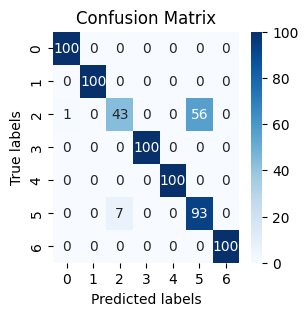

Accuracy: 90.86%


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Calculate and print other evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

In [ ]:
torch.save(model_class_T1.state_dict(), '/content/drive/MyDrive/DB/Malware/BigFolder/model_class_T1.pth')

In [ ]:
model_class_T1.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

In [ ]:
test_dataset = CustomDataset(root_dir="/content/drive/MyDrive/DB/Malware/", split='test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
model1 = torch.load("/content/drive/MyDrive/DB/Malware/model_class_T1.pth",map_location=torch.device('cpu'))
model2 = torch.load("/content/drive/MyDrive/DB/Malware/model_class_T2.pth", map_location=torch.device('cpu'))
model3 = torch.load("/content/drive/MyDrive/DB/Malware/model_class_T33.pth", map_location=torch.device('cpu'))
model4 = torch.load("/content/drive/MyDrive/DB/Malware/model_class_T33.pth", map_location=torch.device('cpu'))

In [ ]:
model_paths = [model1,model2,model3,model4]

In [ ]:
loaded_models = []
for model_path in model_paths:
    model = AlexNet(7)  # Replace with your model class
    model.load_state_dict(model_path)
    model.eval()  # Set the model to evaluation mode
    loaded_models.append(model)

In [ ]:
loaded_models[1].eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

In [ ]:
#NA
import numpy as np
from sklearn.metrics import accuracy_score

predictions_pt_1 = []
predictions_pt_2 = []
final_predictions = []
true_labels = []

# Iterate through the test loader
for images, labels in class_1_test_loader:
    images, labels = images.to(device), labels.to(device)
    true_labels.extend(labels.cpu().numpy())

    # PyTorch AlexNet 1
    predictions_0 = torch.argmax(model_class_T1(images), dim=1).cpu().numpy()

    # PyTorch AlexNet 2
    predictions_1 = torch.argmax(model_class_1(images), dim=1).cpu().numpy()

    # Select the prediction with the maximum confidence
    final_predictions.extend(np.maximum(predictions_0, predictions_1))

# Calculate and print the accuracy

print(final_predictions)
# Calculate and print the accuracy
accuracy = accuracy_score(true_labels, final_predictions)
print("Ensemble Model Accuracy: {:.2f}%".format(accuracy * 100))

NameError: name 'model_class_0' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import mode

predictions = []
true_labels = []

# Iterate through the test loader
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    true_labels.extend(labels.cpu().numpy())

    # Generate predictions for each model
    model_predictions = [torch.argmax(model(images), dim=1).cpu().numpy() for model in loaded_models]

    # Use mode for hard voting across all models
    final_predictions = mode(model_predictions, axis=0).mode.flatten()
    predictions.extend(final_predictions)

# Calculate and print the accuracy
accuracy = accuracy_score(true_labels, predictions)
print("Ensemble Model Accuracy: {:.2f}%".format(accuracy * 100))

Ensemble Model Accuracy: 3.57%


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(true_labels, predictions)

# Print the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(28), yticklabels=range(28))
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Calculate and print other evaluation metrics
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))